In [1]:
#Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm

**The dataset was released by Aspiring Minds from the Aspiring Mind Employment Outcome 2015 (AMEO). The study is primarily limited  only to students with engineering disciplines. The dataset contains the employment outcomes of engineering graduates as dependent variables (Salary, Job Titles, and Job Locations) along with the standardized scores from three different areas – cognitive skills, technical skills and personality skills. The dataset also contains demographic features. The dataset  contains  around  40 independent variables and 4000 data points. The independent variables are both continuous and categorical in nature. The dataset contains a unique identifier for each candidate. Below mentioned table contains the details for the original dataset.**

### Summary Table for dataset

1. ID- It is of type UID. It is a unique ID to identify the candidate.
2. Salary- It is continuous in nature. It tells annual CTC oﬀered to the candidate (in INR).
3. DOJ- Type: Date; Description; Date of joining the company
4. DOL- Type: Date; Description; Date of leaving the company
5. Designation- Type: Categorica; Description: Designation oﬀered in the job
6. JobCity-Type: Categorical; Description: Location of the job (city)
7. Gender-Type: Categorical; Description: Candidate’s gender
8. DOB-Type: Date; Description: Date of birth of candidate
9. 10percentage-Type: Continuous; Description: Overall marks obtained in grade 10 examinations
10. 10board-Type: Continuous; Description:	The school board whose curriculum the candidate followed in grade 10
11. 12graduation-Type: Date	; Description:Year of graduation - senior year high school
12. 12percentage-Type: Continuous; Description:	Overall marks obtained in grade 12 examinations
13. 12board-Type: Date	; Description:The school board whose curriculum the candidate followed in grade 12
14. CollegeID-Type:	NA/ID	Unique ID; Description: identifying the college which the candidate attended
15. CollegeTier-Type: Categorical; Description:	Tier of college
16. Degree-Type: Categorical	; Description:Degree obtained/pursued by the candidate
17. Specialization-Type: Categorical; Description:	Specialization pursued by the candidate
18. CollegeGPA-Type: Continuous	; Description:Aggregate GPA at graduation
19. CollegeCityID-Type: NA/ID	; Description:A unique ID to identify the city in which the college is located in
20. CollegeCityTier-Type: Categorical; Description:	The tier of the city in which the college is located
21. CollegeState-Type: Categorical; Description:	Name of States
22. GraduationYear-Type: Date	; Description:; Description:Year of graduation (Bachelor’s degree)
23. English-Type: Continuous	; Description:Scores in AMCAT English section
24. Logical-Type: Continuous	; Description:Scores in AMCAT Logical sectionQuant	Continuous	Scores in AMCAT Quantitative section
25. Domain-Type: Continuous/ Standardized; Description:	Scores in AMCAT’s domain module
26. ComputerProgramming-Type: Continuous	; Description:; Description:Score in AMCAT’s Computer programmingsection
27. ElectronicsAndSemicon-Type: Continuous	; Description:Score in AMCAT’s Electronics & Semiconductor Engineering section
28. ComputerScience	Continuous	 ; Description:Score in AMCAT’s Computer Science section
29. MechanicalEngg-Type: Continuous; Description:	Score in AMCAT’s Mechanical Engineeringsection
30. ElectricalEngg-Type: Continuous	; Description:Score in AMCAT’s Electrical Engineering section
31. TelecomEngg-Type: Continuous	; Description:Score in AMCAT’s Telecommunication Engineering section
32. CivilEngg-Type: Continuous	; Description:Score in AMCAT’s Civil Engineering section
33. conscientiousness-Type: Continuous/ Standardized	; Description:Scores in one of the sections of AMCAT’s personality test
34. agreeableness-Type:	Continuous/ Standardized	; Description:Scores in one of the sections of AMCAT’spersonality test
35. extraversion-Type: Continuous/ Standardized; Description:	Scores in one of the sections of AMCAT’s personality test
36. neuroticism-Type: Continuous/ Standardized	; Description:Scores in one of the sections of AMCAT’spersonality test
37. openess_to_experience-Type:	Continuous/ Standardized; Description:	Scores in one of the sections of AMCAT’s personality test
 



In [2]:
#Reading the data

data=pd.read_excel("Task-10.xlsx")

In [159]:
#this function is used to display all the columns present in the table

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [4]:
#displaying the first five rows of the data

data.head()

Unnamed: 0      ID   Salary        DOJ                  DOL  \
0      train  203097   420000 2012-06-01              present   
1      train  579905   500000 2013-09-01              present   
2      train  810601   325000 2014-06-01              present   
3      train  267447  1100000 2011-07-01              present   
4      train  343523   200000 2014-03-01  2015-03-01 00:00:00   

                Designation    JobCity Gender        DOB  10percentage  \
0   senior quality engineer  Bangalore      f 1990-02-19          84.3   
1         assistant manager     Indore      m 1989-10-04          85.4   
2          systems engineer    Chennai      f 1992-08-03          85.0   
3  senior software engineer    Gurgaon      m 1989-12-05          85.6   
4                       get    Manesar      m 1991-02-27          78.0   

                          10board  12graduation  12percentage  \
0  board ofsecondary education,ap          2007          95.8   
1                            cbse          2007          85.0   
2                            cbse          2010          68.2   
3                            cbse          2007          83.6   
4                            cbse          2008          76.8   

                              12board  CollegeID  CollegeTier       Degree  \
0  board of intermediate education,ap       1141            2  B.Tech/B.E.   
1                                cbse       5807            2  B.Tech/B.E.   
2                                cbse         64            2  B.Tech/B.E.   
3                                cbse       6920            1  B.Tech/B.E.   
4                                cbse      11368            2  B.Tech/B.E.   

                              Specialization  collegeGPA  CollegeCityID  \
0                       computer engineering       78.00           1141   
1  electronics and communication engineering       70.06           5807   
2                     information technology       70.00             64   
3                       computer engineering       74.64           6920   
4  electronics and communication engineering       73.90          11368   

   CollegeCityTier    CollegeState  GraduationYear  English  Logical  Quant  \
0                0  Andhra Pradesh            2011      515      585    525   
1                0  Madhya Pradesh            2012      695      610    780   
2                0   Uttar Pradesh            2014      615      545    370   
3                1           Delhi            2011      635      585    625   
4                0   Uttar Pradesh            2012      545      625    465   

     Domain  ComputerProgramming  ElectronicsAndSemicon  ComputerScience  \
0  0.635979                  445                     -1               -1   
1  0.960603                   -1                    466               -1   
2  0.450877                  395                     -1               -1   
3  0.974396                  615                     -1               -1   
4  0.124502                   -1                    233               -1   

   MechanicalEngg  ElectricalEngg  TelecomEngg  CivilEngg  conscientiousness  \
0              -1              -1           -1         -1             0.9737   
1              -1              -1           -1         -1            -0.7335   
2              -1              -1           -1         -1             0.2718   
3              -1              -1           -1         -1             0.0464   
4              -1              -1           -1         -1            -0.8810   

   agreeableness  extraversion  nueroticism  openess_to_experience  
0         0.8128        0.5269      1.35490                -0.4455  
1         0.3789        1.2396     -0.10760                 0.8637  
2         1.7109        0.1637     -0.86820                 0.6721  
3         0.3448       -0.3440     -0.40780                -0.9194  
4        -0.2793       -1.0697      0.09163                -0.1295

In [5]:
#dispaying the shape of the data

data.shape

(3998, 39)

In [6]:
#describing the data

data.describe()

ID        Salary  10percentage  12graduation  12percentage  \
count  3.998000e+03  3.998000e+03   3998.000000   3998.000000   3998.000000   
mean   6.637945e+05  3.076998e+05     77.925443   2008.087544     74.466366   
std    3.632182e+05  2.127375e+05      9.850162      1.653599     10.999933   
min    1.124400e+04  3.500000e+04     43.000000   1995.000000     40.000000   
25%    3.342842e+05  1.800000e+05     71.680000   2007.000000     66.000000   
50%    6.396000e+05  3.000000e+05     79.150000   2008.000000     74.400000   
75%    9.904800e+05  3.700000e+05     85.670000   2009.000000     82.600000   
max    1.298275e+06  4.000000e+06     97.760000   2013.000000     98.700000   

          CollegeID  CollegeTier   collegeGPA  CollegeCityID  CollegeCityTier  \
count   3998.000000  3998.000000  3998.000000    3998.000000      3998.000000   
mean    5156.851426     1.925713    71.486171    5156.851426         0.300400   
std     4802.261482     0.262270     8.167338    4802.261482         0.458489   
min        2.000000     1.000000     6.450000       2.000000         0.000000   
25%      494.000000     2.000000    66.407500     494.000000         0.000000   
50%     3879.000000     2.000000    71.720000    3879.000000         0.000000   
75%     8818.000000     2.000000    76.327500    8818.000000         1.000000   
max    18409.000000     2.000000    99.930000   18409.000000         1.000000   

       GraduationYear      English      Logical        Quant       Domain  \
count     3998.000000  3998.000000  3998.000000  3998.000000  3998.000000   
mean      2012.105803   501.649075   501.598799   513.378189     0.510490   
std         31.857271   104.940021    86.783297   122.302332     0.468671   
min          0.000000   180.000000   195.000000   120.000000    -1.000000   
25%       2012.000000   425.000000   445.000000   430.000000     0.342315   
50%       2013.000000   500.000000   505.000000   515.000000     0.622643   
75%       2014.000000   570.000000   565.000000   595.000000     0.842248   
max       2017.000000   875.000000   795.000000   900.000000     0.999910   

       ComputerProgramming  ElectronicsAndSemicon  ComputerScience  \
count          3998.000000            3998.000000      3998.000000   
mean            353.102801              95.328414        90.742371   
std             205.355519             158.241218       175.273083   
min              -1.000000              -1.000000        -1.000000   
25%             295.000000              -1.000000        -1.000000   
50%             415.000000              -1.000000        -1.000000   
75%             495.000000             233.000000        -1.000000   
max             840.000000             612.000000       715.000000   

       MechanicalEngg  ElectricalEngg  TelecomEngg    CivilEngg  \
count     3998.000000     3998.000000  3998.000000  3998.000000   
mean        22.974737       16.478739    31.851176     2.683842   
std         98.123311       87.585634   104.852845    36.658505   
min         -1.000000       -1.000000    -1.000000    -1.000000   
25%         -1.000000       -1.000000    -1.000000    -1.000000   
50%         -1.000000       -1.000000    -1.000000    -1.000000   
75%         -1.000000       -1.000000    -1.000000    -1.000000   
max        623.000000      676.000000   548.000000   516.000000   

       conscientiousness  agreeableness  extraversion  nueroticism  \
count        3998.000000    3998.000000   3998.000000  3998.000000   
mean           -0.037831       0.146496      0.002763    -0.169033   
std             1.028666       0.941782      0.951471     1.007580   
min            -4.126700      -5.781600     -4.600900    -2.643000   
25%            -0.713525      -0.287100     -0.604800    -0.868200   
50%             0.046400       0.212400      0.091400    -0.234400   
75%             0.702700       0.812800      0.672000     0.526200   
max             1.995300       1.904800      2.535400     3.352500   

       openess_

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     3998 non-null   int64         
 1   Salary                 3998 non-null   int64         
 2   DOJ                    3998 non-null   datetime64[ns]
 3   DOL                    3998 non-null   object        
 4   Designation            3998 non-null   object        
 5   JobCity                3998 non-null   object        
 6   Gender                 3998 non-null   object        
 7   DOB                    3998 non-null   datetime64[ns]
 8   10percentage           3998 non-null   float64       
 9   10board                3998 non-null   object        
 10  12graduation           3998 non-null   int64         
 11  12percentage           3998 non-null   float64       
 12  12board                3998 non-null   object        
 13  Col

In [7]:
#Dropping the Unnamed: 0 column as it of no use to us

data.drop('Unnamed: 0',axis=1,inplace=True)

# Analysing Salary Column

In [73]:
#This command is used to convert value into standard from scientific from e.g.4.000000e+06 to 4000000.00

pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Univariate Analysis

In [72]:
#Describing the salary column

data['Salary'].describe()

count      3998.000
mean     307699.850
std      212737.500
min       35000.000
25%      180000.000
50%      300000.000
75%      370000.000
max     4000000.000
Name: Salary, dtype: float64

<Figure size 1080x1080 with 0 Axes>

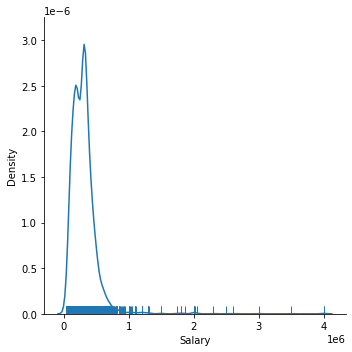

In [51]:
#Plotting distplot

plt.figure(figsize=(15,15))
sns.displot(data['Salary'],kind='kde',rug=True)

**Here we can see that the data is not normally distributes, it looks like pareto distribution.**

In [14]:
print("The Skewness of salary is:",data['Salary'].skew())
print("The kurtosis of salary is:",data['Salary'].kurt())

The Skewness of salary is: 6.451081166224832
The kurtosis of salary is: 80.92999627162538


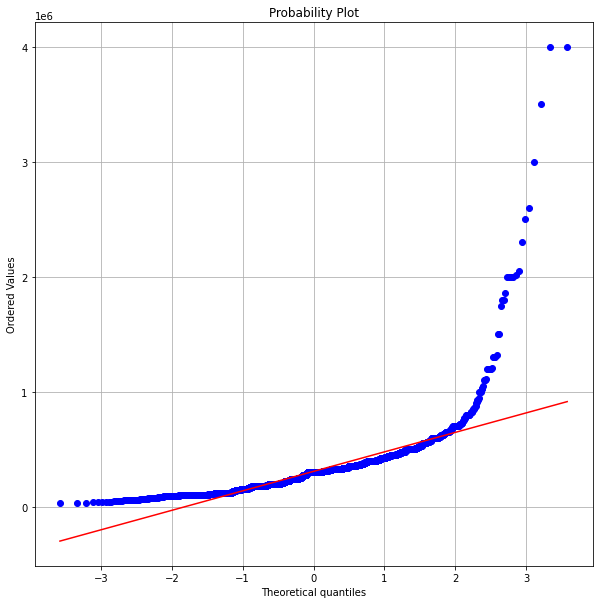

In [9]:
#Plotting the Q-Q plot to check normality

plt.figure(figsize=(10,10))
stats.probplot(data['Salary'], dist="norm",plot=plt)
plt.grid()

**The data is not normally distributed**

In [225]:
#Applying box-cox transformation

x,l=stats.boxcox(data['Salary'])
print(l)

0.04330214214353366


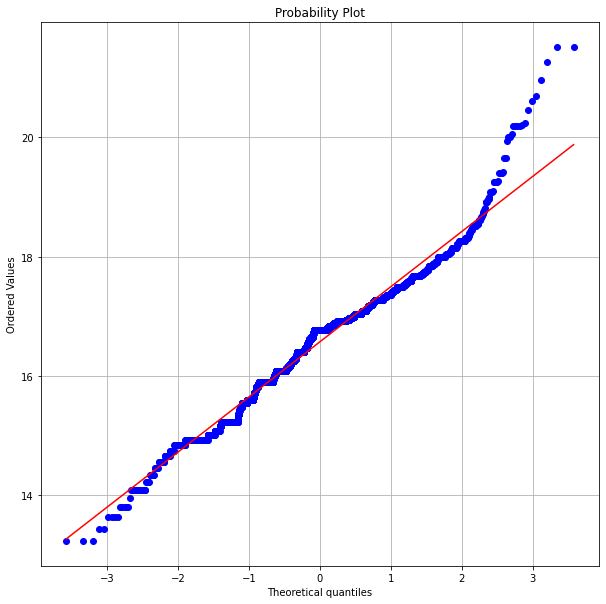

In [226]:
#Plotting transformed data

plt.figure(figsize=(10,10))
stats.probplot(x,dist='norm',plot=plt)
plt.grid()

**Here, we can see that there is drastic change in data, it has not fully transformed to normal distribution but changed a lot.**

<AxesSubplot:xlabel='Salary'>

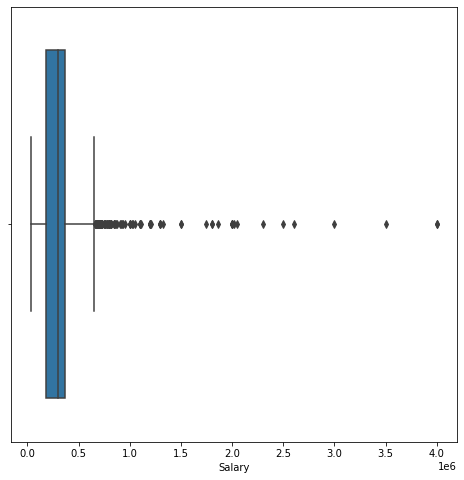

In [50]:
#Using box-plot check outliers in the data

plt.figure(figsize=(8,8))
sns.boxplot(x=data['Salary'])

**Using box-plot we can see that salaries above CTC 655000 INR are outliers**

<AxesSubplot:xlabel='Salary', ylabel='Count'>

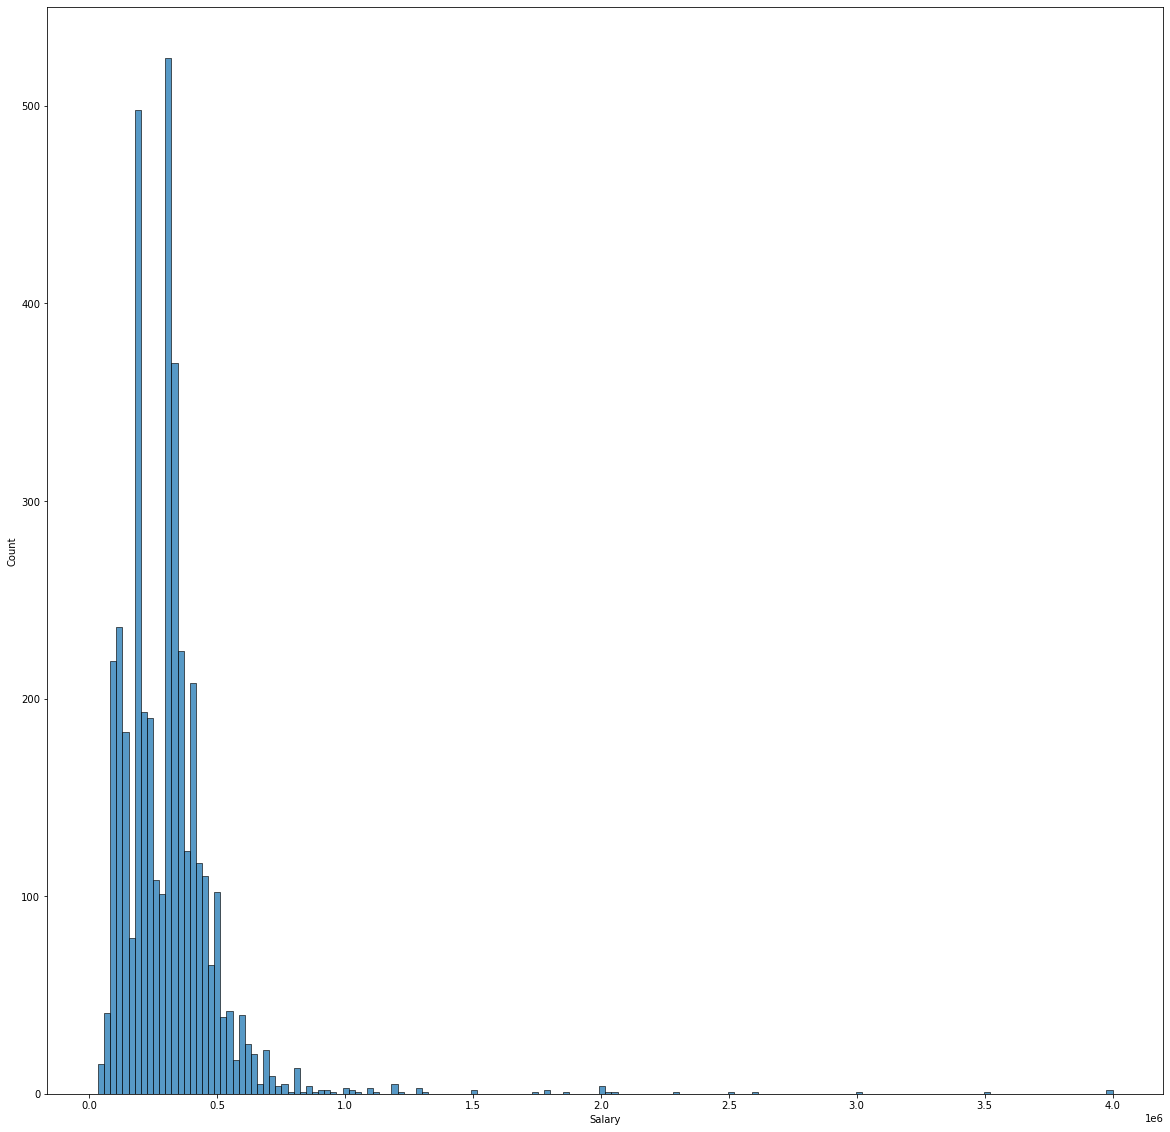

In [62]:
#Using countplot

plt.figure(figsize=(20,20))
sns.histplot(x=data['Salary'])

In [66]:
#Printing the mode of the salary

print("Maximun people are earning the salary:",data['Salary'].mode())

Maximun people are earning the salary: 0    300000
dtype: int64


In [33]:
#Calculating IQR

IQR=370000-180000
print("Inter Quartile Range: ",IQR)
print("Maximum:",370000+(1.5*IQR))

Inter Quartile Range:  190000
Maximum: 655000.0


In [52]:
#Number of person earning maximum and minimum salary

print("No. of person earning maximum salary: ",(data['Salary']==data['Salary'].max()).value_counts())
print("No. of person earning minimum salary:",(data['Salary']==data['Salary'].min()).value_counts())

No. of person earning maximum salary:  False    3996
True        2
Name: Salary, dtype: int64
No. of person earning minimum salary: False    3995
True        3
Name: Salary, dtype: int64


# Bivariate Analysis

# Research Question

## Conclusion about Salary column:

1. Here we can see that the data is not normally distributes, it is somewhat pareto distribution.
2. From the histogram, it is clear that most of people are earning less than 1000000 CTC, with mean CTC 307699.8 INR.
3. Maximum CTC offered till date : 4000000
4. Minimum CTC offered till date: 35000
5. Number of person got maximum CTC is 2
6. Number of person got minimum CTC is 3
7. The Skewness of salary is: 6.451081166224832
8. The kurtosis of salary is: 80.92999627162538
9. Using box-plot we can see that salaries above **CTC 655000 INR** are outliers
10. Maximun people are earning the salary:CTC 300000 INR

# Analysing Designation Column

In [83]:
#Describing Designation Column

data['Designation'].describe()

count                  3998
unique                  419
top       software engineer
freq                    539
Name: Designation, dtype: object

# Univariate Analysis

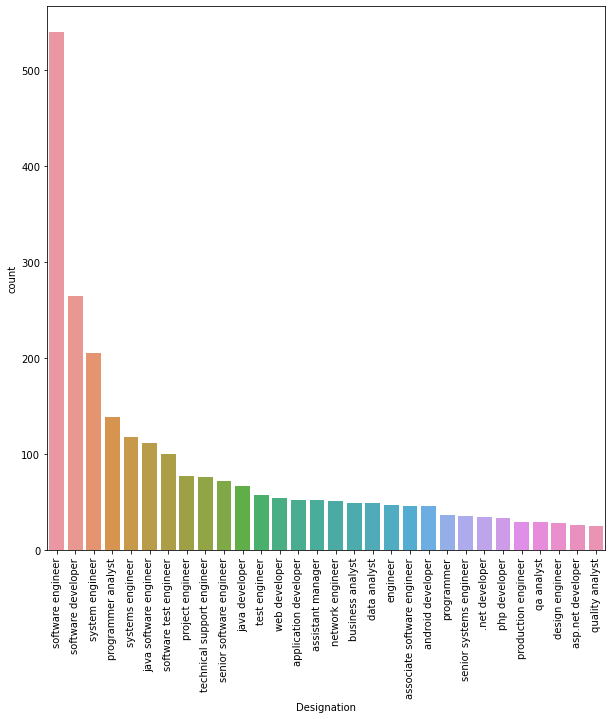

In [97]:
#Using countplot to see maximum and minimum number of people in a designation

plt.figure(figsize=(10,10))
sns.countplot(x=data["Designation"], order=data["Designation"].value_counts().iloc[:30].index)
plt.xticks(rotation=90)
plt.show()

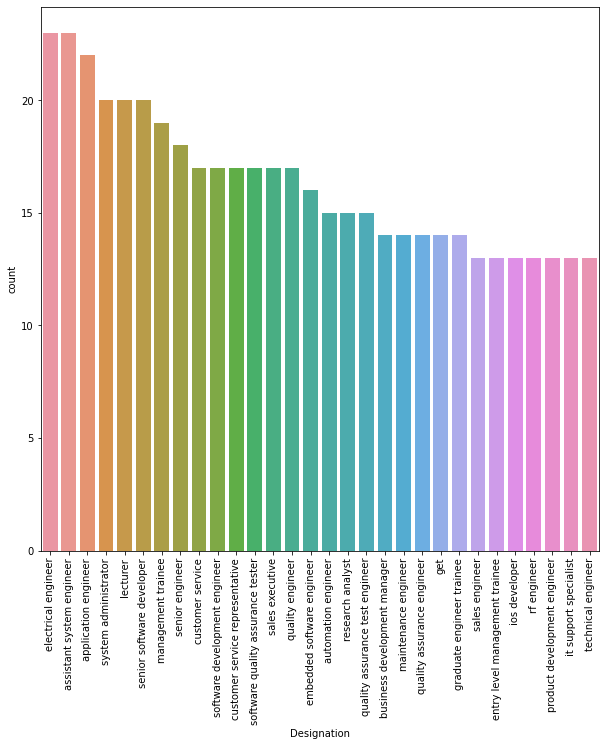

In [106]:
plt.figure(figsize=(10,10))
sns.countplot(x=data["Designation"], order=data["Designation"].value_counts().iloc[30:60].index)
plt.xticks(rotation=90)
plt.show()

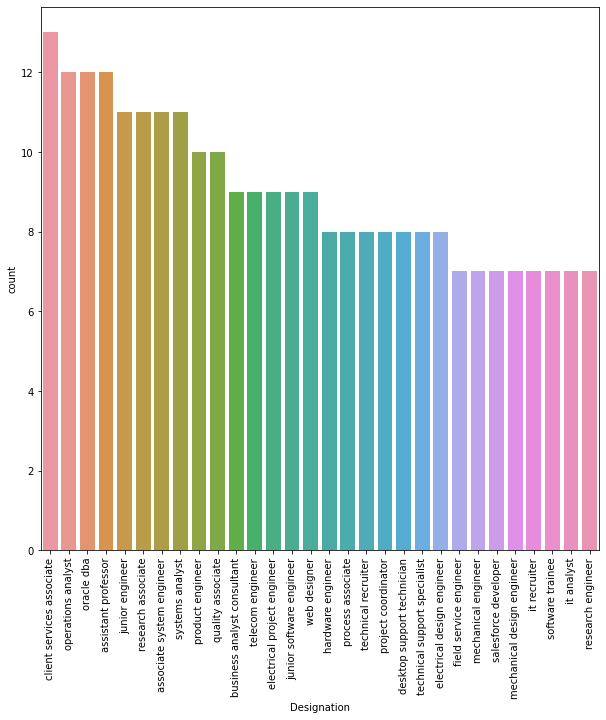

In [107]:
plt.figure(figsize=(10,10))
sns.countplot(x=data["Designation"], order=data["Designation"].value_counts().iloc[60:90].index)
plt.xticks(rotation=90)
plt.show()

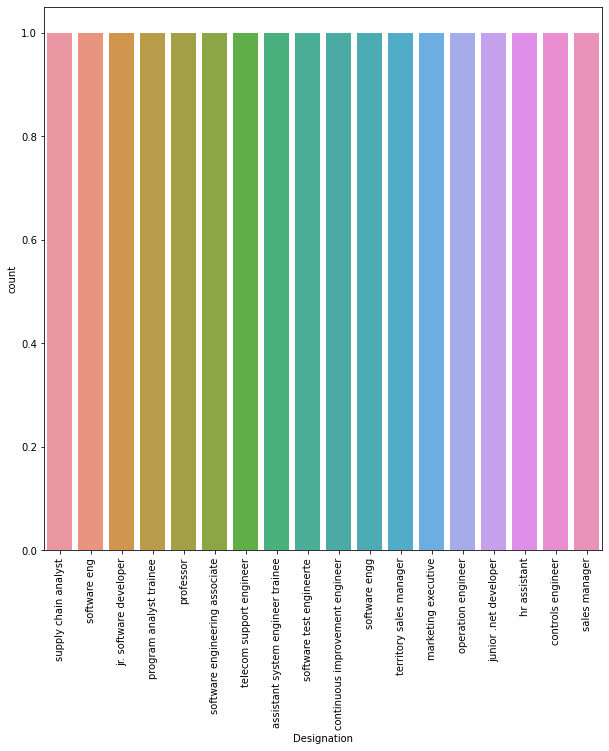

In [108]:
plt.figure(figsize=(10,10))
sns.countplot(x=data["Designation"], order=data["Designation"].value_counts().iloc[400:-1].index)
plt.xticks(rotation=90)
plt.show()

**From the graph it is clear that most of the people are working in the role of software engineer.**

# Bivariate Analysis of Salary

<AxesSubplot:xlabel='Salary', ylabel='Designation'>

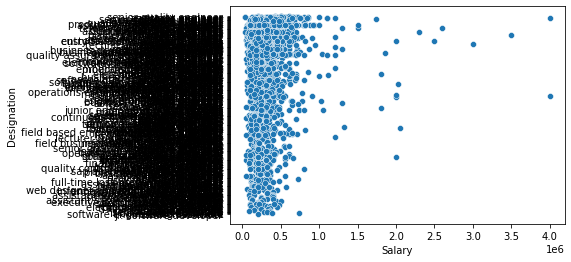

In [109]:
#Plotting scatter to see Designation relation with Salary

sns.scatterplot(x=data['Salary'],y=data['Designation'])

**No correlation between Designation and Salary**

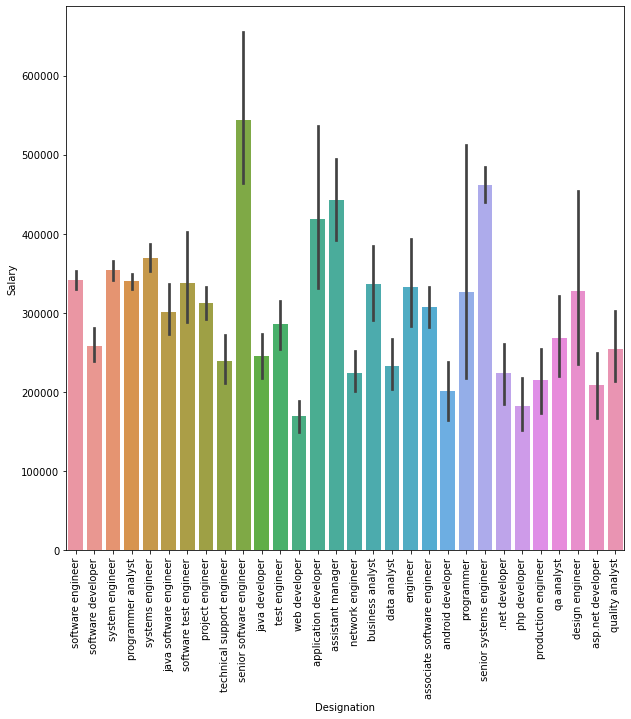

In [118]:
#PLotting a barplot between Designation and Salary

plt.figure(figsize=(10,10))
sns.barplot(x=data['Designation'],y=data['Salary'],order=data["Designation"].value_counts().iloc[:30].index)
plt.xticks(rotation=90)
plt.show()

**Maximun salary is earned by Senior Software Engineer**

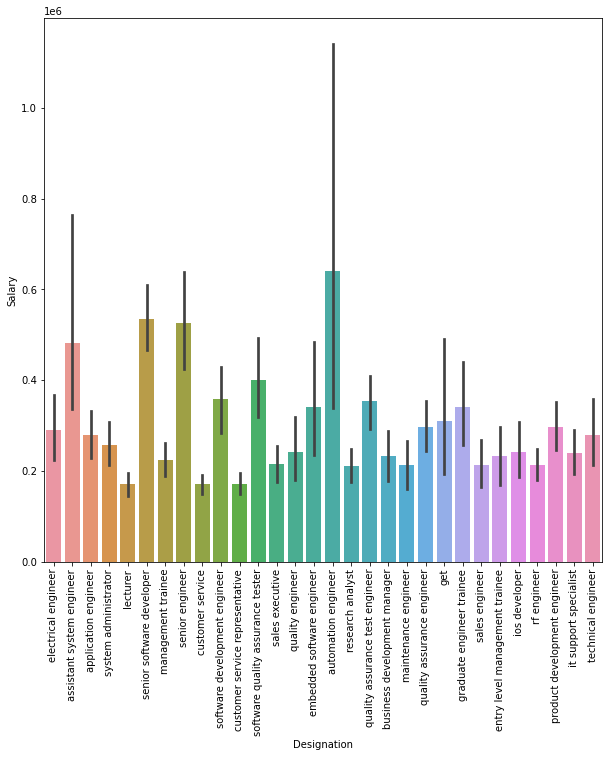

In [121]:
plt.figure(figsize=(10,10))
sns.barplot(x=data['Designation'],y=data['Salary'],order=data["Designation"].value_counts().iloc[30:60].index)
plt.xticks(rotation=90)
plt.show()

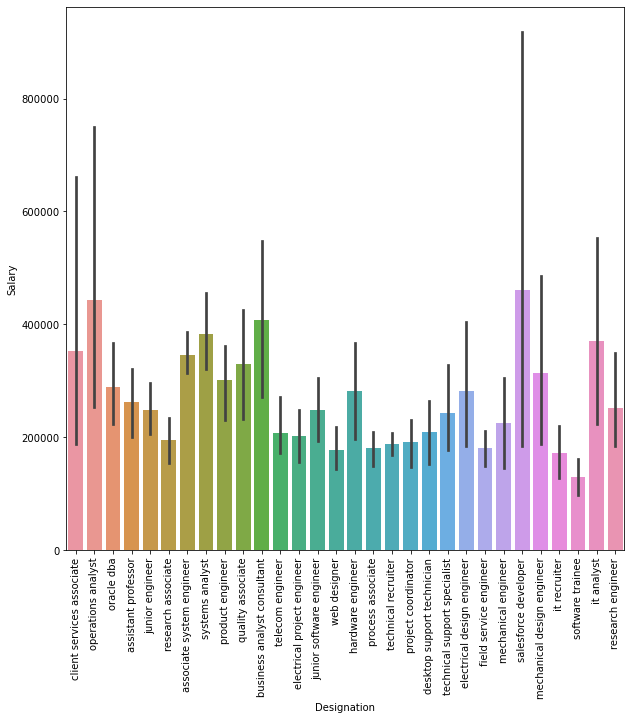

In [120]:
plt.figure(figsize=(10,10))
sns.barplot(x=data['Designation'],y=data['Salary'],order=data["Designation"].value_counts().iloc[60:90].index)
plt.xticks(rotation=90)
plt.show()

# Analysing Job City

In [125]:
data['JobCity'].describe()

count          3998
unique          339
top       Bangalore
freq            627
Name: JobCity, dtype: object

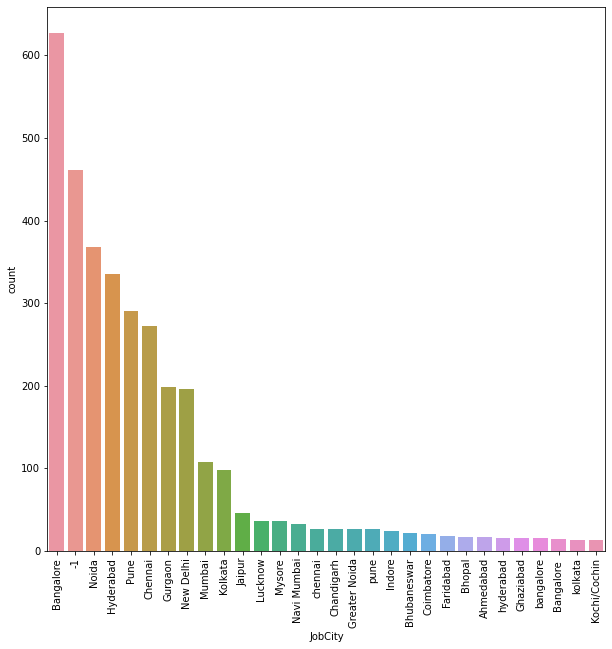

In [126]:
#Using countplot to analyse job city

plt.figure(figsize=(10,10))
sns.countplot(x=data["JobCity"], order=data["JobCity"].value_counts().iloc[:30].index)
plt.xticks(rotation=90)
plt.show()

**We can see that most of the people are working in Banglore i.e.627. Here we can also see a missing value represented with -1 .They have count of 470**

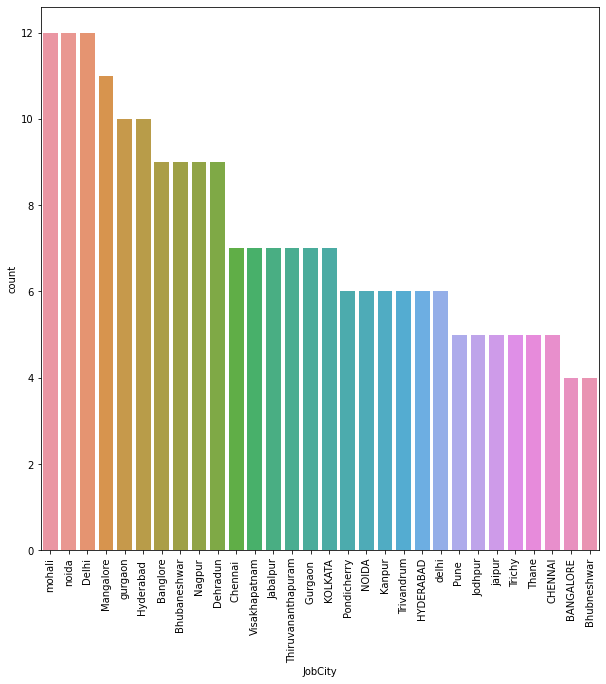

In [127]:
plt.figure(figsize=(10,10))
sns.countplot(x=data["JobCity"], order=data["JobCity"].value_counts().iloc[30:60].index)
plt.xticks(rotation=90)
plt.show()

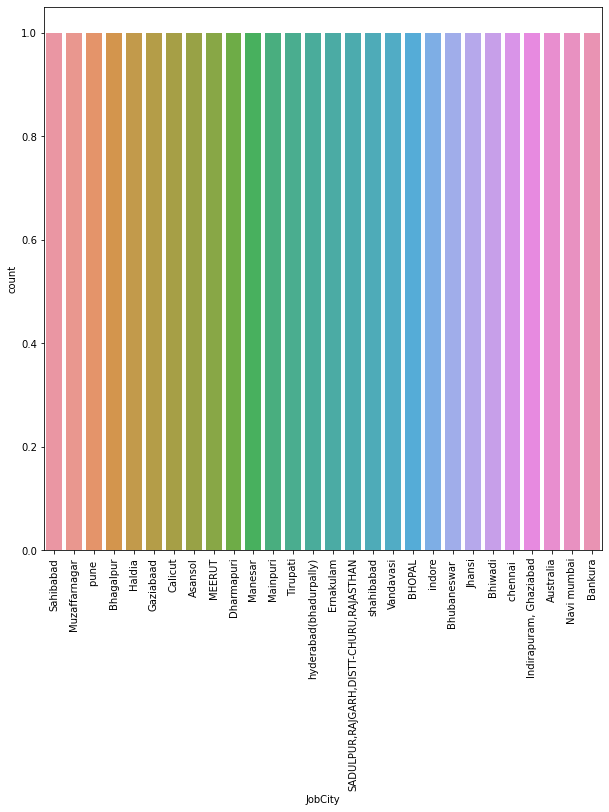

In [129]:
plt.figure(figsize=(10,10))
sns.countplot(x=data["JobCity"], order=data["JobCity"].value_counts().iloc[310:-1].index)
plt.xticks(rotation=90)
plt.show()

# Bivariate Analysis

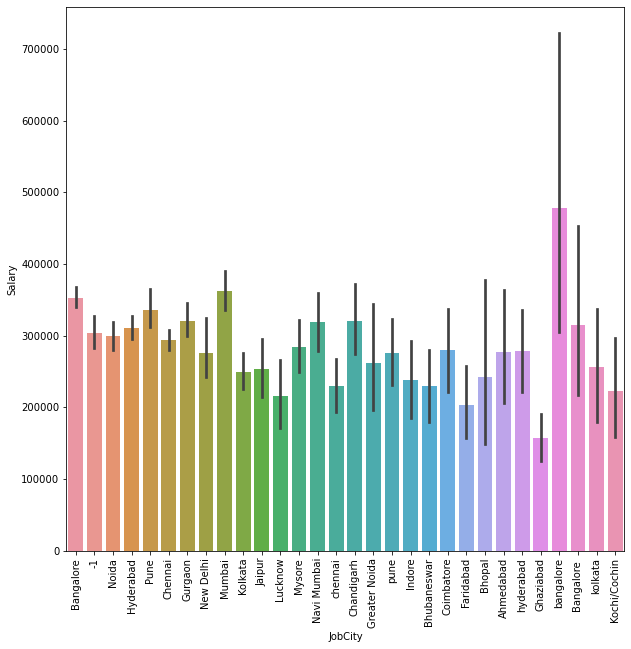

In [131]:
#Using bar plot to see relation between job city and designation

plt.figure(figsize=(10,10))
sns.barplot(x=data['JobCity'],y=data['Salary'],order=data["JobCity"].value_counts().iloc[:30].index)
plt.xticks(rotation=90)
plt.show()

**People are getting highest salary in banglore.**

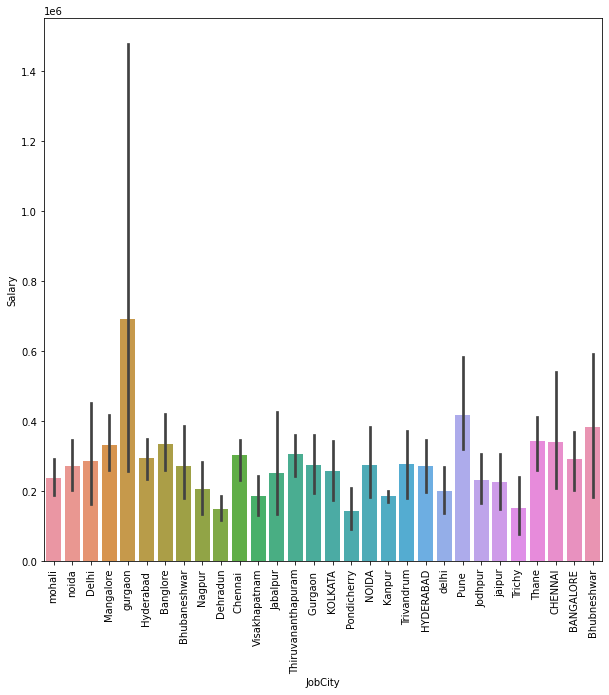

In [133]:
plt.figure(figsize=(10,10))
sns.barplot(x=data['JobCity'],y=data['Salary'],order=data["JobCity"].value_counts().iloc[30:60].index)
plt.xticks(rotation=90)
plt.show()

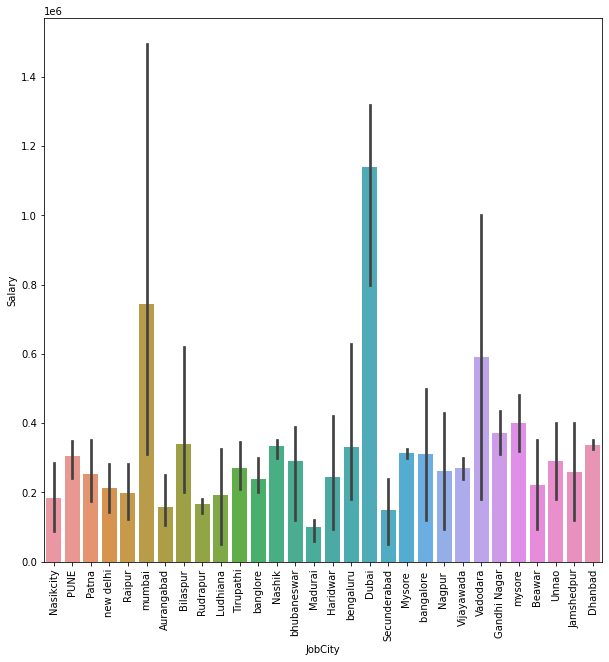

In [134]:
plt.figure(figsize=(10,10))
sns.barplot(x=data['JobCity'],y=data['Salary'],order=data["JobCity"].value_counts().iloc[60:90].index)
plt.xticks(rotation=90)
plt.show()

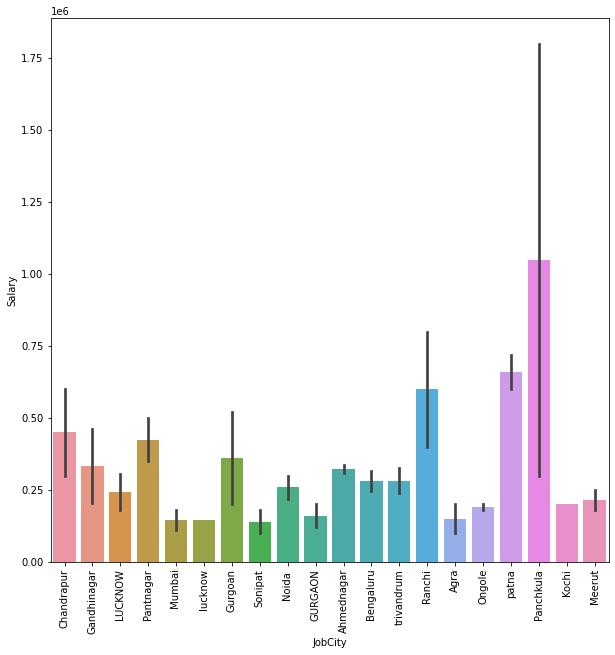

In [135]:
plt.figure(figsize=(10,10))
sns.barplot(x=data['JobCity'],y=data['Salary'],order=data["JobCity"].value_counts().iloc[90:110].index)
plt.xticks(rotation=90)
plt.show()

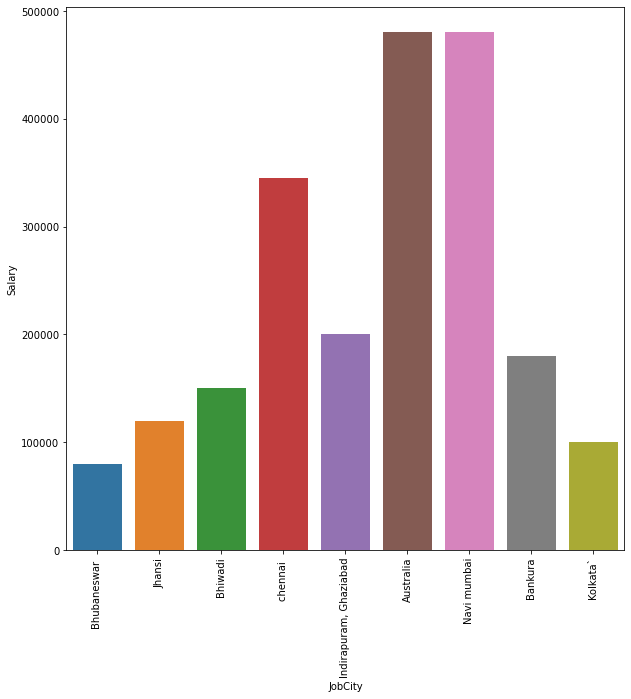

In [137]:
#Analysing job city with salary using boxplot

plt.figure(figsize=(10,10))
sns.barplot(x=data['JobCity'],y=data['Salary'],order=data["JobCity"].value_counts().iloc[330:].index)
plt.xticks(rotation=90)
plt.show()

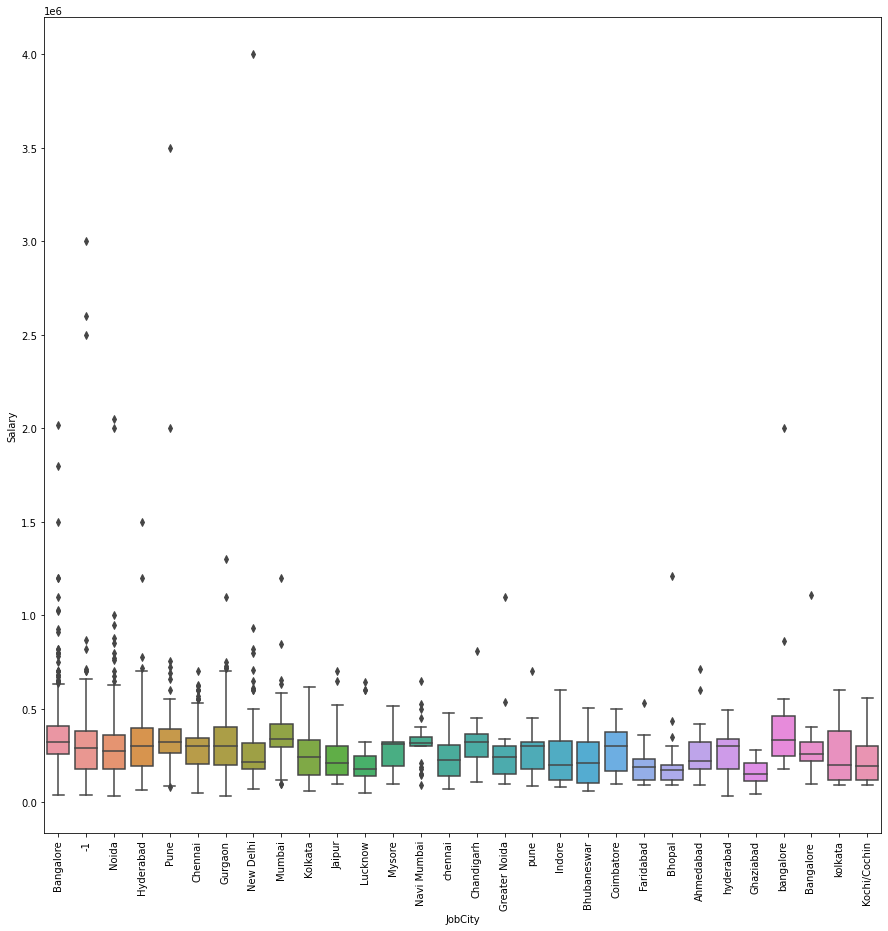

In [146]:

plt.figure(figsize=(15,15))
sns.boxplot(x=data['JobCity'],y=data['Salary'],order=data['JobCity'].value_counts().iloc[:30].index)
plt.xticks(rotation=90)
plt.show()

**From the boxplot we got to know that CTC 4000000 is given in New Delhi city, which is outlier in the data.**

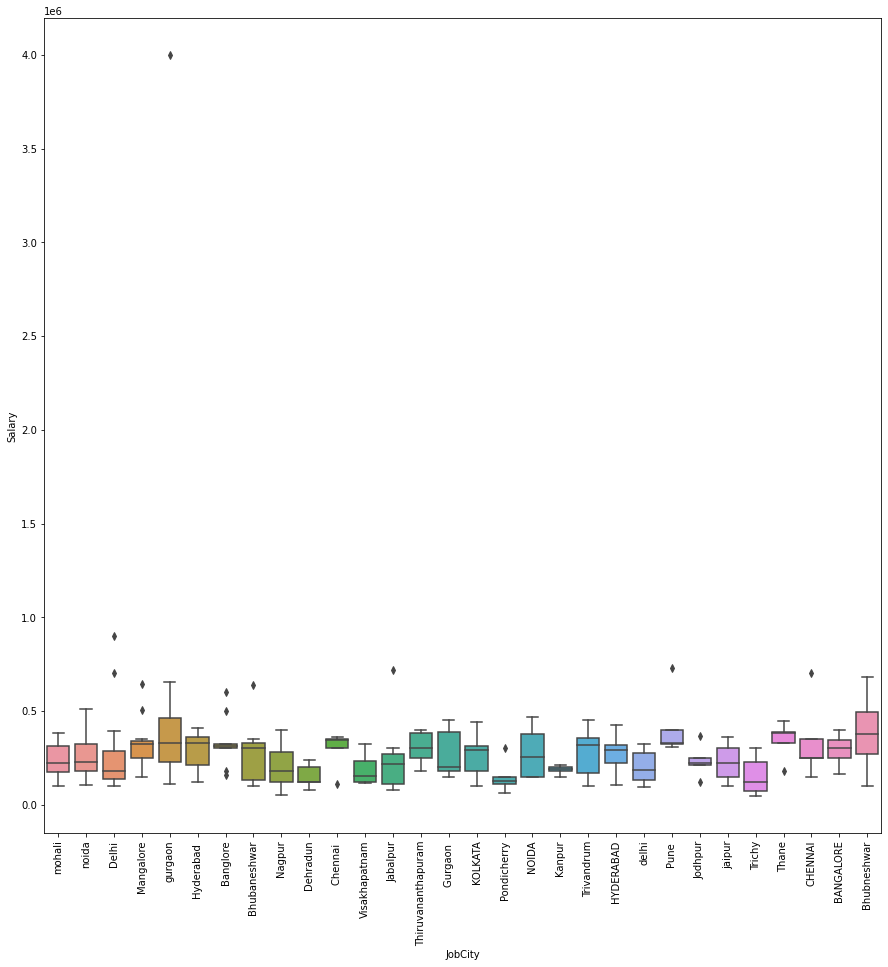

In [144]:

plt.figure(figsize=(15,15))
sns.boxplot(x=data['JobCity'],y=data['Salary'],order=data['JobCity'].value_counts().iloc[30:60].index)
plt.xticks(rotation=90)
plt.show()

**From the boxplot we got to know that CTC 4000000 is given in Gurgaon city, which is a outlier in the data.**

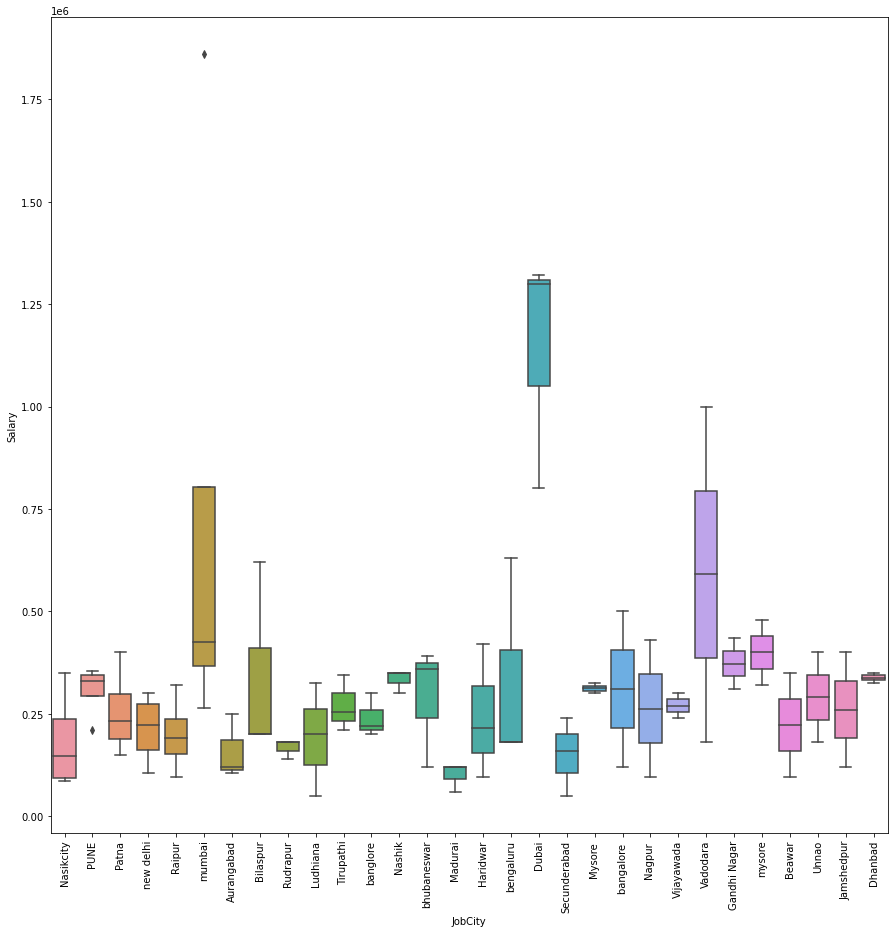

In [148]:

plt.figure(figsize=(15,15))
sns.boxplot(x=data['JobCity'],y=data['Salary'],order=data['JobCity'].value_counts().iloc[60:90].index)
plt.xticks(rotation=90)
plt.show()

**Highest median salary is obtained in Dubai**

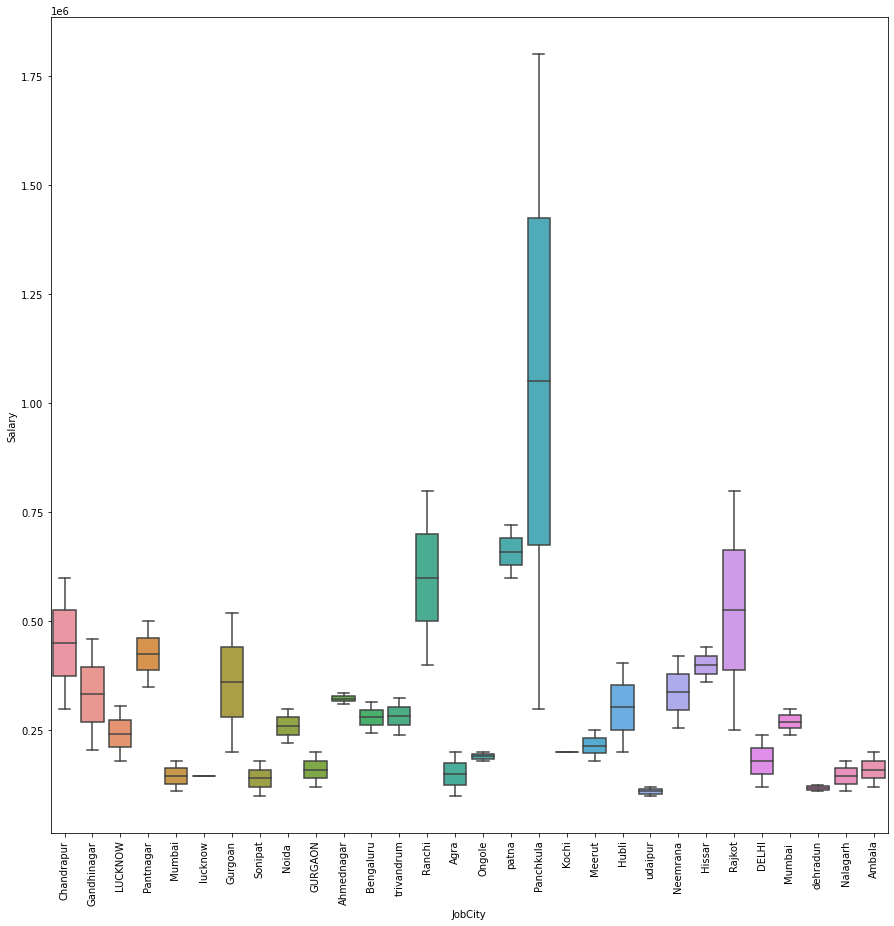

In [150]:
plt.figure(figsize=(15,15))
sns.boxplot(x=data['JobCity'],y=data['Salary'],order=data['JobCity'].value_counts().iloc[90:120].index)
plt.xticks(rotation=90)
plt.show()

**Maximum Salary is given in Panchkula**

<AxesSubplot:xlabel='Gender', ylabel='Salary'>

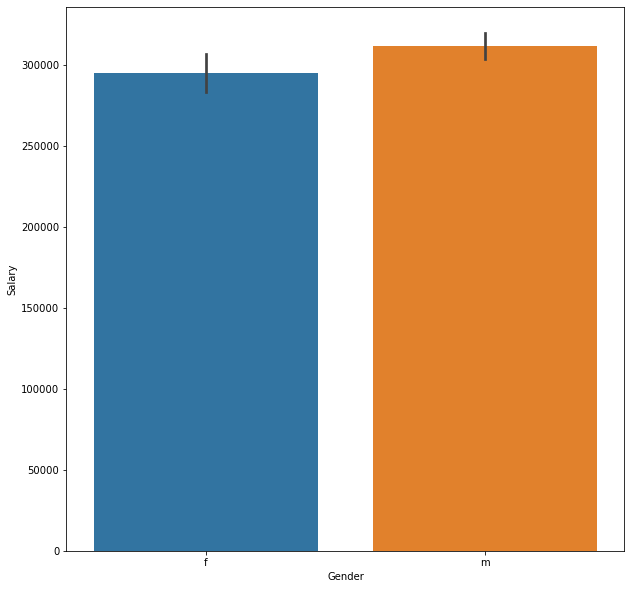

In [186]:
plt.figure(figsize=(10,10))
sns.barplot(x=data['Gender'],y=data['Salary'])

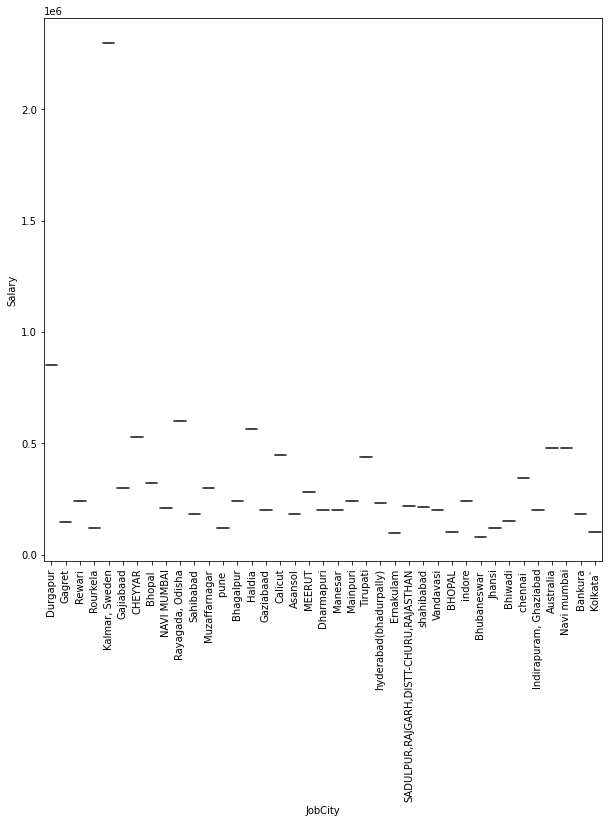

In [154]:
plt.figure(figsize=(10,10))
sns.boxplot(x=data['JobCity'],y=data['Salary'],order=data['JobCity'].value_counts().iloc[300:].index)
plt.xticks(rotation=90)
plt.show()

# Conclusion after analysing the JobCity column

1. We can see that most of the people are working in Banglore i.e.627. 
2. Here we can also see a missing value represented with -1 .They have count of 461.
3. From the boxplot we got to know that CTC 4000000 is given in New Delhi and Gurgaon city, which is outlier in the data.
4. Highest median salary is obtained in Dubai
5. Maximum Salary is in Panchkula

# Analysing Gender

In [156]:
#Describing the Gender Column

data['Gender'].describe()

count     3998
unique       2
top          m
freq      3041
Name: Gender, dtype: object

In [162]:
print("Percentage of male working: ",(3041/3998)*100,'%')
print("Percentage of male working: ",((3998-3041)/3998)*100,'%')

Percentage of male working:  76.06303151575788 %
Percentage of male working:  23.936968484242122 %


<AxesSubplot:xlabel='Gender', ylabel='count'>

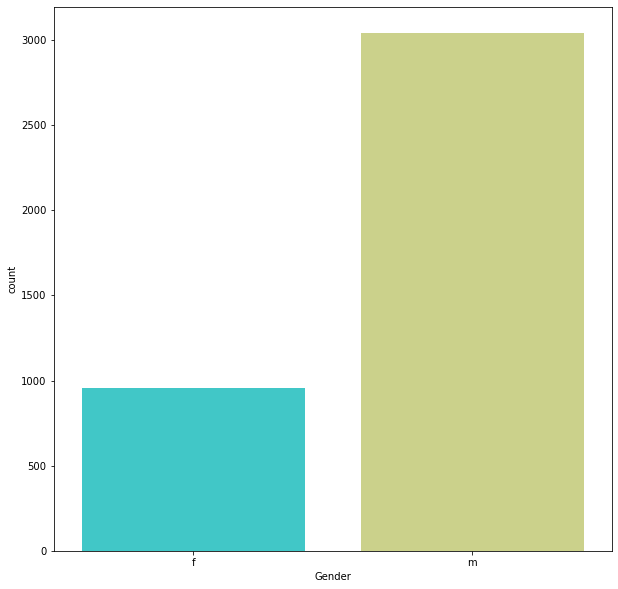

In [158]:
#ploting countplot to count no. of males and females

plt.figure(figsize=(10,10))
sns.countplot(x=data['Gender'],palette='rainbow')

**No of male are far more than female.**

# Bivariate Analysis

<AxesSubplot:xlabel='Gender', ylabel='Salary'>

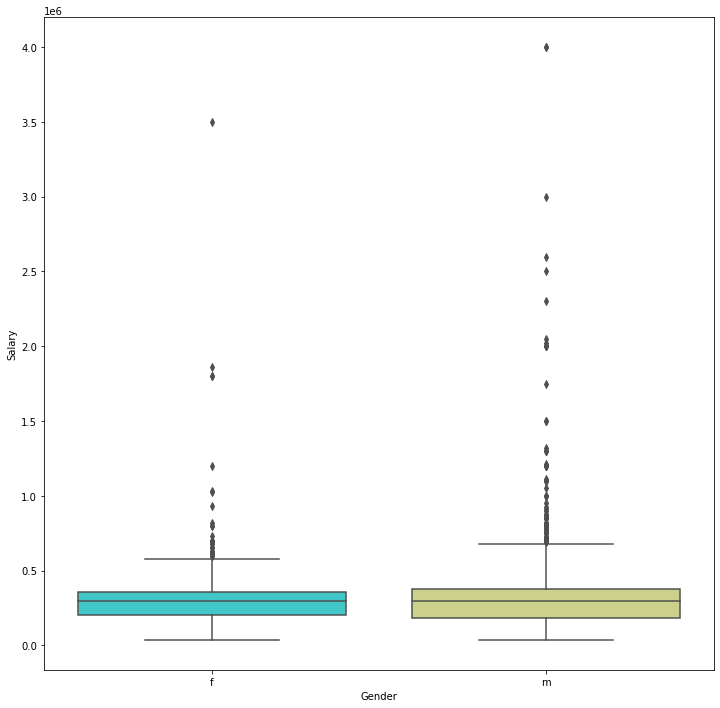

In [191]:
#Plotting the bxoplot

plt.figure(figsize=(12,12))
sns.boxplot(x=data['Gender'],y=data['Salary'],palette='rainbow')

**Median salary earned by both male and female are nearly same but the maximum and minimum in salary is earned by men**

<AxesSubplot:xlabel='Gender', ylabel='Salary'>

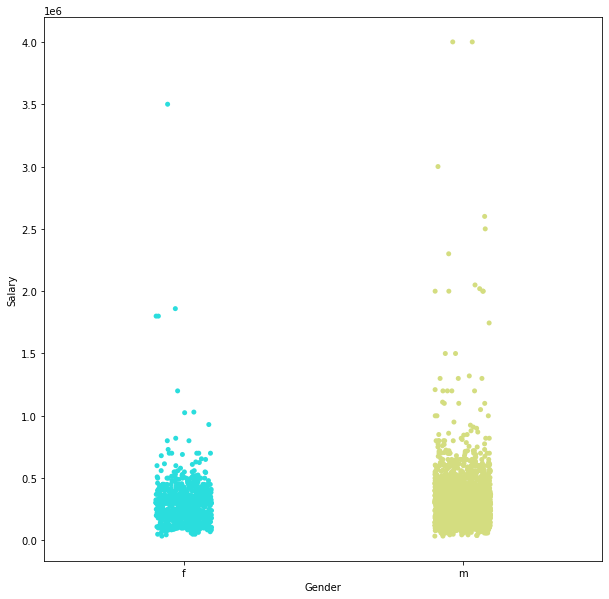

In [200]:
#Plotting the scatterplot to observe correlation

plt.figure(figsize=(10,10))
sns.stripplot(x=data['Gender'],y=data['Salary'],palette='rainbow',jitter=True)

**Salaries of men vary more than female.**

# Conclusion after Analysing the gender column

1. Percentage of male working:  76.06303151575788 %.
2. Percentage of male working:  23.936968484242122 %.
3. Median salary earned by both male and female are nearly same but the maximum and minimum in salary is earned by men.
4. Salaries of men vary more than female.

 # Analysing 10peercentage

In [205]:
#describing 10percentage

data['10percentage'].describe()

count   3998.000
mean      77.925
std        9.850
min       43.000
25%       71.680
50%       79.150
75%       85.670
max       97.760
Name: 10percentage, dtype: float64

<Figure size 720x720 with 0 Axes>

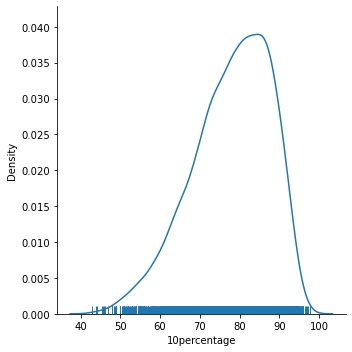

In [210]:

plt.figure(figsize=(10,10))
sns.displot(data['10percentage'],kind='kde',rug=True,palette='rainbow')

**The plot looks like left skewed normal distribution plot**

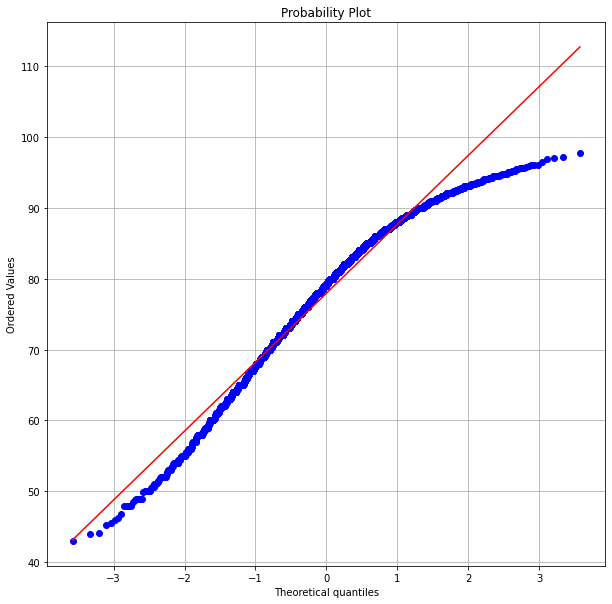

In [208]:
#Checking the normality of the data

plt.figure(figsize=(10,10))
stats.probplot(data['10percentage'], dist="norm",plot=plt)
plt.grid()

In [220]:
print("The skewness is: ",data['10percentage'].skew())
print("The kurtosis is: ",data['10percentage'].kurt())

The skewness is:  -0.5910185081648047
The kurtosis is:  -0.1102843100198605


In [23]:
# Applying box-cox transformation

x1,l1=stats.boxcox(data['10percentage'])
print(l1)

2.7917342830266154


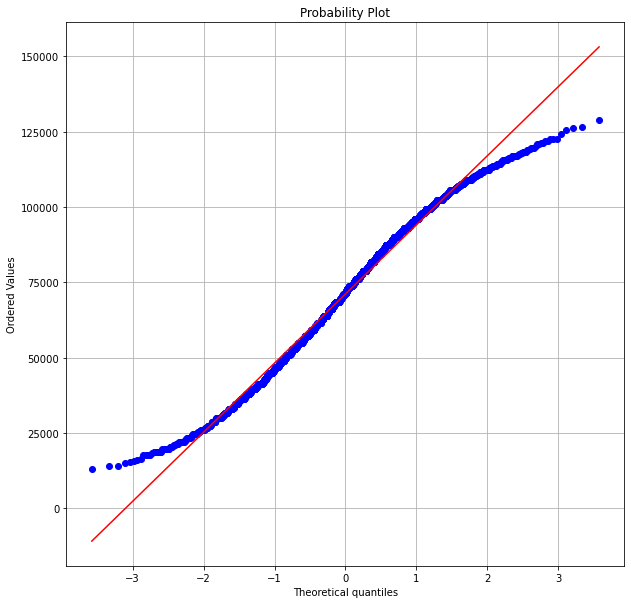

In [222]:
plt.figure(figsize=(10,10))
stats.probplot(x1, dist="norm",plot=plt)
plt.grid()

**The graph has not been properly transformed to normal distribution, but it's better than the previous one.**

<Figure size 720x720 with 0 Axes>

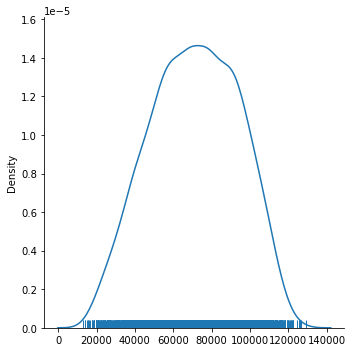

In [24]:
plt.figure(figsize=(10,10))
sns.displot(x1,kind='kde',rug=True,palette='rainbow')

**Now the data somewhat loos like normal distribution**

<AxesSubplot:ylabel='10percentage'>

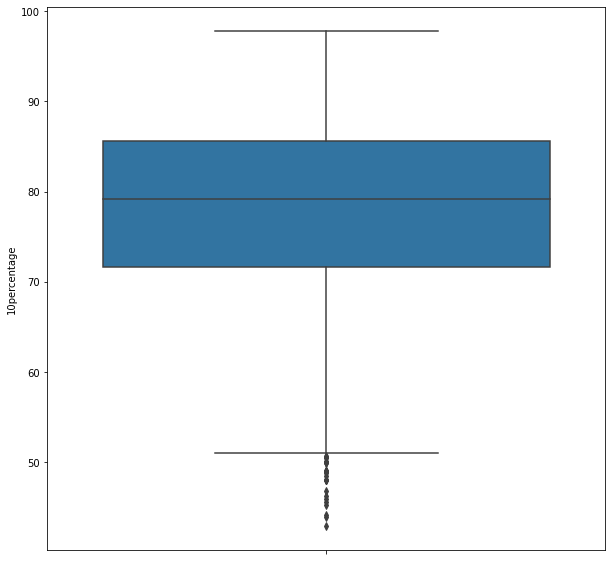

In [230]:
#Plotting box-plot

plt.figure(figsize=(10,10))
sns.boxplot(y=data['10percentage'])

**Data below 50.695000000000014 are all outliers.**

In [232]:
#Finding IQR and minimun
iqr1=85.670-71.680
print("Minimum: ",71.680-(1.5*iqr1))

Minimum:  50.695000000000014


# Bivariate Analysis

<AxesSubplot:xlabel='10percentage', ylabel='Salary'>

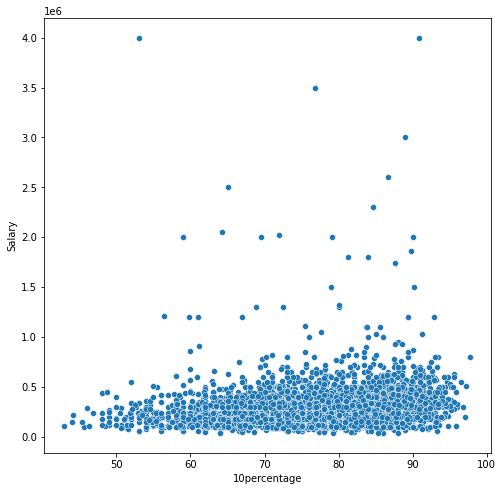

In [237]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=data['10percentage'],y=data['Salary'])

In [253]:
print("Co-relation between 10percentage and Salary is:",data['10percentage'].corr(data['Salary']))

Co-relation between 10percentage and Salary is: 0.17737277344849336


**Co-relation between 10percentage and salary is not strong**

<AxesSubplot:xlabel='Gender', ylabel='10percentage'>

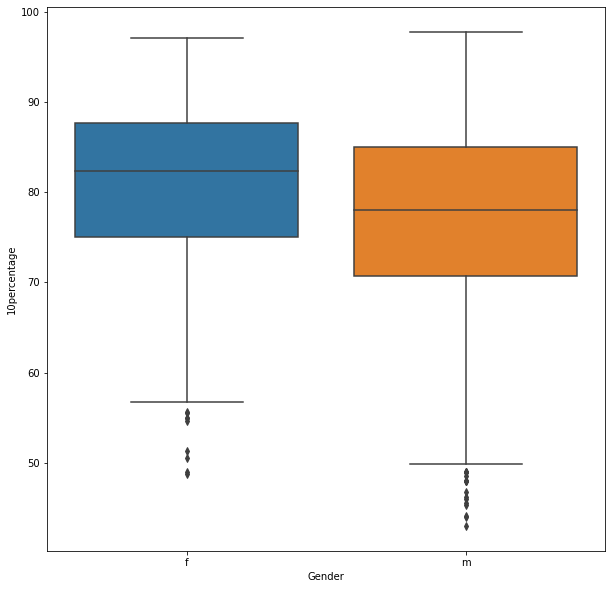

In [21]:
plt.figure(figsize=(10,10))
sns.boxplot(x=data['Gender'],y=data['10percentage'])

**Median score of girls is better than male**

# Conclusion after analysing 10percentage

1. The data points are left skewed normal distribution plot
2. Minimum percentage is 50.695000000000014 and below it all are outliers.
3. Co-relation between 10percentage and Salary is: 0.17737277344849336.
4. The skewness is:  -0.5910185081648047
5. The kurtosis is:  -0.1102843100198605
6. Median score of girls is better than male

# Analysing 10board

In [254]:
data['10board'].describe()

count     3998
unique     275
top       cbse
freq      1395
Name: 10board, dtype: object

In [3]:
data['10board'].head()

0    board ofsecondary education,ap
1                              cbse
2                              cbse
3                              cbse
4                              cbse
Name: 10board, dtype: object

In [7]:
data['10board'].value_counts()

cbse                                                1395
state board                                         1164
0                                                    350
icse                                                 281
ssc                                                  122
                                                    ... 
ksseb(karnataka state board)                           1
j & k bord                                             1
kalaimagal matriculation higher secondary school       1
punjab school education board, mohali                  1
state boardmp board                                    1
Name: 10board, Length: 275, dtype: int64

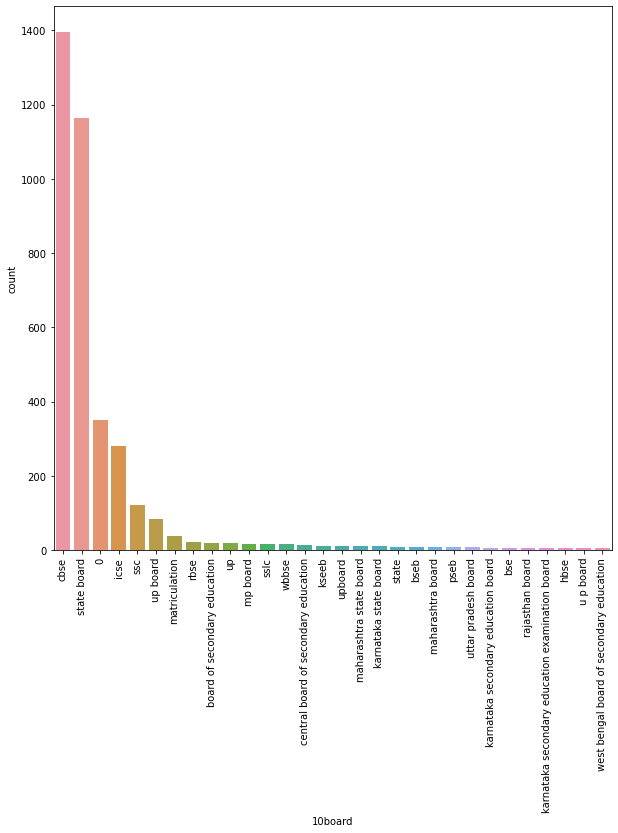

In [6]:
plt.figure(figsize=(10,10))
sns.countplot(x=data['10board'],order=data['10board'].value_counts().iloc[:30].index)
plt.xticks(rotation=90)
plt.show()

**Maximun number of students are studying in cbse with frequency of 1395. There are also null values represented by 0 with frequency of 350**

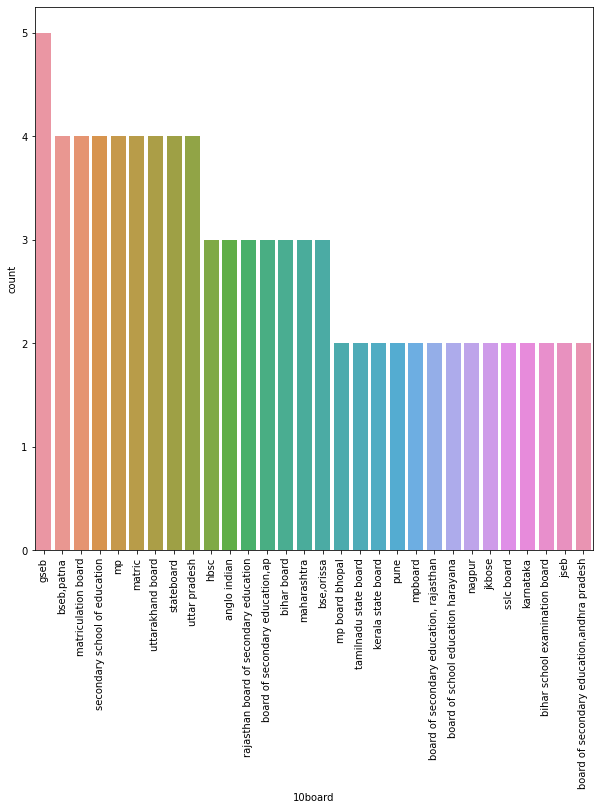

In [8]:
plt.figure(figsize=(10,10))
sns.countplot(x=data['10board'],order=data['10board'].value_counts().iloc[30:60].index)
plt.xticks(rotation=90)
plt.show()

**City name is also given in board column**

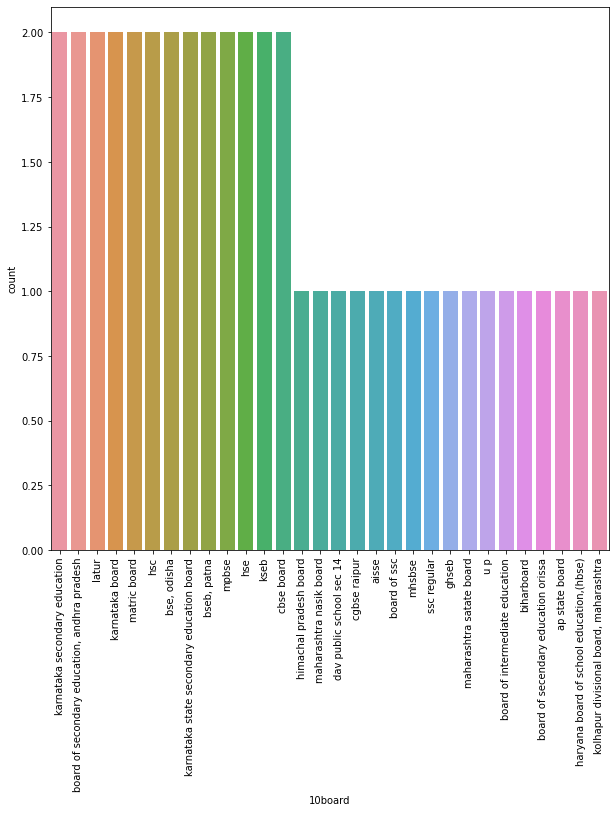

In [9]:
plt.figure(figsize=(10,10))
sns.countplot(x=data['10board'],order=data['10board'].value_counts().iloc[60:90].index)
plt.xticks(rotation=90)
plt.show()

**In board column instead of board there are some schools given**

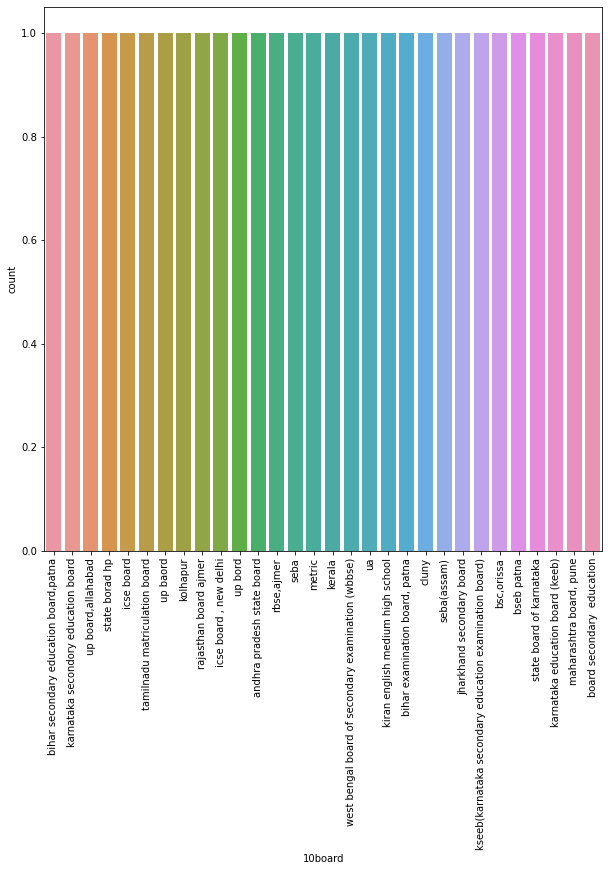

In [10]:
plt.figure(figsize=(10,10))
sns.countplot(x=data['10board'],order=data['10board'].value_counts().iloc[90:120].index)
plt.xticks(rotation=90)
plt.show()

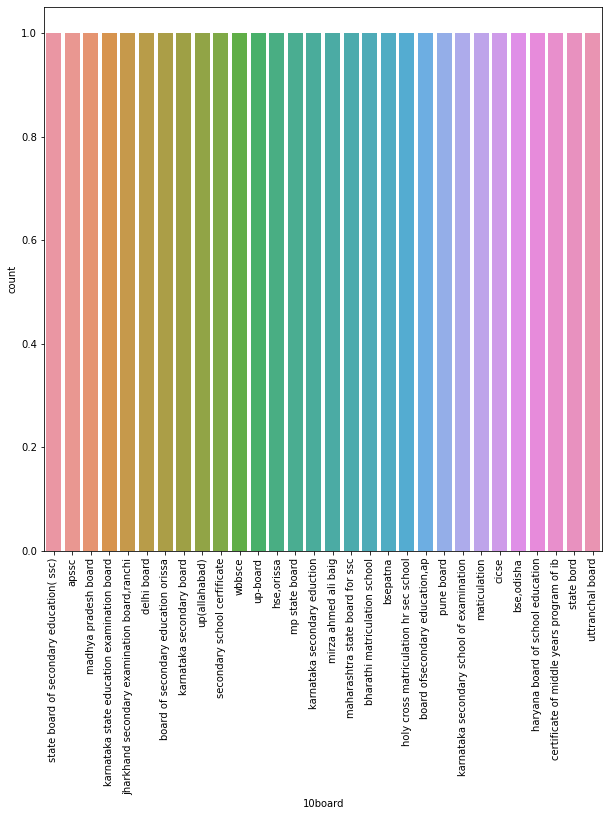

In [11]:
plt.figure(figsize=(10,10))
sns.countplot(x=data['10board'],order=data['10board'].value_counts().iloc[120:150].index)
plt.xticks(rotation=90)
plt.show()

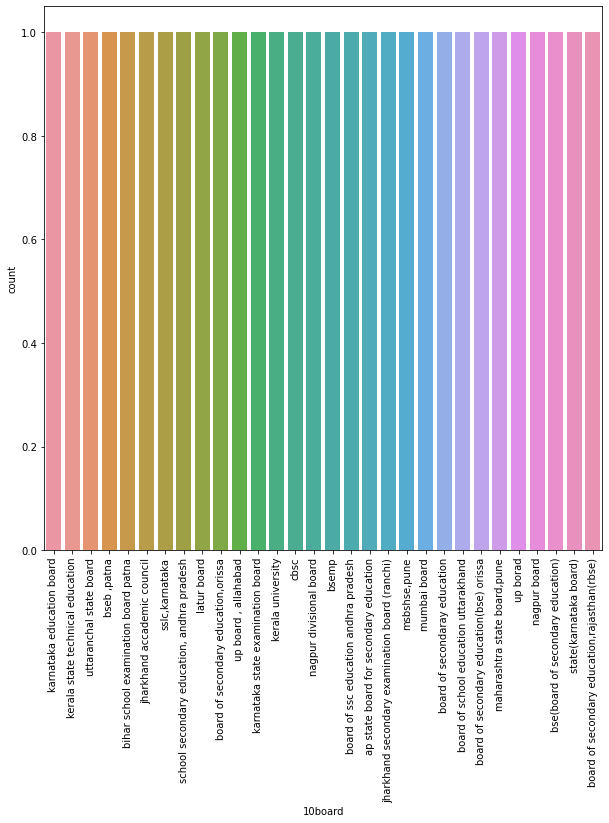

In [13]:
plt.figure(figsize=(10,10))
sns.countplot(x=data['10board'],order=data['10board'].value_counts().iloc[150:180].index)
plt.xticks(rotation=90)
plt.show()

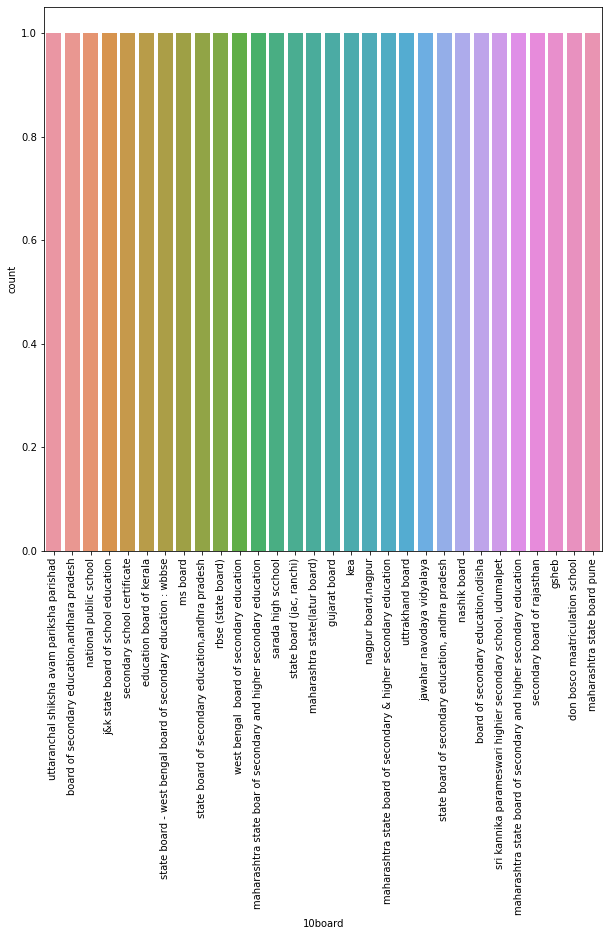

In [14]:
plt.figure(figsize=(10,10))
sns.countplot(x=data['10board'],order=data['10board'].value_counts().iloc[180:210].index)
plt.xticks(rotation=90)
plt.show()

**Names of board have been repeated for e.g wbse is also represented as west bengal board of secondary education**

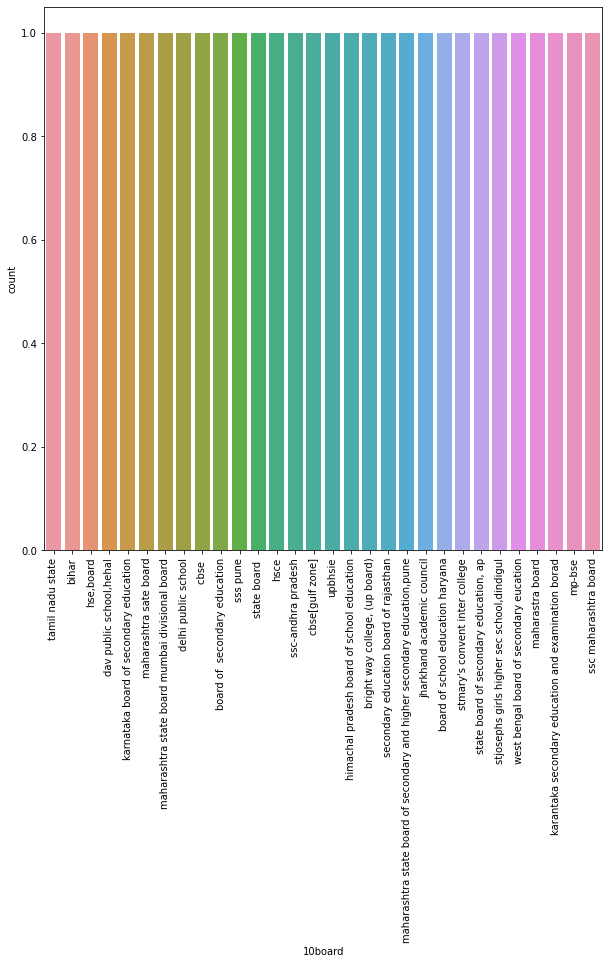

In [15]:
plt.figure(figsize=(10,10))
sns.countplot(x=data['10board'],order=data['10board'].value_counts().iloc[210:240].index)
plt.xticks(rotation=90)
plt.show()

**Central board of Secondary Education is also represented as cbse**

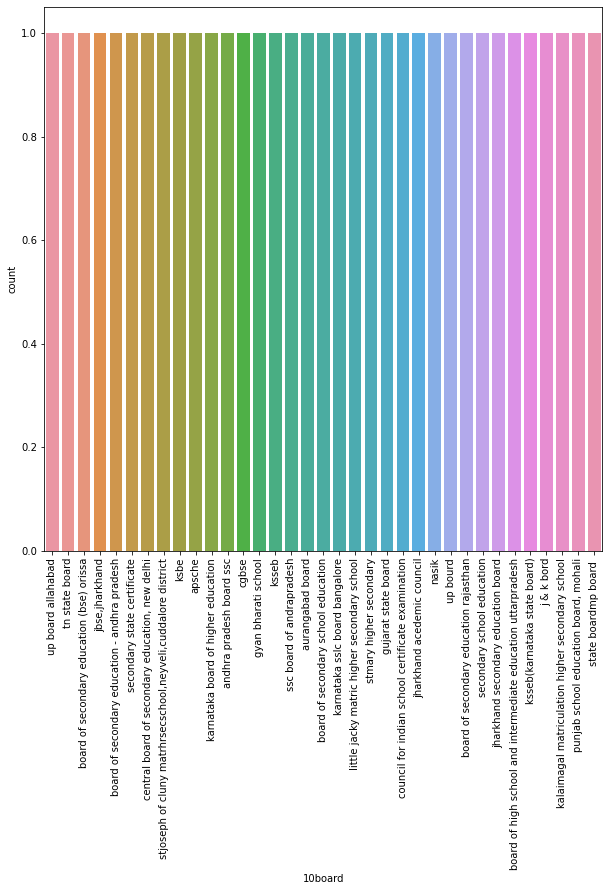

In [16]:
plt.figure(figsize=(10,10))
sns.countplot(x=data['10board'],order=data['10board'].value_counts().iloc[240:].index)
plt.xticks(rotation=90)
plt.show()

**Many places school and city names is given instead of board e.g. Nasik, gyan bharti school etc.**

# Bivariate Analysis

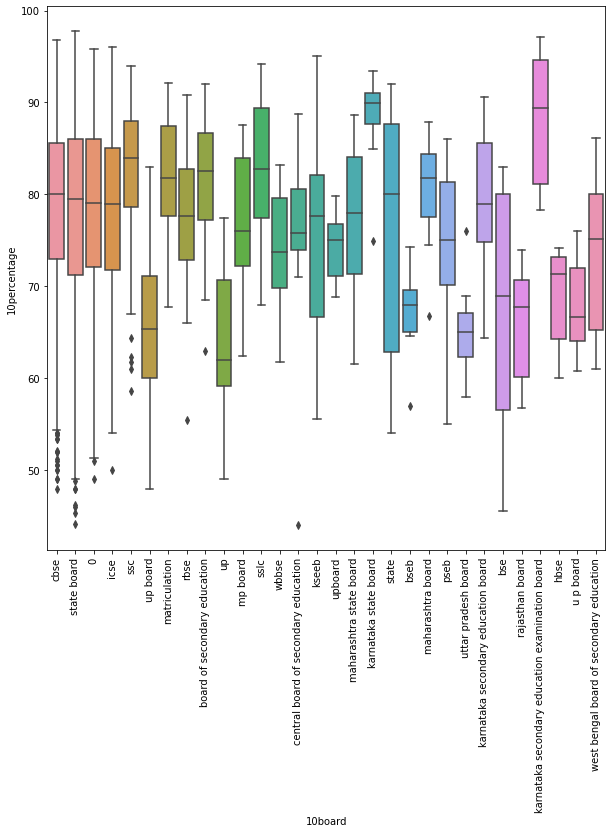

In [35]:
plt.figure(figsize=(10,10))
sns.boxplot(x=data['10board'],y=data['10percentage'],order=data['10board'].value_counts().iloc[:30].index)
plt.xticks(rotation=90)
plt.show()

**Best board with highest median score is Karnatak Sate Board, whereas highest percentage is backed by State board**

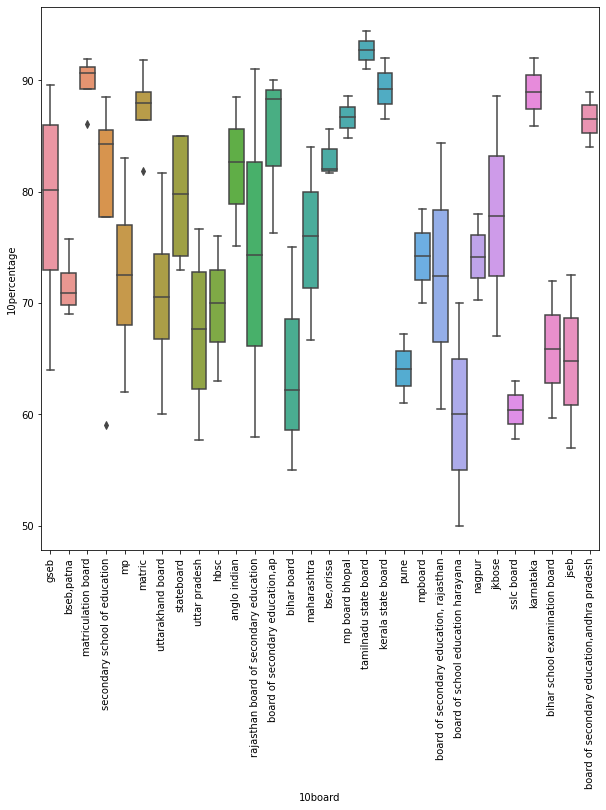

In [36]:
plt.figure(figsize=(10,10))
sns.boxplot(x=data['10board'],y=data['10percentage'],order=data['10board'].value_counts().iloc[30:60].index)
plt.xticks(rotation=90)
plt.show()

**Best board with minimum highest score is Kerala state board**

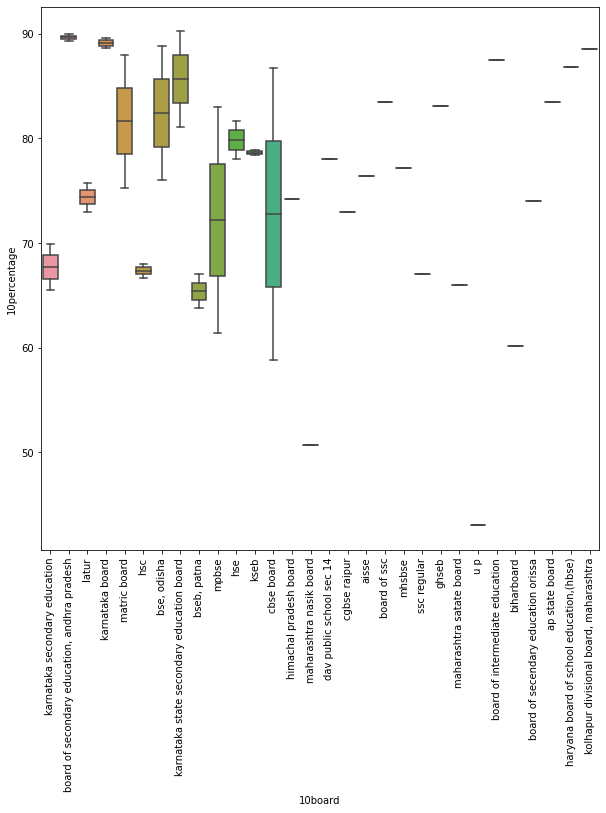

In [49]:
plt.figure(figsize=(10,10))
sns.boxplot(x=data['10board'],y=data['10percentage'],order=data['10board'].value_counts().iloc[60:90].index)
plt.xticks(rotation=90)
plt.show()

**Board with very less variance in marks are board of secondary education, andhra pradesh and kseb**

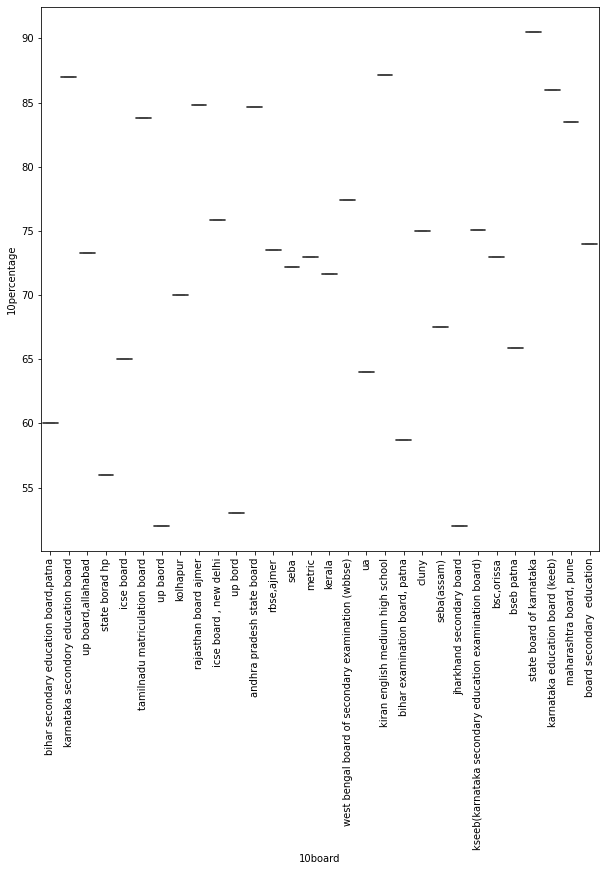

In [50]:
plt.figure(figsize=(10,10))
sns.boxplot(x=data['10board'],y=data['10percentage'],order=data['10board'].value_counts().iloc[90:120].index)
plt.xticks(rotation=90)
plt.show()

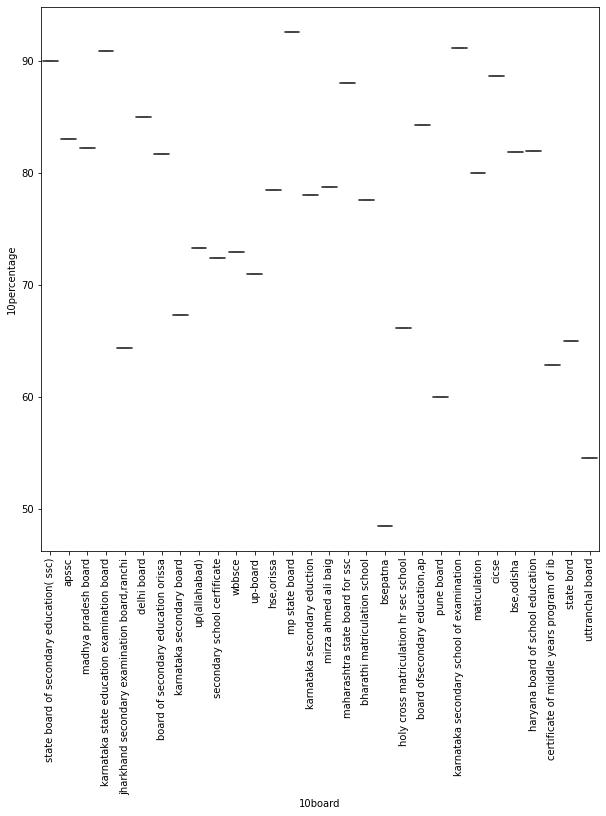

In [51]:
plt.figure(figsize=(10,10))
sns.boxplot(x=data['10board'],y=data['10percentage'],order=data['10board'].value_counts().iloc[120:150].index)
plt.xticks(rotation=90)
plt.show()

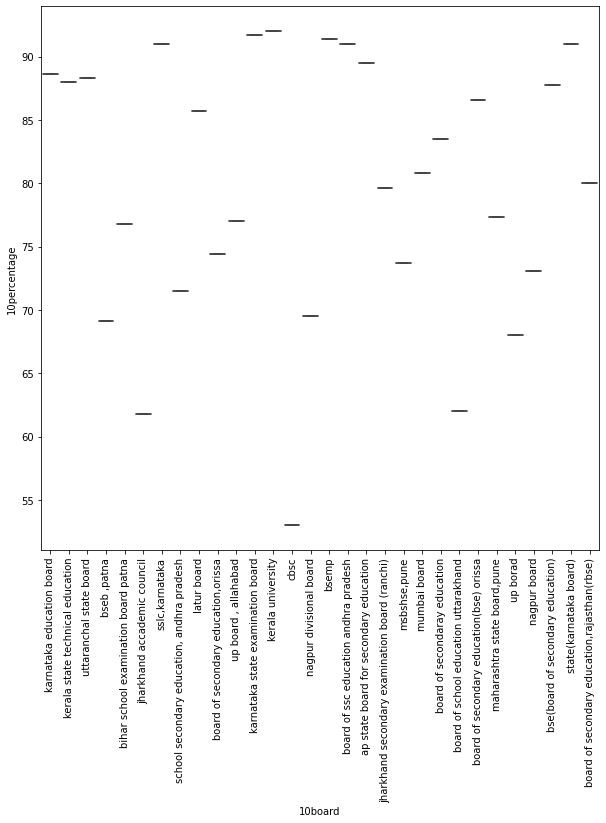

In [52]:
plt.figure(figsize=(10,10))
sns.boxplot(x=data['10board'],y=data['10percentage'],order=data['10board'].value_counts().iloc[150:180].index)
plt.xticks(rotation=90)
plt.show()

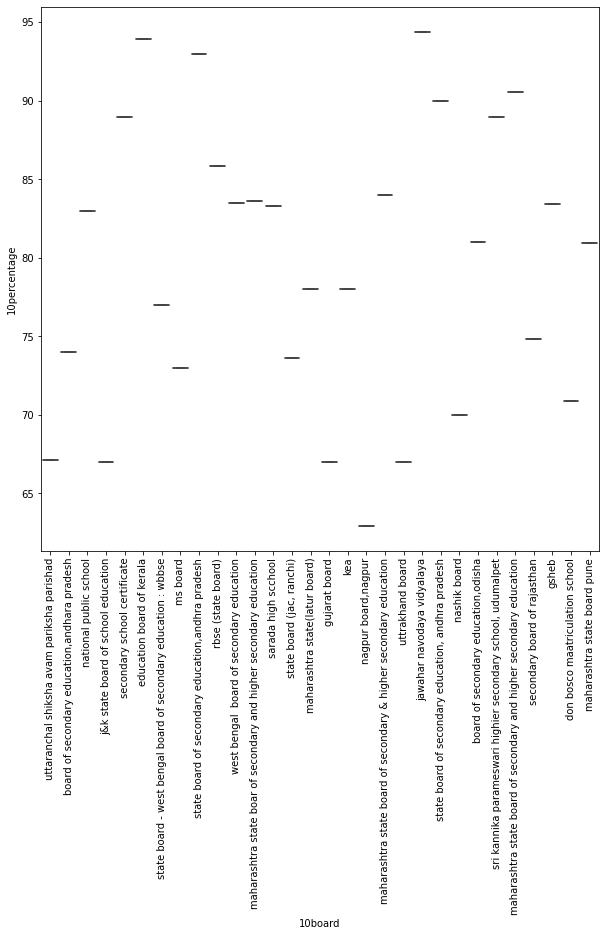

In [53]:
plt.figure(figsize=(10,10))
sns.boxplot(x=data['10board'],y=data['10percentage'],order=data['10board'].value_counts().iloc[180:210].index)
plt.xticks(rotation=90)
plt.show()

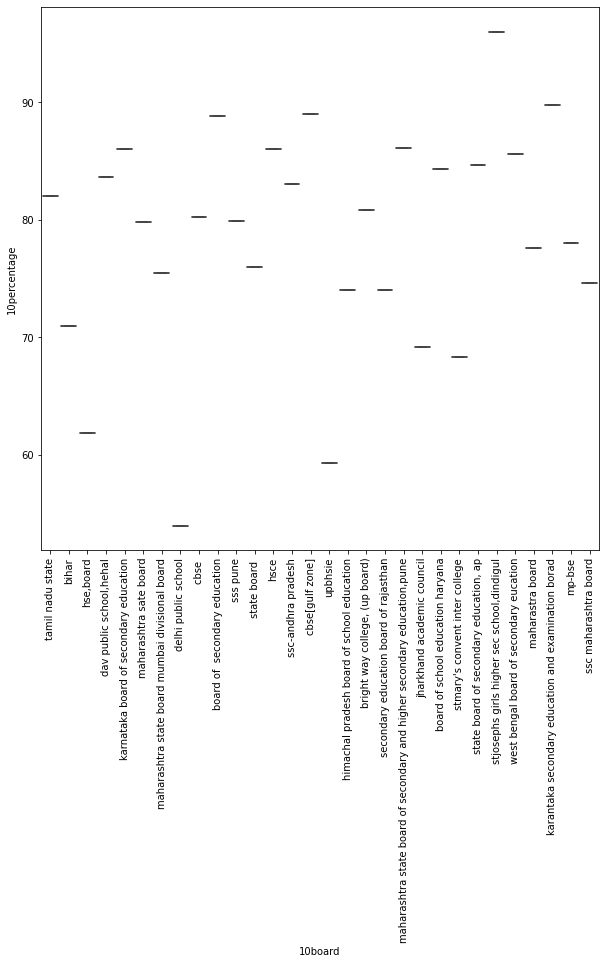

In [54]:
plt.figure(figsize=(10,10))
sns.boxplot(x=data['10board'],y=data['10percentage'],order=data['10board'].value_counts().iloc[210:240].index)
plt.xticks(rotation=90)
plt.show()

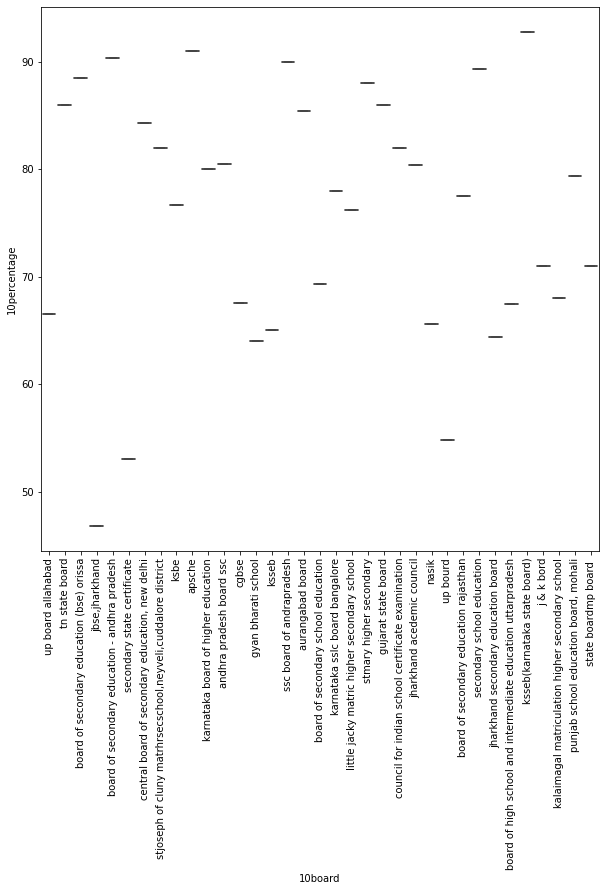

In [55]:
plt.figure(figsize=(10,10))
sns.boxplot(x=data['10board'],y=data['10percentage'],order=data['10board'].value_counts().iloc[240:].index)
plt.xticks(rotation=90)
plt.show()

# Conclusion after Analysing 10 board

1. Maxmun students are from cbse with frequency of 1395.
2. In board column instead of board there are some schools given
3. Central board of Secondary Education is also represented as cbse, means duplicate values are present in the data.
4. Many places school and city names is given instead of board e.g. Nasik, gyan bharti school etc.
5. Best board with highest median score is Karnatak Sate Board, whereas highest percentage is backed by State board
6. Best board with minimum highest score is Kerala state board
7. Board with very less variance in marks are board of secondary education, andhra pradesh and kseb.

# Analysing 12graduation

In [56]:
data['12graduation'].describe()

count    3998.000000
mean     2008.087544
std         1.653599
min      1995.000000
25%      2007.000000
50%      2008.000000
75%      2009.000000
max      2013.000000
Name: 12graduation, dtype: float64

In [57]:
data['12graduation'].head()

0    2007
1    2007
2    2010
3    2007
4    2008
Name: 12graduation, dtype: int64

In [58]:
data['12graduation'].value_counts()

2009    1052
2008     935
2010     742
2007     528
2006     407
2005     160
2004      73
2011      46
2003      25
2002      14
2012      10
2001       2
2013       1
1999       1
1995       1
1998       1
Name: 12graduation, dtype: int64

<Figure size 720x720 with 0 Axes>

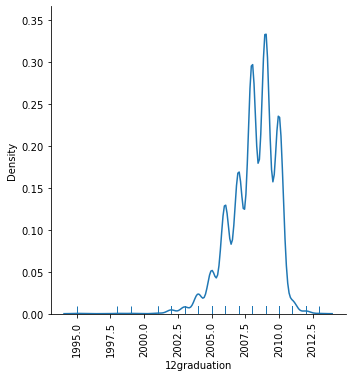

In [63]:
plt.figure(figsize=(10,10))
sns.displot(x=data['12graduation'],kind='kde',rug=True)
plt.xticks(rotation=90)
plt.show()

**Most peope graduated between 2003-2012**

<AxesSubplot:xlabel='12graduation', ylabel='count'>

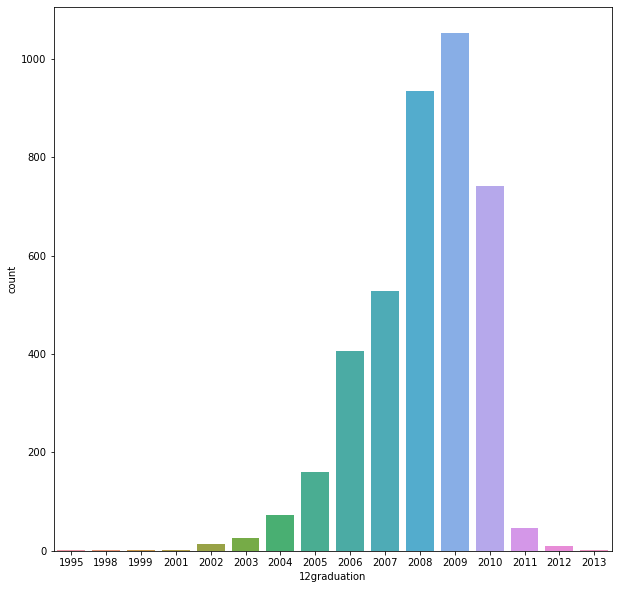

In [67]:
plt.figure(figsize=(10,10))
sns.countplot(x=data['12graduation'])

**Most people graduated in 2009**

# Bivariate Analysis

<AxesSubplot:xlabel='Gender', ylabel='12graduation'>

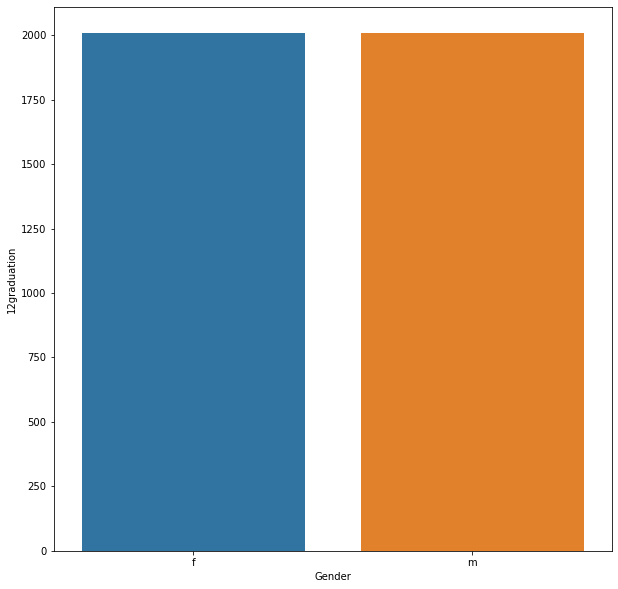

In [71]:
plt.figure(figsize=(10,10))
sns.barplot(x=data['Gender'],y=data['12graduation'])

**No. of 12graduate male and female are same**

<AxesSubplot:xlabel='Gender', ylabel='12graduation'>

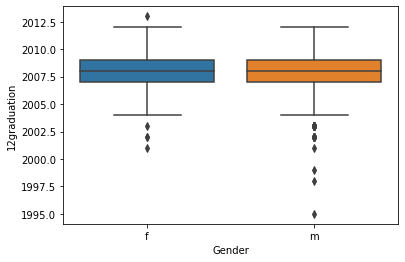

In [69]:
sns.boxplot(x=data['Gender'],y=data['12graduation'])

**Outliers tells us that there were very less 12 graduates 2001**

# Conclusion after analysing 12 graduates

1. Most peope graduated between 2003-2012.
2. Most people graduated in 2009.
3. No. of 12graduate male and female are same.
4. Outliers tells us that there were very less 12 graduates 2001.

# Analysing 12percentage

In [72]:
data['12percentage'].describe()

count    3998.000000
mean       74.466366
std        10.999933
min        40.000000
25%        66.000000
50%        74.400000
75%        82.600000
max        98.700000
Name: 12percentage, dtype: float64

In [73]:
data['12percentage'].head()

0    95.8
1    85.0
2    68.2
3    83.6
4    76.8
Name: 12percentage, dtype: float64

In [74]:
data['12percentage'].value_counts()

70.00    72
72.00    68
74.00    63
68.00    58
62.00    58
         ..
87.14     1
77.54     1
83.16     1
72.90     1
56.22     1
Name: 12percentage, Length: 801, dtype: int64

<Figure size 720x720 with 0 Axes>

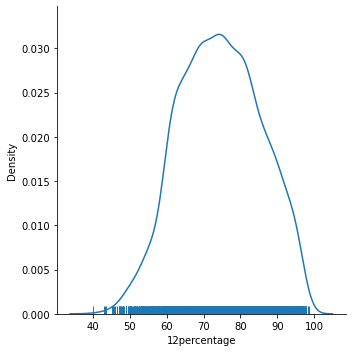

In [76]:
plt.figure(figsize=(10,10))
sns.displot(x=data['12percentage'],kind='kde',rug=True)

**The data looks normally distributed with most of the 12percentage lying between 45 to 98**

<AxesSubplot:ylabel='12percentage'>

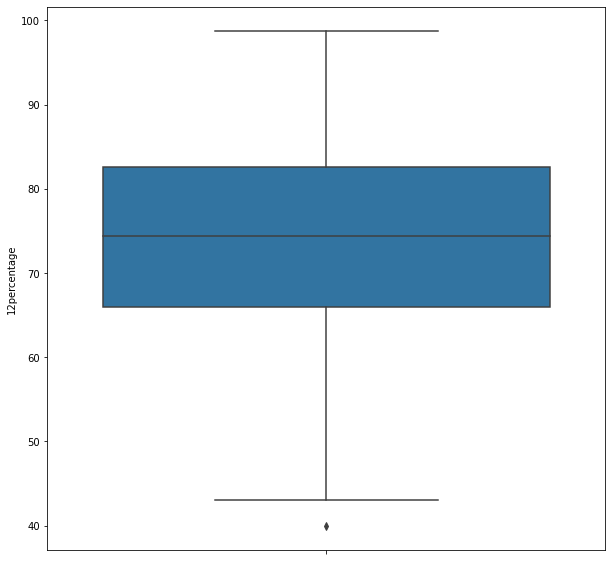

In [79]:
plt.figure(figsize=(10,10))
sns.boxplot(y=data['12percentage'])

**There is ony ony one outlir in the data i.e. 40% with mean 74.466366**

# Bivariate Analysis

<AxesSubplot:xlabel='12percentage', ylabel='10percentage'>

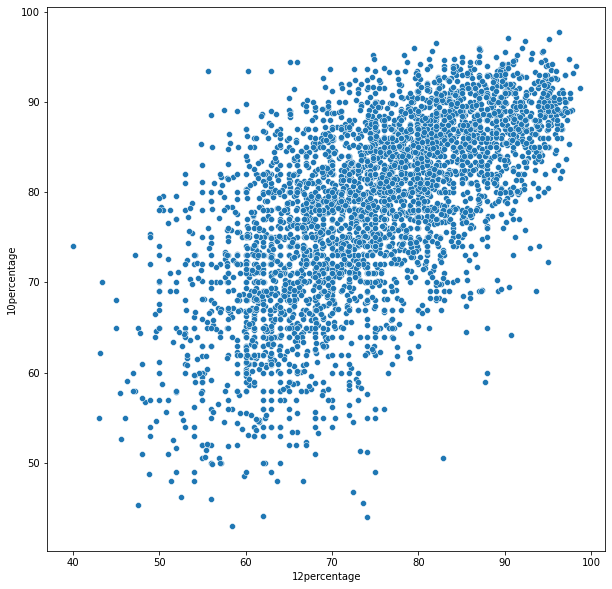

In [80]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=data['12percentage'],y=data['10percentage'])

**There high co-relation in between 10 percentage and 12 percentage**

In [82]:
data['10percentage'].corr(data['12percentage'])

0.643377796023405

<AxesSubplot:xlabel='Gender', ylabel='12percentage'>

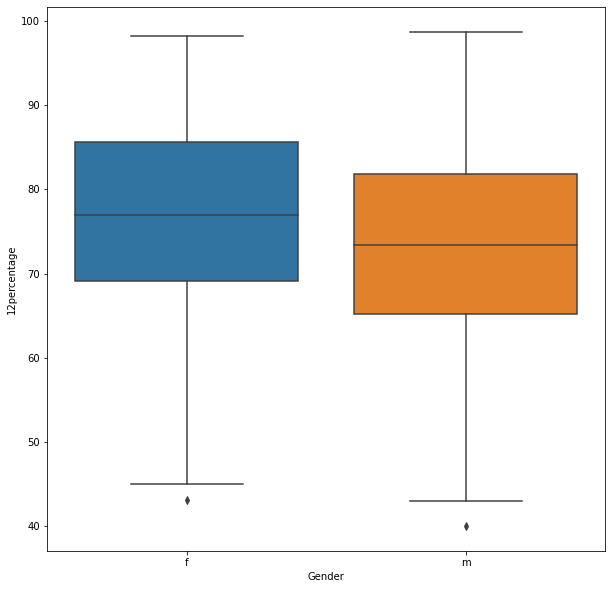

In [85]:
plt.figure(figsize=(10,10))
sns.boxplot(x=data['Gender'],y=data['12percentage'])

**Median score of female is better than male in 12 graduation**

<AxesSubplot:xlabel='12percentage', ylabel='Salary'>

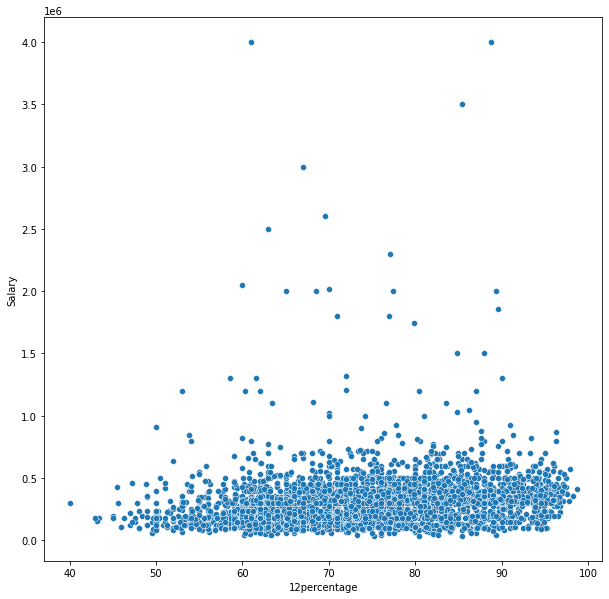

In [86]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=data['12percentage'],y=data['Salary'])

**There's very low co-relation between Salary and 12 perentage**

In [87]:
data['Salary'].corr(data['12percentage'])

0.170254477902461

# Conclusion after analysing 12 percentage

1. The data looks normally distributed with most of the 12percentage lying between 45 to 98.
2. There is ony ony onwe outlir in the data i.e. 40% with mean 74.466366.
3. There high co-relation in between 10 percentage and 12 percentage i.e. 0.643377796023405.
4. Median score of female is better than male in 12 graduation.
5. Theres very low co-relation between Salary and 12 perentage.

# Analysing 12board

In [88]:
data['12board'].describe()

count     3998
unique     340
top       cbse
freq      1400
Name: 12board, dtype: object

In [89]:
data['12board'].head()

0    board of intermediate education,ap
1                                  cbse
2                                  cbse
3                                  cbse
4                                  cbse
Name: 12board, dtype: object

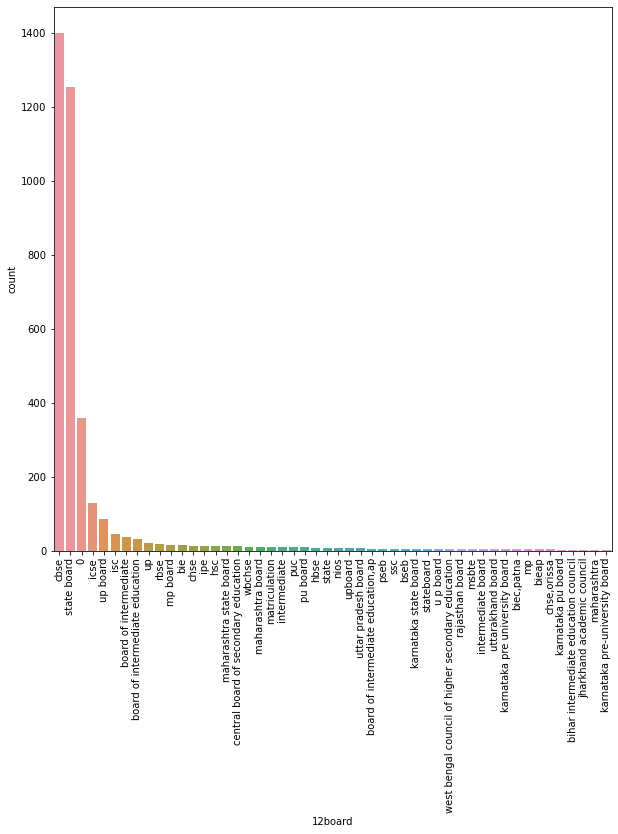

In [94]:
plt.figure(figsize=(10,10))
sns.countplot(x=data['12board'],order=data['12board'].value_counts().iloc[:50].index)
plt.xticks(rotation=90)
plt.show()

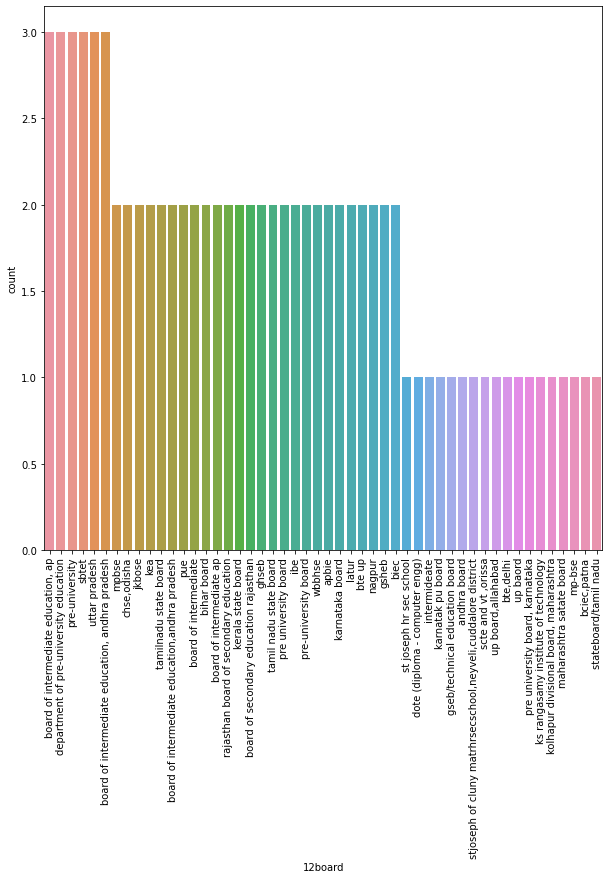

In [95]:
plt.figure(figsize=(10,10))
sns.countplot(x=data['12board'],order=data['12board'].value_counts().iloc[50:100].index)
plt.xticks(rotation=90)
plt.show()

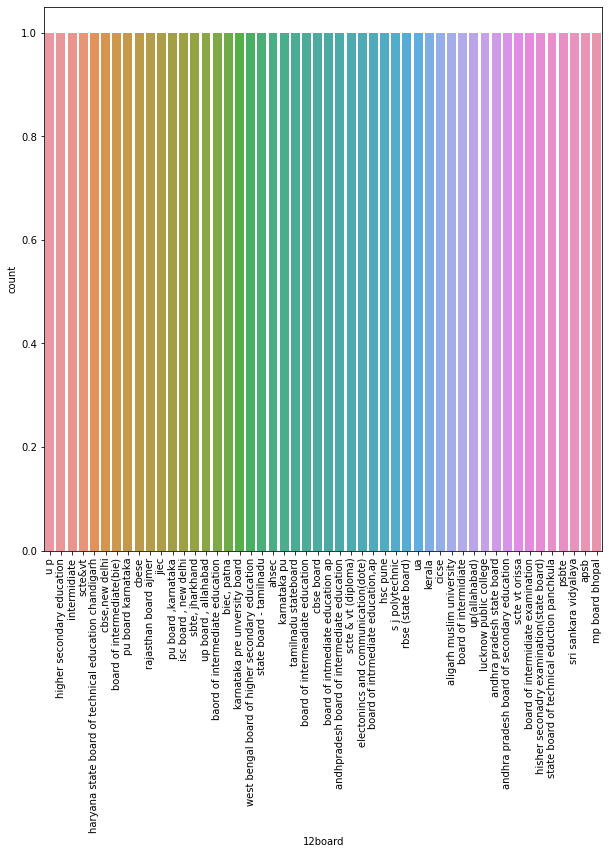

In [96]:
plt.figure(figsize=(10,10))
sns.countplot(x=data['12board'],order=data['12board'].value_counts().iloc[100:150].index)
plt.xticks(rotation=90)
plt.show()

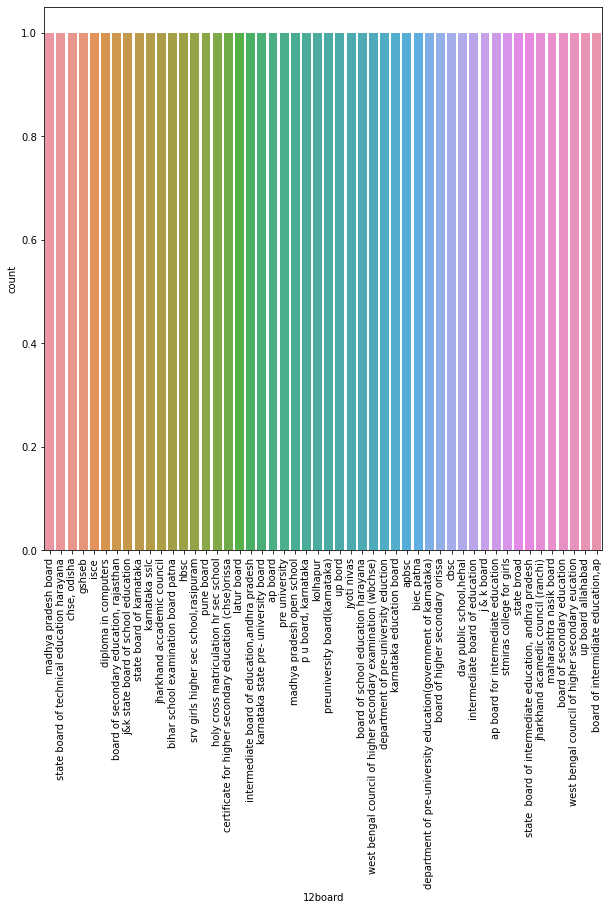

In [97]:
plt.figure(figsize=(10,10))
sns.countplot(x=data['12board'],order=data['12board'].value_counts().iloc[150:200].index)
plt.xticks(rotation=90)
plt.show()

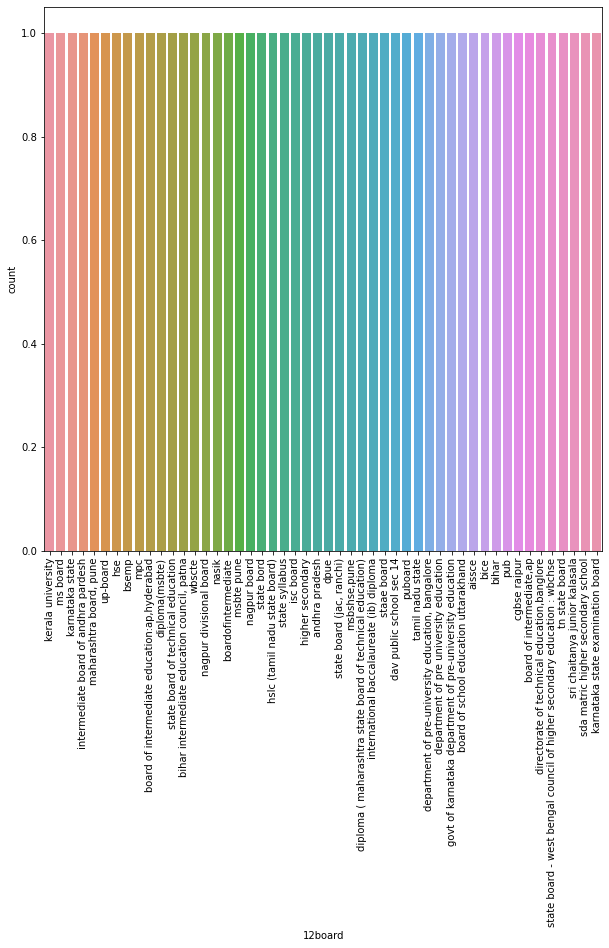

In [98]:
plt.figure(figsize=(10,10))
sns.countplot(x=data['12board'],order=data['12board'].value_counts().iloc[200:250].index)
plt.xticks(rotation=90)
plt.show()

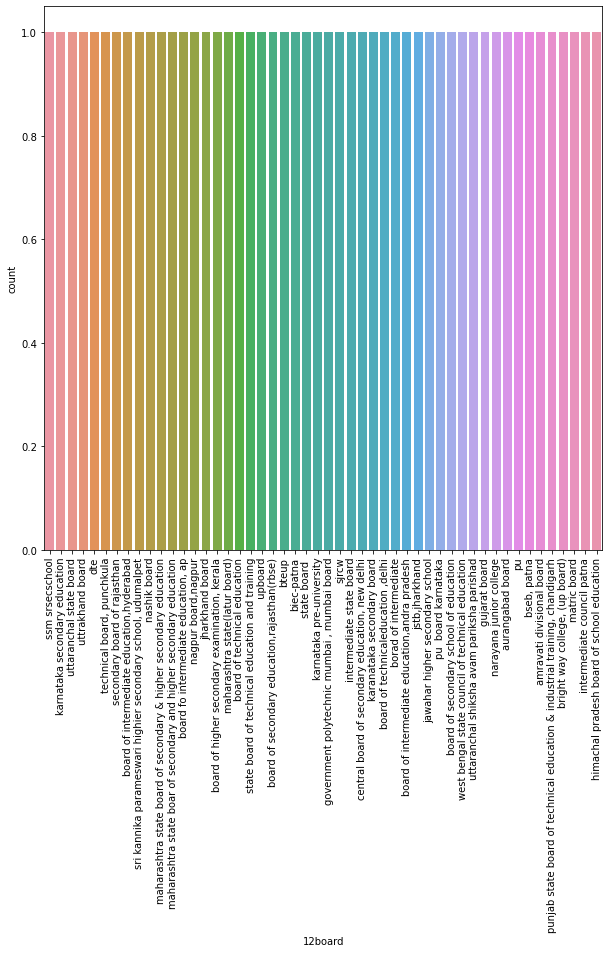

In [99]:
plt.figure(figsize=(10,10))
sns.countplot(x=data['12board'],order=data['12board'].value_counts().iloc[250:300].index)
plt.xticks(rotation=90)
plt.show()

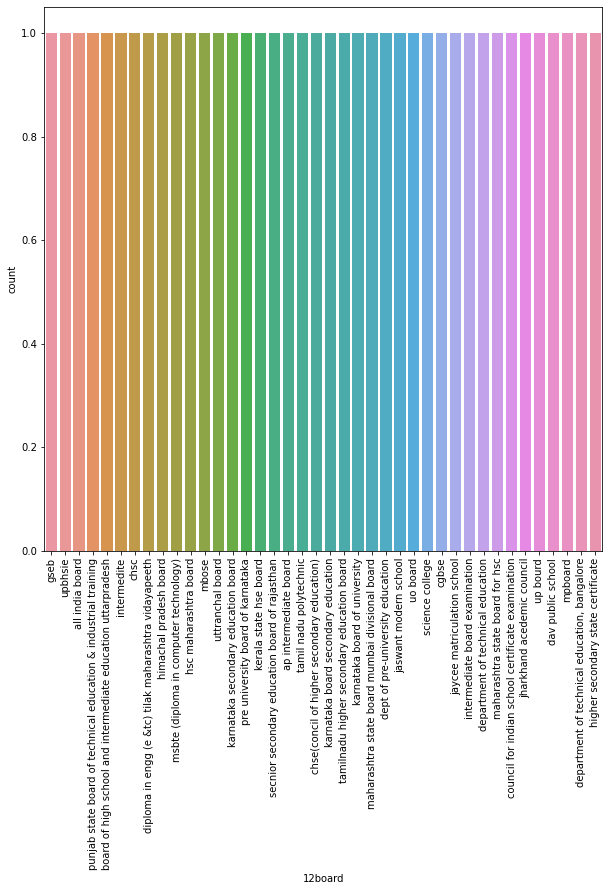

In [100]:
plt.figure(figsize=(10,10))
sns.countplot(x=data['12board'],order=data['12board'].value_counts().iloc[300:].index)
plt.xticks(rotation=90)
plt.show()

**Highest number of students are studying in cbse**

# Bivariate Analysis

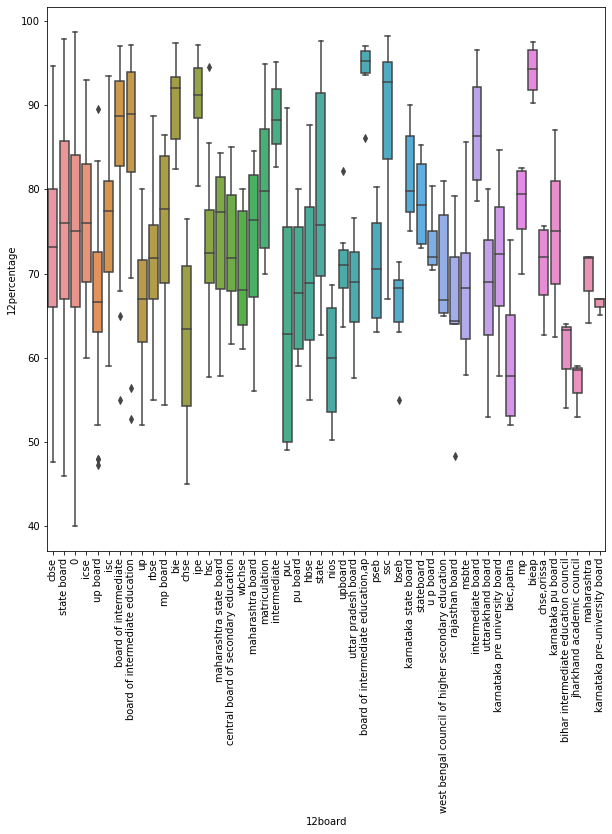

In [105]:
plt.figure(figsize=(10,10))
sns.boxplot(x=data['12board'],y=data['12percentage'],order=data['12board'].value_counts().iloc[:50].index)
plt.xticks(rotation=90)
plt.show()

**There are garbage value 0 in the data and repeated values are also present such as board names are written in the short from.**

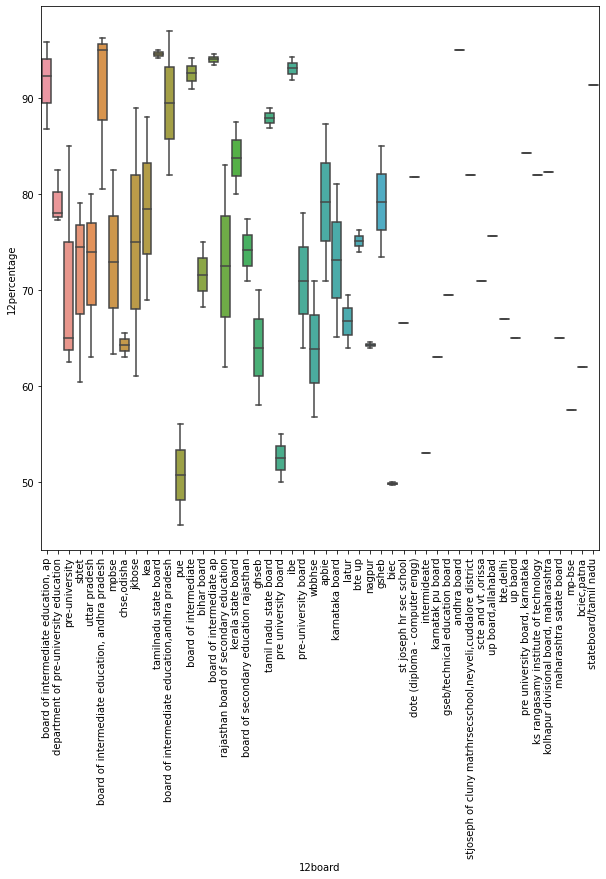

In [106]:
plt.figure(figsize=(10,10))
sns.boxplot(x=data['12board'],y=data['12percentage'],order=data['12board'].value_counts().iloc[50:100].index)
plt.xticks(rotation=90)
plt.show()

**Board with minimum variance in marks are tamil nadu state board,, board of intermediate, biec**

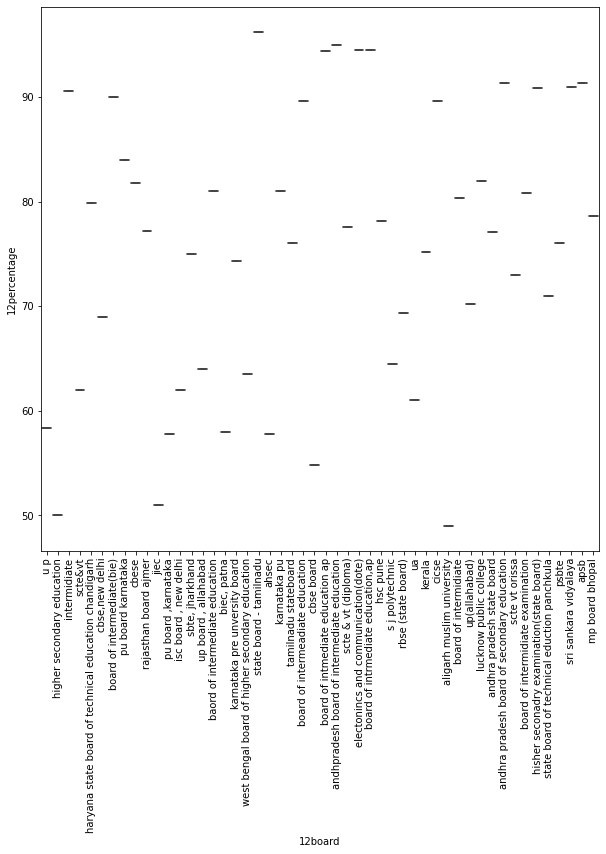

In [107]:
plt.figure(figsize=(10,10))
sns.boxplot(x=data['12board'],y=data['12percentage'],order=data['12board'].value_counts().iloc[100:150].index)
plt.xticks(rotation=90)
plt.show()

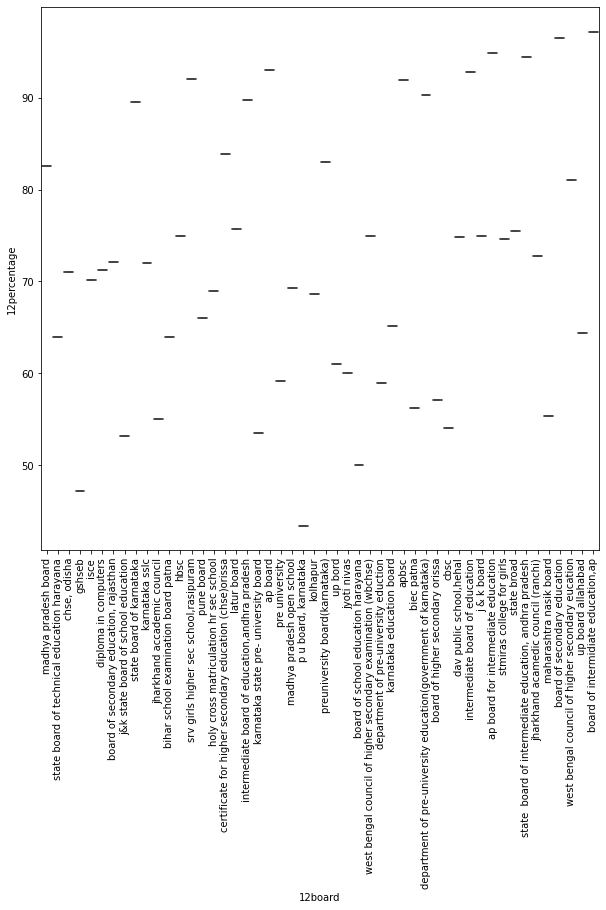

In [108]:
plt.figure(figsize=(10,10))
sns.boxplot(x=data['12board'],y=data['12percentage'],order=data['12board'].value_counts().iloc[150:200].index)
plt.xticks(rotation=90)
plt.show()

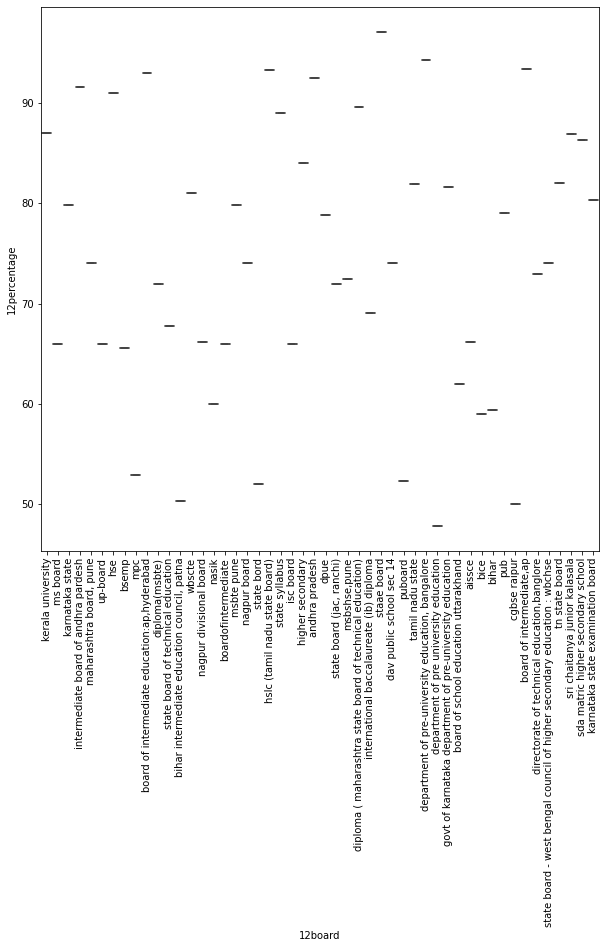

In [109]:
plt.figure(figsize=(10,10))
sns.boxplot(x=data['12board'],y=data['12percentage'],order=data['12board'].value_counts().iloc[200:250].index)
plt.xticks(rotation=90)
plt.show()

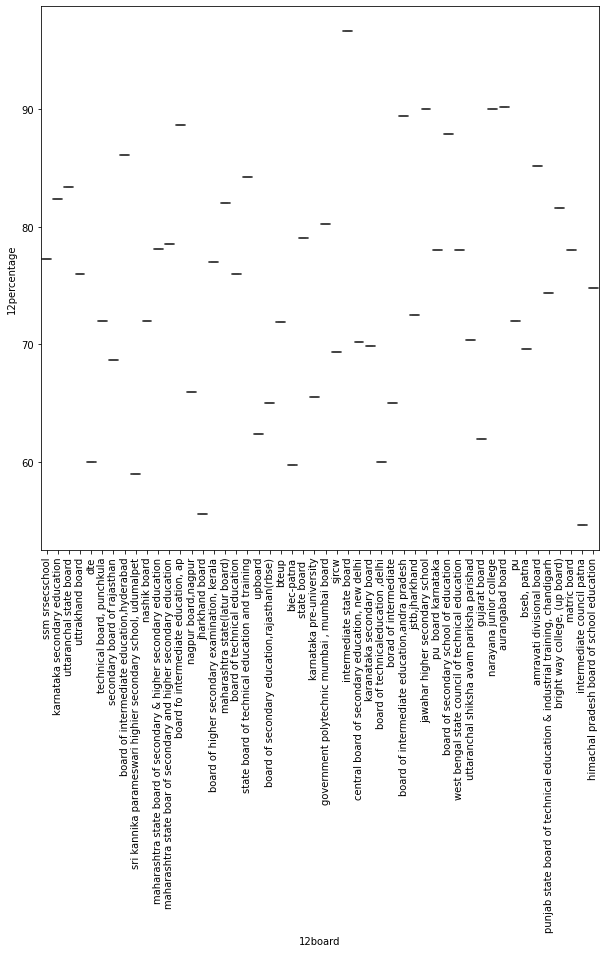

In [110]:
plt.figure(figsize=(10,10))
sns.boxplot(x=data['12board'],y=data['12percentage'],order=data['12board'].value_counts().iloc[250:300].index)
plt.xticks(rotation=90)
plt.show()

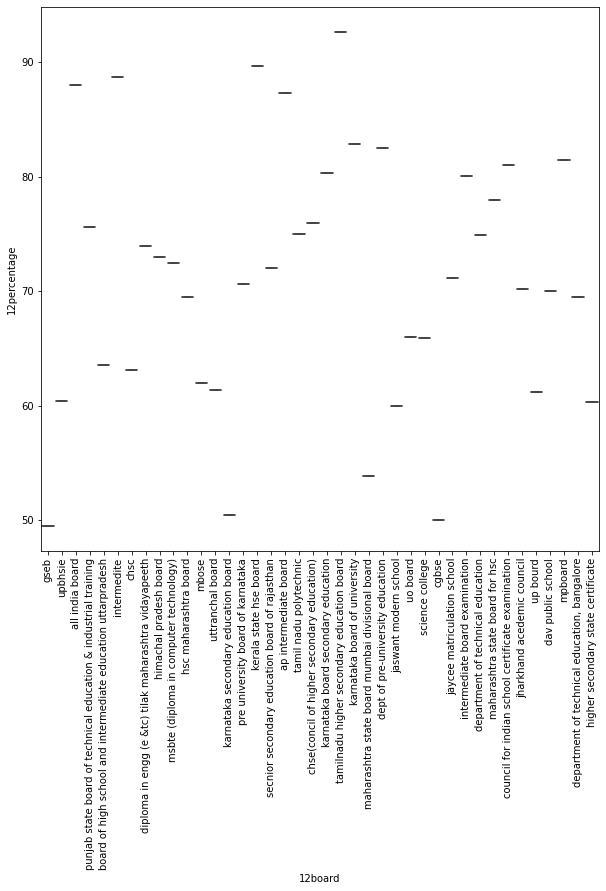

In [111]:
plt.figure(figsize=(10,10))
sns.boxplot(x=data['12board'],y=data['12percentage'],order=data['12board'].value_counts().iloc[300:].index)
plt.xticks(rotation=90)
plt.show()

# Conclusion after analysing 12board

1. Highest number of students are studying in cbse.
2. Board with minimum variance in marks are tamil nadu state board,, board of intermediate, biec.
3. Board with minimum variance in marks are tamil nadu state board,, board of intermediate, biec

# Analysing College Tier

In [112]:
data['CollegeTier'].describe()

count    3998.000000
mean        1.925713
std         0.262270
min         1.000000
25%         2.000000
50%         2.000000
75%         2.000000
max         2.000000
Name: CollegeTier, dtype: float64

In [113]:
data['CollegeTier'].head()

0    2
1    2
2    2
3    1
4    2
Name: CollegeTier, dtype: int64

In [114]:
data['CollegeTier'].value_counts()

2    3701
1     297
Name: CollegeTier, dtype: int64

<AxesSubplot:xlabel='CollegeTier', ylabel='count'>

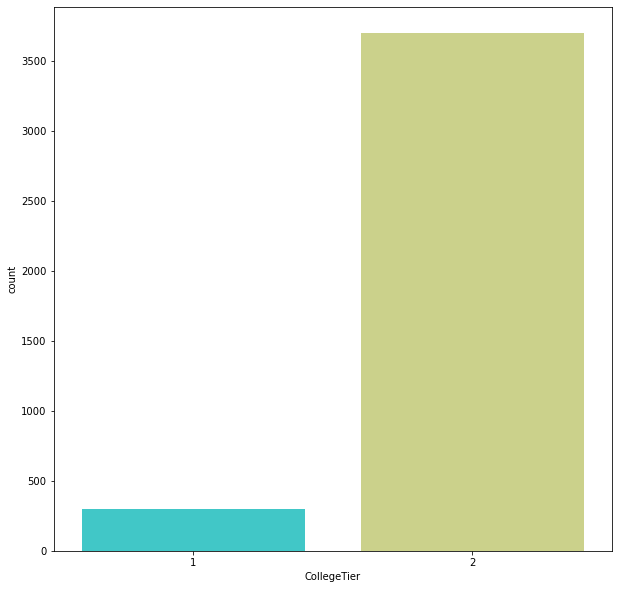

In [116]:
plt.figure(figsize=(10,10))
sns.countplot(x=data['CollegeTier'],palette='rainbow')

**There are 297 Tier 1 and 3701 Tier 2 College.**

# Bivariate Analysis

<AxesSubplot:xlabel='CollegeTier', ylabel='Salary'>

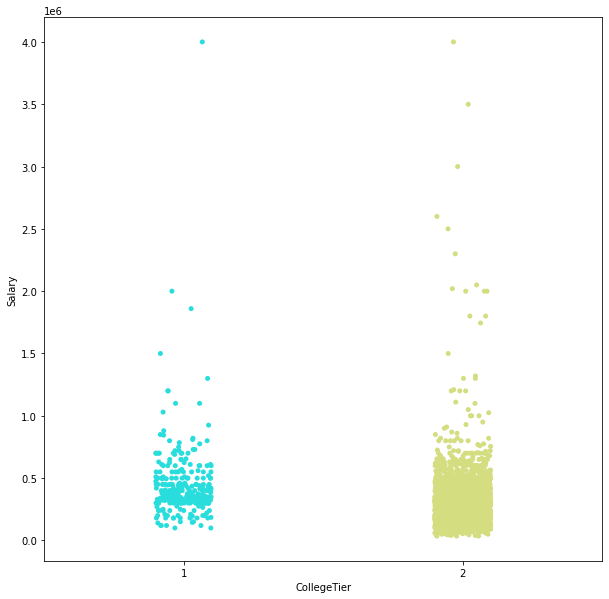

In [134]:
plt.figure(figsize=(10,10))
sns.stripplot(x=data['CollegeTier'],y=data['Salary'],palette='rainbow',jitter=True)

**In Tier 1 the salary is less varied, whereas the salary is much in Tier 2**

In [127]:
data['CollegeTier'].value_counts()

2    3701
1     297
Name: CollegeTier, dtype: int64

<AxesSubplot:xlabel='CollegeTier', ylabel='12percentage'>

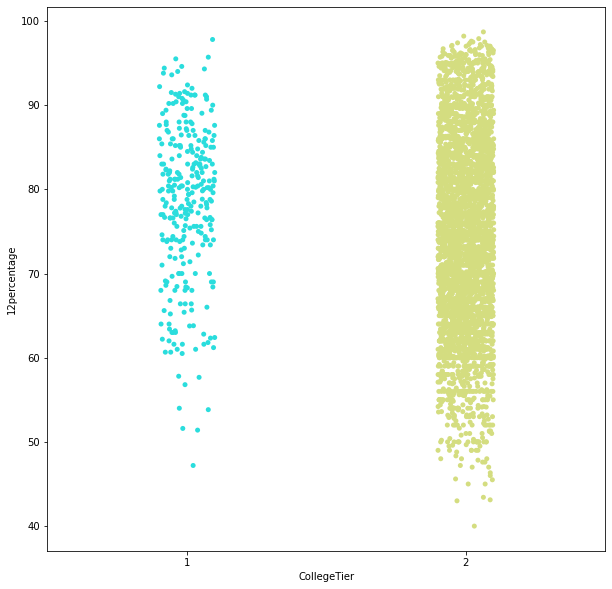

In [136]:
plt.figure(figsize=(10,10))
sns.stripplot(x=data['CollegeTier'],y=data['12percentage'],palette='rainbow',jitter=True)

# Conclusion after analysing College Tier

1. There are 297 Tier 1 and 3701 Tier 2 College.
2. In Tier 1 the salary is less varied, whereas the salary is much in Tier 2

# Analysing Degree

In [137]:
data['Degree'].describe()

count            3998
unique              4
top       B.Tech/B.E.
freq             3700
Name: Degree, dtype: object

In [138]:
data['Degree'].head()

0    B.Tech/B.E.
1    B.Tech/B.E.
2    B.Tech/B.E.
3    B.Tech/B.E.
4    B.Tech/B.E.
Name: Degree, dtype: object

In [140]:
data['Degree'].value_counts()

B.Tech/B.E.      3700
MCA               243
M.Tech./M.E.       53
M.Sc. (Tech.)       2
Name: Degree, dtype: int64

<AxesSubplot:xlabel='Degree', ylabel='count'>

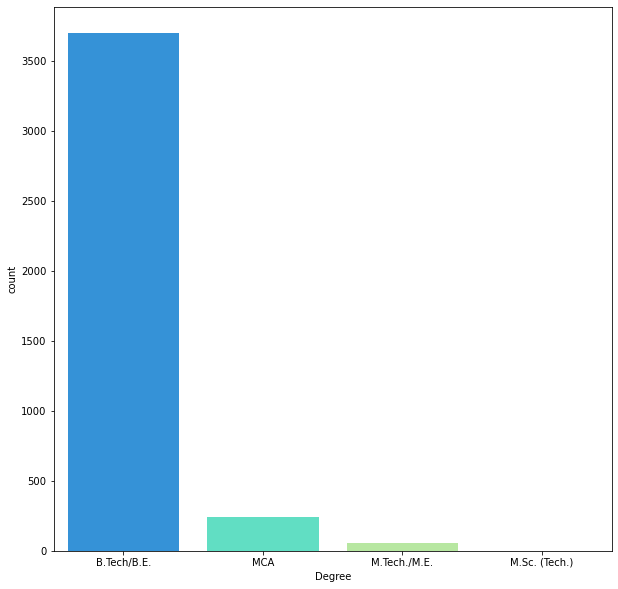

In [139]:
plt.figure(figsize=(10,10))
sns.countplot(x=data['Degree'],palette='rainbow')

# Bivariate Analysis

<AxesSubplot:xlabel='Degree', ylabel='Salary'>

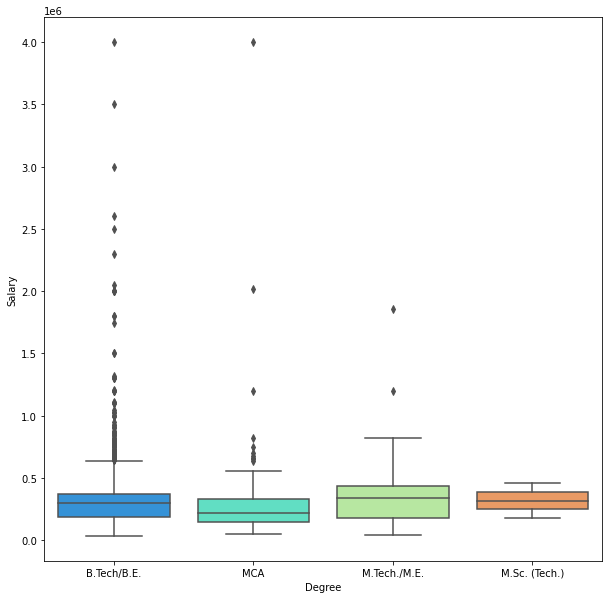

In [147]:
plt.figure(figsize=(10,10))
sns.boxplot(x=data['Degree'],y=data['Salary'],palette='rainbow')

**Median salary in M.Tech/M.E is more as compared to others and least median salary is in MCA**

# Conclusion after analysing degree

1. There are 3700 B.Tech/B.E , 243 MCA,53 M.Tech./M.E. and 2 M.Sc.(Tech.) students.
2. Median salary in M.Tech/M.E is more as compared to others and least median salary is in MCA

# Analysing Specilization

In [150]:
data['Specialization'].describe()

count                                          3998
unique                                           46
top       electronics and communication engineering
freq                                            880
Name: Specialization, dtype: object

In [151]:
data['Specialization'].head()

0                         computer engineering
1    electronics and communication engineering
2                       information technology
3                         computer engineering
4    electronics and communication engineering
Name: Specialization, dtype: object

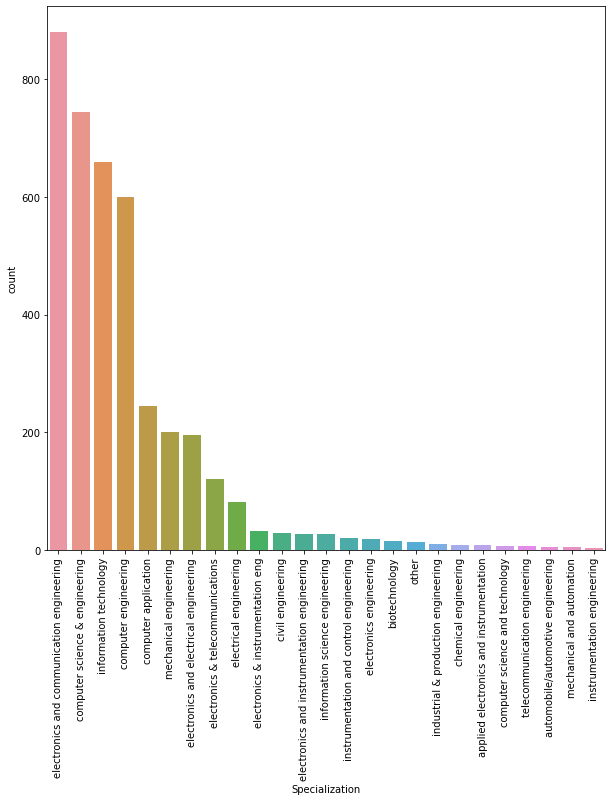

In [152]:
plt.figure(figsize=(10,10))
sns.countplot(x=data['Specialization'],order=data['Specialization'].value_counts().iloc[:25].index)
plt.xticks(rotation=90)
plt.show()

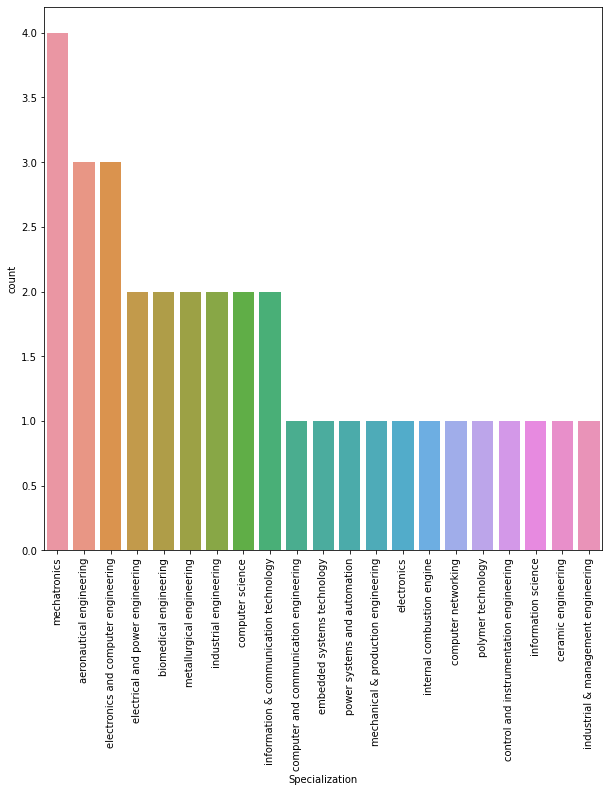

In [154]:
plt.figure(figsize=(10,10))
sns.countplot(x=data['Specialization'],order=data['Specialization'].value_counts().iloc[25:].index)
plt.xticks(rotation=90)
plt.show()

**Mostly students have pursued electronics and communacation engineering**

# Conclusion after analysing Specialization

1. Mostly students have pursued electronics and communacation engineering.

# Analysing CollegeGPA

In [155]:
data['collegeGPA'].describe()

count    3998.000000
mean       71.486171
std         8.167338
min         6.450000
25%        66.407500
50%        71.720000
75%        76.327500
max        99.930000
Name: collegeGPA, dtype: float64

In [161]:
data['collegeGPA'].head()

0    78.00
1    70.06
2    70.00
3    74.64
4    73.90
Name: collegeGPA, dtype: float64

<Figure size 720x720 with 0 Axes>

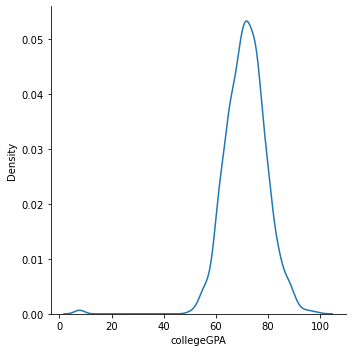

In [163]:
plt.figure(figsize=(10,10))
sns.displot(x=data['collegeGPA'],palette='rainbow',kind='kde')

**The data is approx. normally disributed but there an outlier present**

<AxesSubplot:ylabel='collegeGPA'>

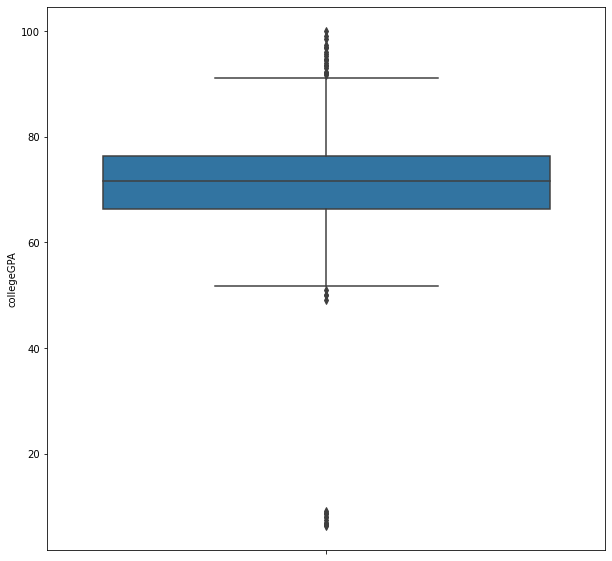

In [167]:
plt.figure(figsize=(10,10))
sns.boxplot(y=data['collegeGPA'])

**Median GPA is 71.720000**

# Bivariate Analysis

<AxesSubplot:xlabel='collegeGPA', ylabel='Salary'>

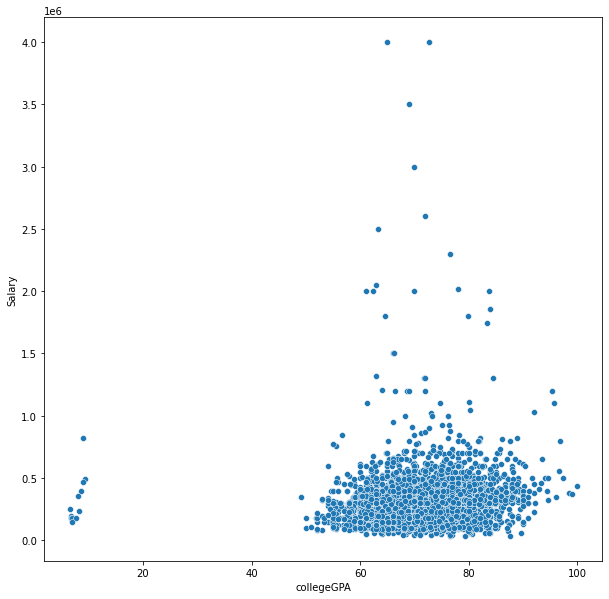

In [170]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=data['collegeGPA'],y=data['Salary'])

In [172]:
data['collegeGPA'].corr(data['Salary'])

0.1301025190711257

**There's not very strong correlation between GPA and Salary i.e.0.1301025190711257**

<AxesSubplot:xlabel='collegeGPA', ylabel='12percentage'>

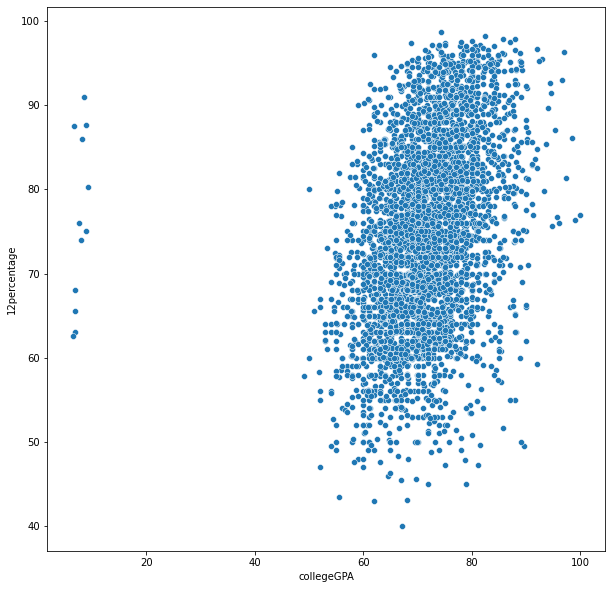

In [173]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=data['collegeGPA'],y=data['12percentage'])

In [174]:
data['collegeGPA'].corr(data['12percentage'])

0.3461369187636892

**There's vary low chances that if a student scores very good marks in class 12 will score good marks in college also.**

<AxesSubplot:xlabel='collegeGPA', ylabel='10percentage'>

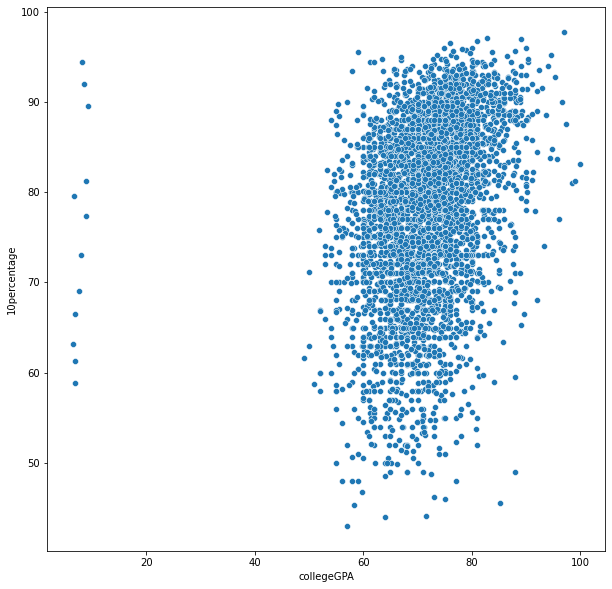

In [177]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=data['collegeGPA'],y=data['10percentage'])

In [178]:
data['collegeGPA'].corr(data['10percentage'])

0.31253787107691905

**There's vary low chances that if a student scores very good marks in class 10 will score good marks in college also.**

<AxesSubplot:xlabel='Gender', ylabel='collegeGPA'>

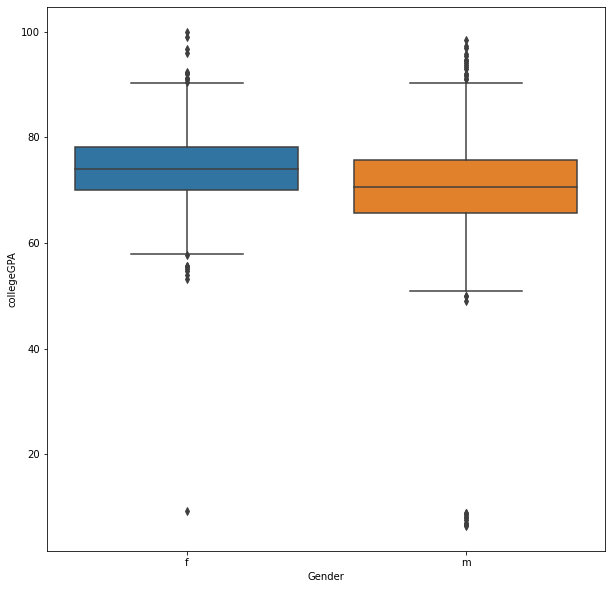

In [179]:
plt.figure(figsize=(10,10))
sns.boxplot(x=data['Gender'],y=data['collegeGPA'])

**Females tend to score better GPA than males**

# Conclusion after analysing College GPA

1. The data is approx. normally disributed but there an outlier present.
2. Median GPA is 71.720000.
3. There's not very strong correlation between GPA and Salary i.e.0.1301025190711257
4. There's vary low chances that if a student scores very good marks in class 10 or 12 will score good marks in college also.
5. Females tend to score better GPA than males

# Analysing CollegeCityTier

In [180]:
data['CollegeCityTier'].describe()

count    3998.000000
mean        0.300400
std         0.458489
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: CollegeCityTier, dtype: float64

In [181]:
data['CollegeCityTier'].head()

0    0
1    0
2    0
3    1
4    0
Name: CollegeCityTier, dtype: int64

In [182]:
data['CollegeCityTier'].value_counts()

0    2797
1    1201
Name: CollegeCityTier, dtype: int64

<AxesSubplot:xlabel='CollegeCityTier', ylabel='count'>

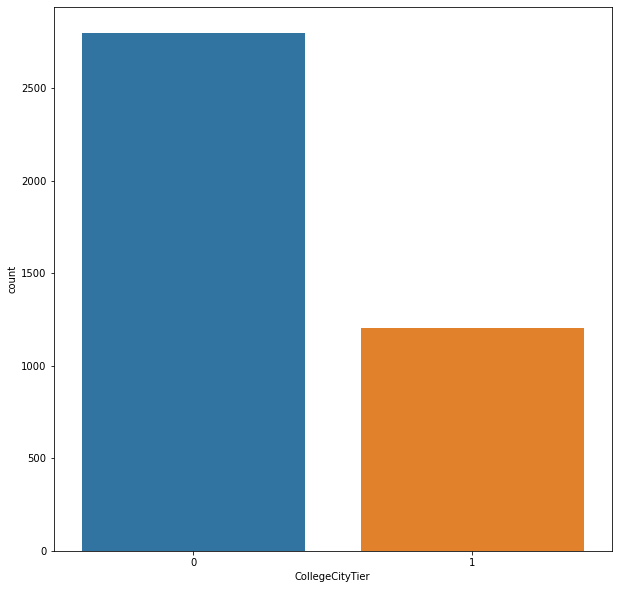

In [183]:
plt.figure(figsize=(10,10))
sns.countplot(x=data['CollegeCityTier'])

**There are two types of colleege tier 1=2792 and tier 0=1201**

# Bivariate Analysis

<AxesSubplot:xlabel='CollegeCityTier', ylabel='Salary'>

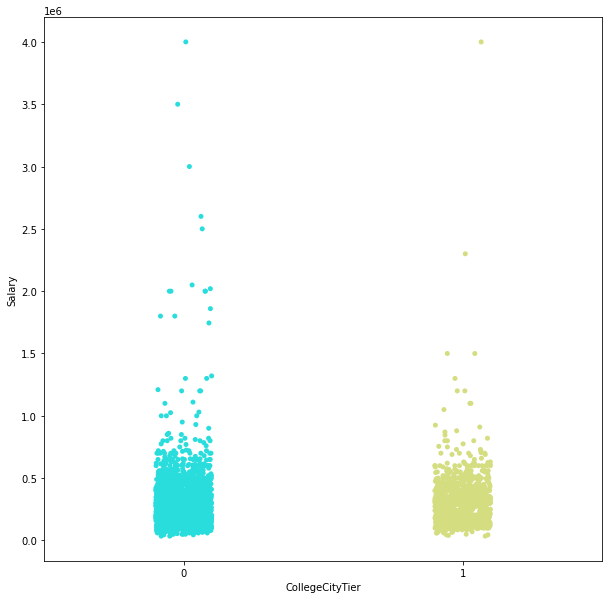

In [187]:
plt.figure(figsize=(10,10))
sns.stripplot(x=data['CollegeCityTier'],y=data['Salary'],jitter=True,palette='rainbow')

**There's not much variation in salary of tier 1 and tier 0**

# Conclusion after Analysing CollegeCityTier

1. There are two types of colleege tier 1=2792 and tier 0=1201.
2. There's not much variation in salary of tier 1 and tier 0.

# Analysing CollegeState

In [193]:
data['CollegeState'].describe()

count              3998
unique               26
top       Uttar Pradesh
freq                915
Name: CollegeState, dtype: object

In [194]:
data['CollegeState'].head()

0    Andhra Pradesh
1    Madhya Pradesh
2     Uttar Pradesh
3             Delhi
4     Uttar Pradesh
Name: CollegeState, dtype: object

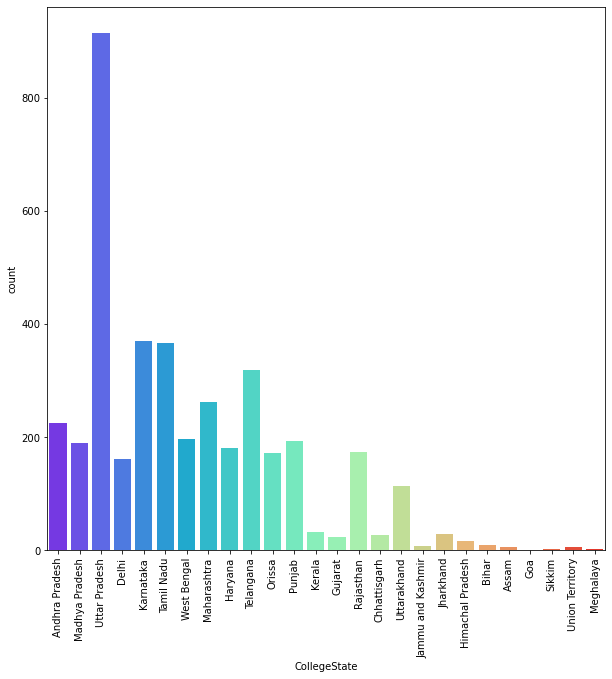

In [196]:
plt.figure(figsize=(10,10))
sns.countplot(x=data['CollegeState'],palette='rainbow')
plt.xticks(rotation=90)
plt.show()

**Maximum colleges are in Uttar Pradesh=915, minimum college is in Goa=1**

In [203]:
(data['CollegeState']=='Goa').value_counts()

False    3997
True        1
Name: CollegeState, dtype: int64

# Conclusion after analysing CollegeState

1. There are 26 different college state, Uttar Pradesh topping with 915 colleges.
2. There's only one college in Goa.

# Analysing GraduationYear

In [206]:
data['GraduationYear'].describe()

count    3998.000000
mean     2012.105803
std        31.857271
min         0.000000
25%      2012.000000
50%      2013.000000
75%      2014.000000
max      2017.000000
Name: GraduationYear, dtype: float64

In [207]:
data['GraduationYear'].value_counts()

2013    1181
2014    1036
2012     847
2011     507
2010     292
2015      94
2009      24
2017       8
2016       7
2007       1
0          1
Name: GraduationYear, dtype: int64

<AxesSubplot:xlabel='GraduationYear', ylabel='count'>

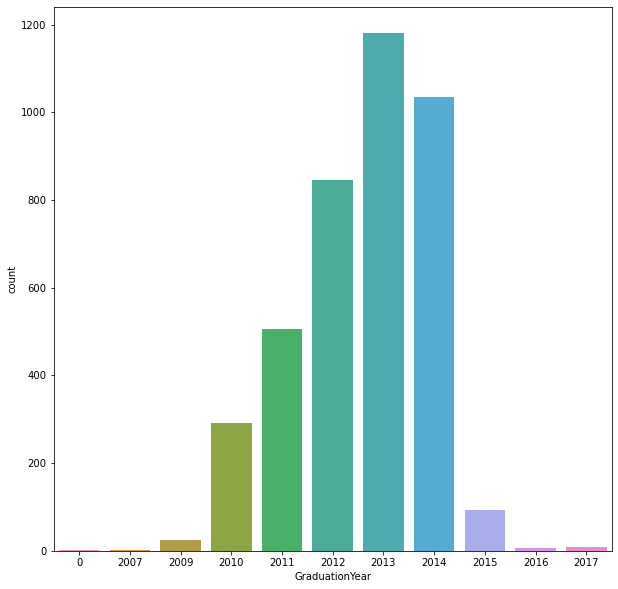

In [208]:
plt.figure(figsize=(10,10))
sns.countplot(x=data['GraduationYear'])

**Most students graduated in 2013 with frequency of 1181 and 1 garbage value is also present in the data represented with 0.**

# Conclusion after analysing GraduationYear

1. Most students graduated in 2013 with frequency of 1181 and 1 garbage value is also present in the data repredented with 0.

# Analysing English

In [211]:
data['English'].describe()

count    3998.000000
mean      501.649075
std       104.940021
min       180.000000
25%       425.000000
50%       500.000000
75%       570.000000
max       875.000000
Name: English, dtype: float64

In [215]:
data['English'].unique().shape

(111,)

In [216]:
data['English'].head()

0    515
1    695
2    615
3    635
4    545
Name: English, dtype: int64

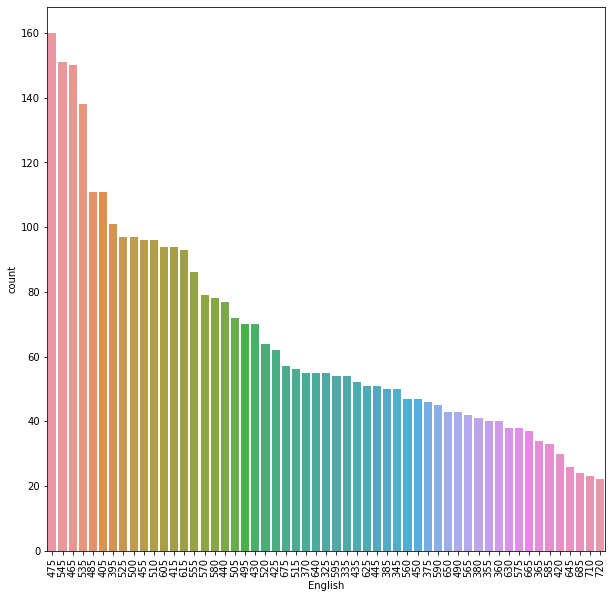

In [219]:
plt.figure(figsize=(10,10))
sns.countplot(x=data['English'],order=data['English'].value_counts().iloc[:55].index)
plt.xticks(rotation=90)
plt.show()

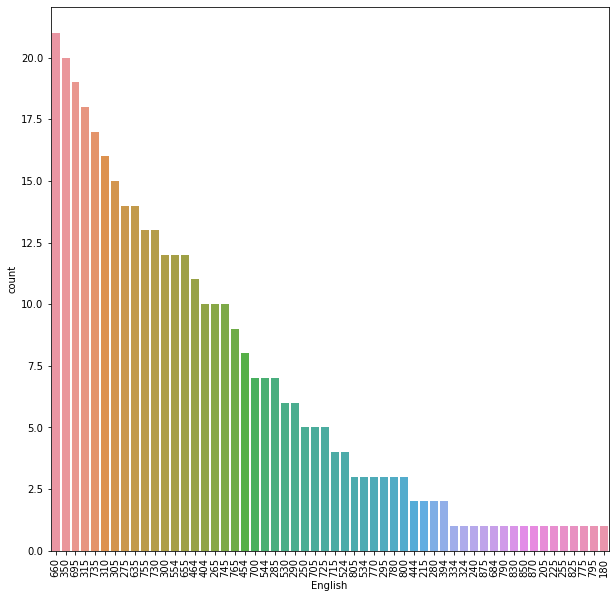

In [220]:
plt.figure(figsize=(10,10))
sns.countplot(x=data['English'],order=data['English'].value_counts().iloc[55:].index)
plt.xticks(rotation=90)
plt.show()

**Maximum students scored 475 marks and minimum students scored 180 marks**

<Figure size 720x720 with 0 Axes>

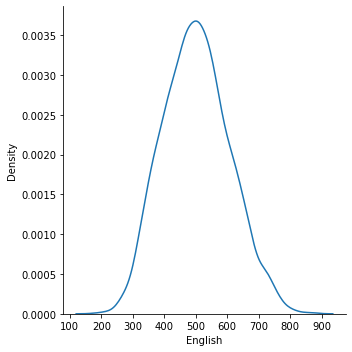

In [223]:
plt.figure(figsize=(10,10))
sns.displot(x=data['English'],kind='kde')

**The English marks are normally distributed**

In [224]:
print("Skewness: ",data['English'].skew())
print("Kurtosis: ",data['English'].kurt())

Skewness:  0.1919970174188361
Kurtosis:  -0.2541325252956774


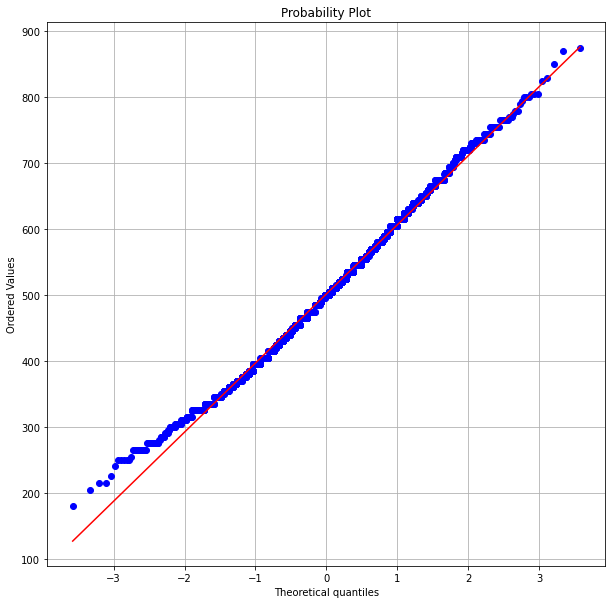

In [226]:
plt.figure(figsize=(10,10))
stats.probplot(data['English'],dist='norm',plot=plt)
plt.grid()

**Data normally distrbuted**

# Bivariate Analysis

<AxesSubplot:xlabel='Gender', ylabel='English'>

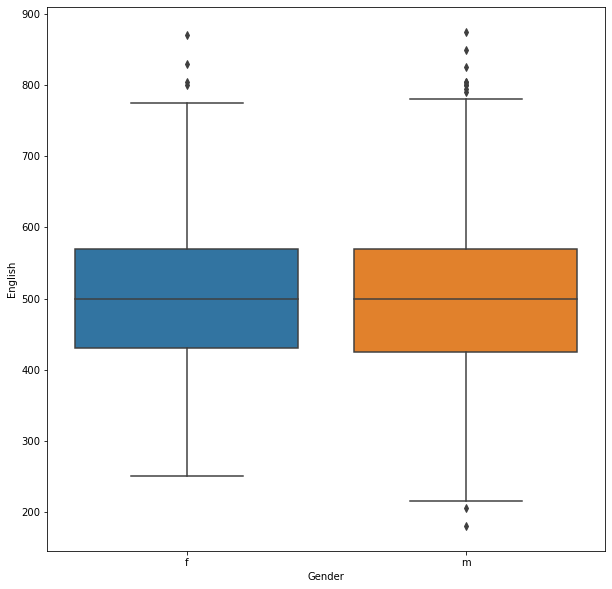

In [229]:
plt.figure(figsize=(10,10))
sns.boxplot(x=data['Gender'],y=data['English'])

**Marks are not gender specific, marks obtained are almost equal for males and females**

<AxesSubplot:xlabel='English', ylabel='collegeGPA'>

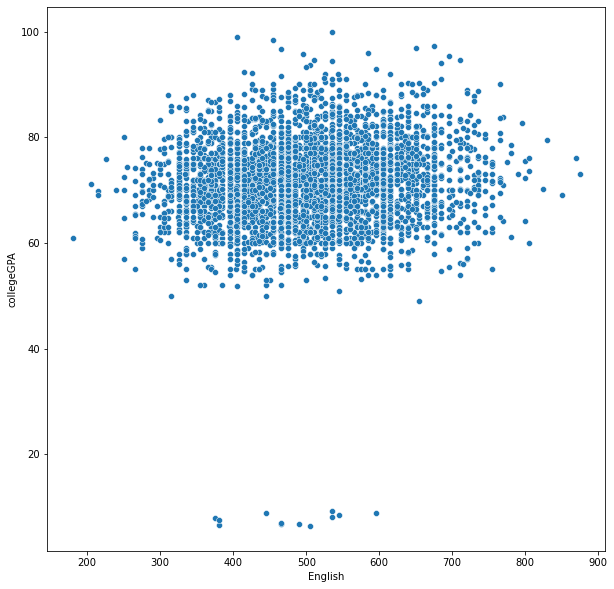

In [240]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=data['English'],y=data['collegeGPA'])

**No co-relation between collegeGPA and English**

In [241]:
data['collegeGPA'].corr(data['English'])

0.10647807375161646

# Conclusion after analysing English

1. Mean and Max marks in english are 501.649075 and 875.
2. Maximum students scored 475 marks and minimum students scored 180 marks.
3. The English marks are normally distributed.
4. The skewness and kurtosis of the data are 0.1919970174188361 and -0.2541325252956774.
5. Marks are not gender specific, marks obtained are almost equal for males and females
6. No co-relation between collegeGPA and English

# Analysing Logical

In [242]:
data['Logical'].describe()

count    3998.000000
mean      501.598799
std        86.783297
min       195.000000
25%       445.000000
50%       505.000000
75%       565.000000
max       795.000000
Name: Logical, dtype: float64

In [244]:
data['Logical'].unique().shape

(107,)

In [245]:
data['Logical'].head()

0    585
1    610
2    545
3    585
4    625
Name: Logical, dtype: int64

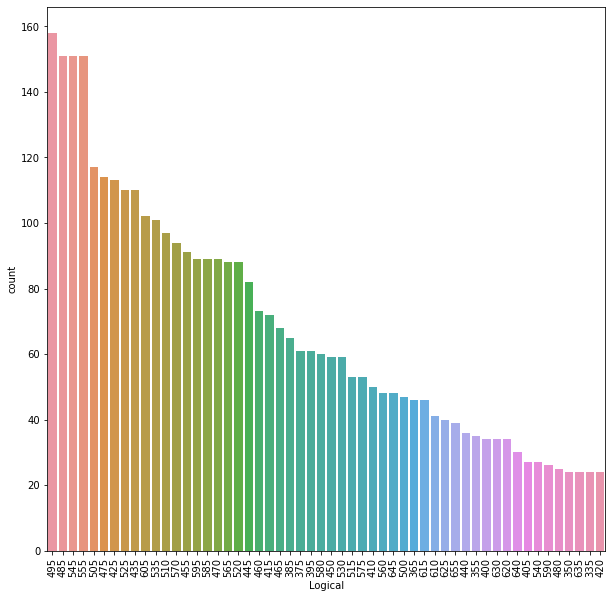

In [247]:
plt.figure(figsize=(10,10))
sns.countplot(x=data['Logical'],order=data['Logical'].value_counts().iloc[:54].index)
plt.xticks(rotation=90)
plt.show()

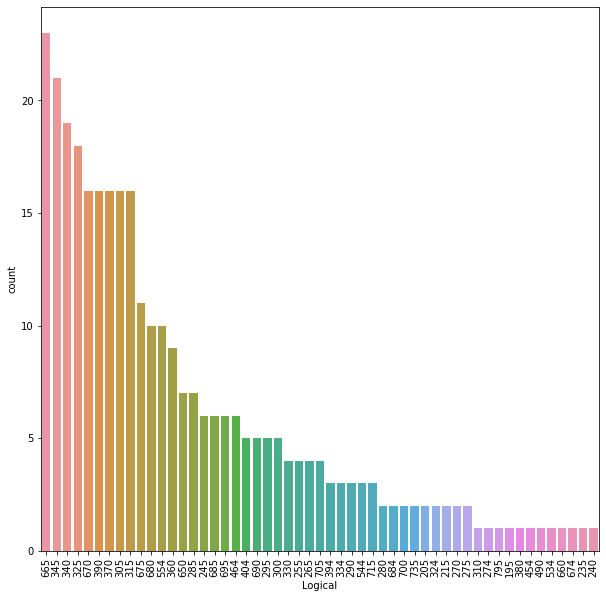

In [246]:
plt.figure(figsize=(10,10))
sns.countplot(x=data['Logical'],order=data['Logical'].value_counts().iloc[54:].index)
plt.xticks(rotation=90)
plt.show()

<Figure size 720x720 with 0 Axes>

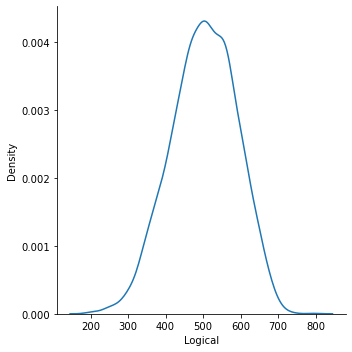

In [264]:
plt.figure(figsize=(10,10))
sns.displot(x=data['Logical'],kind='kde')

**Marks are normally distributed**

# Bivariate Analysis

<AxesSubplot:xlabel='Logical', ylabel='collegeGPA'>

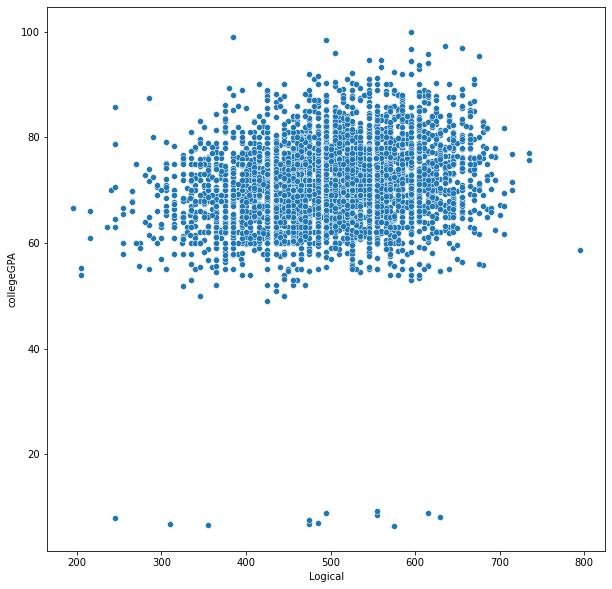

In [272]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=data['Logical'],y=data['collegeGPA'])

**Very less co-relation between logical and collegeGPA**

In [273]:
data['Logical'].corr(data['collegeGPA'])

0.19660982119847978

<AxesSubplot:xlabel='Logical', ylabel='English'>

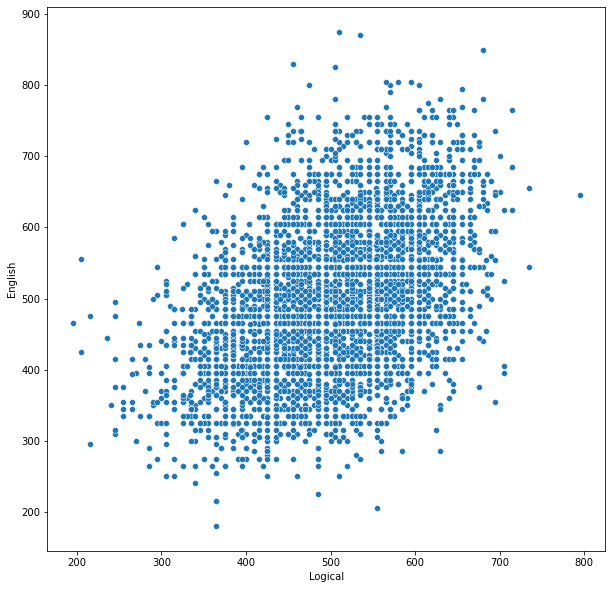

In [293]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=data['Logical'],y=data['English'])

**Very less co-relation between logical and English**

In [294]:
data['Logical'].corr(data['collegeGPA'])

0.19660982119847978

# Conclusion after analysing Logical

1. Maximum students scored 495 marks.
2. Marks are normally distributed.
3. Very less co-relation between logical and collegeGPA

# Analysing Domain

In [275]:
data['Domain'].describe()

count    3998.000000
mean        0.510490
std         0.468671
min        -1.000000
25%         0.342315
50%         0.622643
75%         0.842248
max         0.999910
Name: Domain, dtype: float64

In [277]:
data['Domain'].unique().shape

(243,)

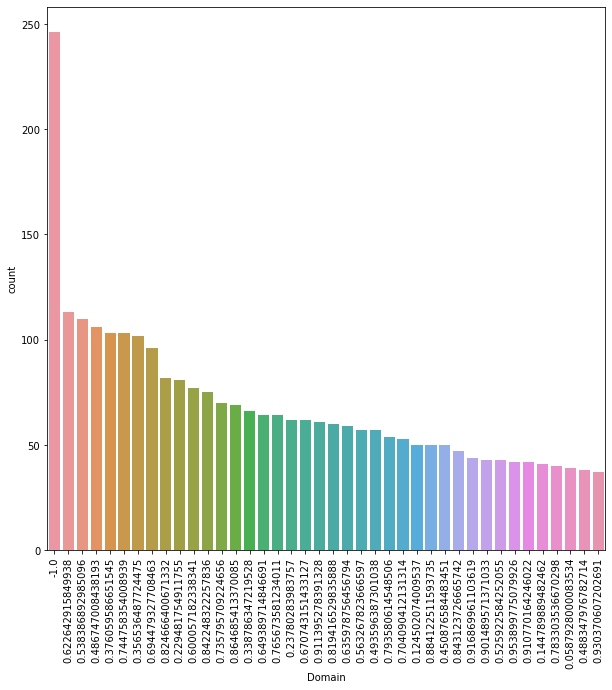

In [280]:
plt.figure(figsize=(10,10))
sns.countplot(x=data['Domain'],order=data['Domain'].value_counts().iloc[:40].index)
plt.xticks(rotation=90)
plt.show()

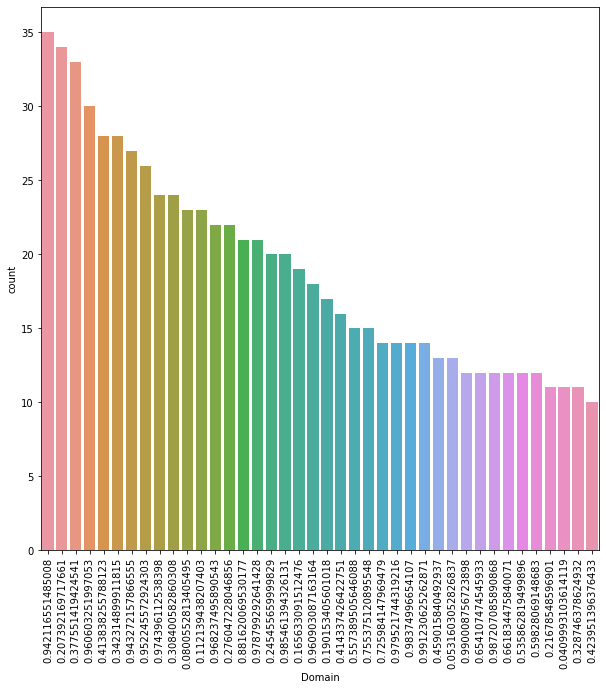

In [282]:
plt.figure(figsize=(10,10))
sns.countplot(x=data['Domain'],order=data['Domain'].value_counts().iloc[40:80].index)
plt.xticks(rotation=90)
plt.show()

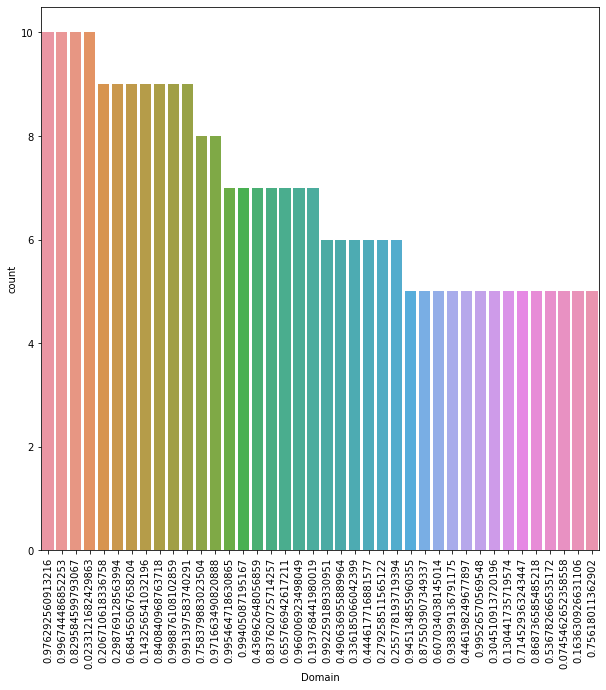

In [283]:
plt.figure(figsize=(10,10))
sns.countplot(x=data['Domain'],order=data['Domain'].value_counts().iloc[80:120].index)
plt.xticks(rotation=90)
plt.show()

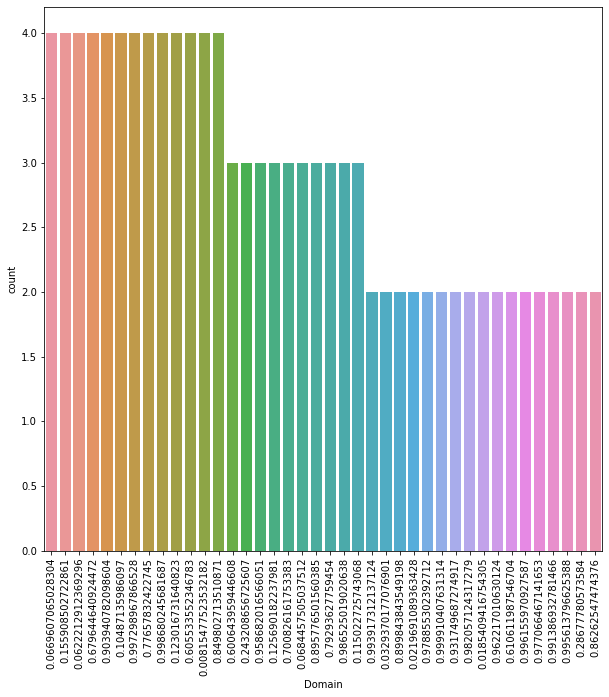

In [284]:
plt.figure(figsize=(10,10))
sns.countplot(x=data['Domain'],order=data['Domain'].value_counts().iloc[120:160].index)
plt.xticks(rotation=90)
plt.show()

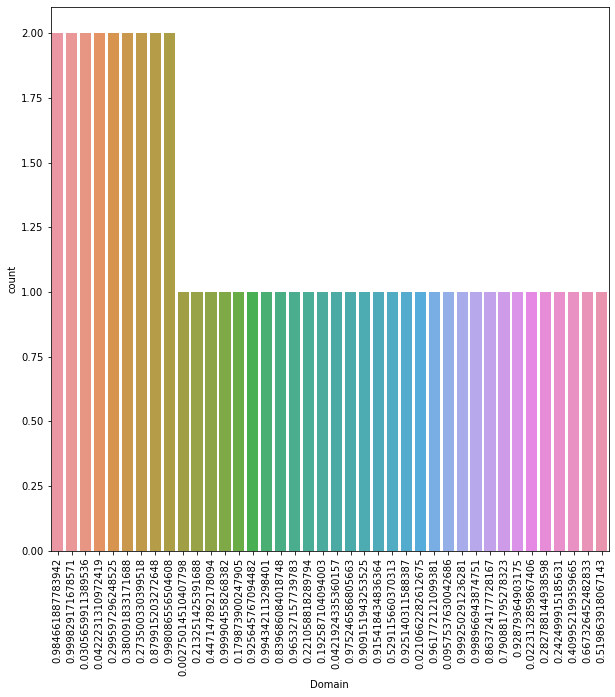

In [285]:
plt.figure(figsize=(10,10))
sns.countplot(x=data['Domain'],order=data['Domain'].value_counts().iloc[160:200].index)
plt.xticks(rotation=90)
plt.show()

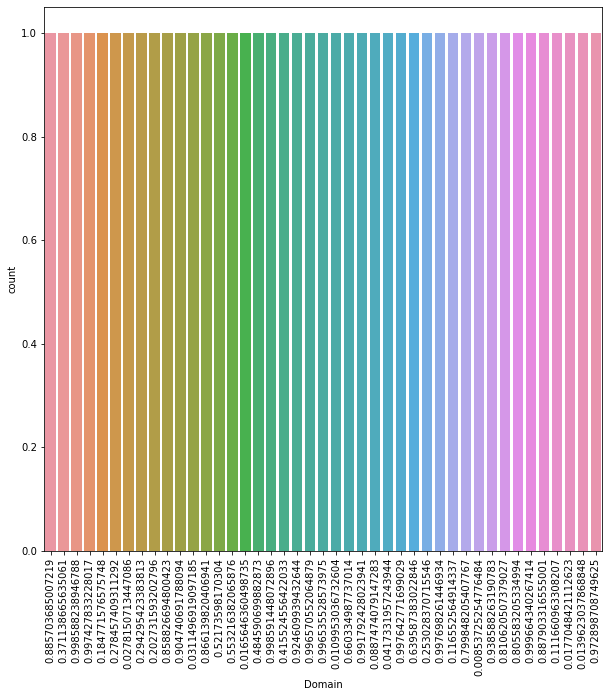

In [286]:
plt.figure(figsize=(10,10))
sns.countplot(x=data['Domain'],order=data['Domain'].value_counts().iloc[200:].index)
plt.xticks(rotation=90)
plt.show()

<Figure size 720x720 with 0 Axes>

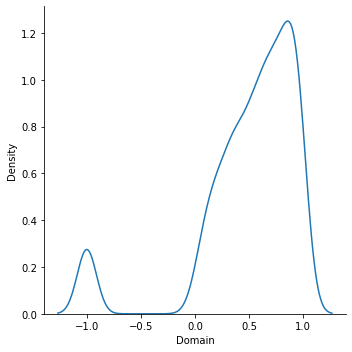

In [287]:
plt.figure(figsize=(10,10))
sns.displot(x=data['Domain'],kind='kde')

<AxesSubplot:xlabel='Domain', ylabel='Logical'>

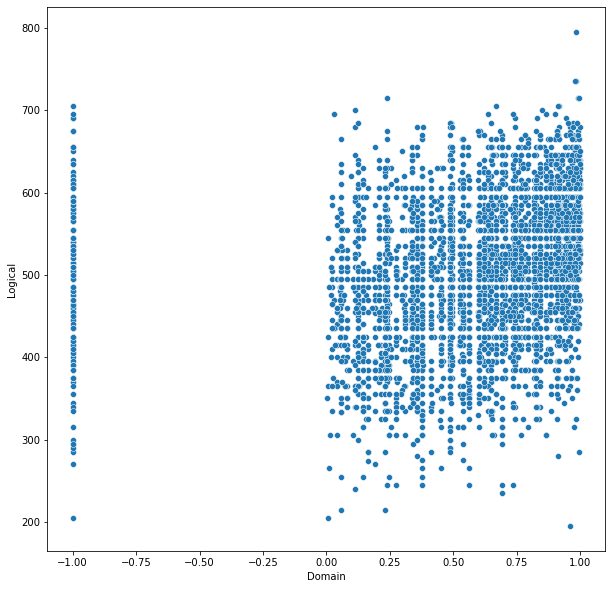

In [296]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=data['Domain'],y=data['Logical'])

<AxesSubplot:xlabel='Domain', ylabel='English'>

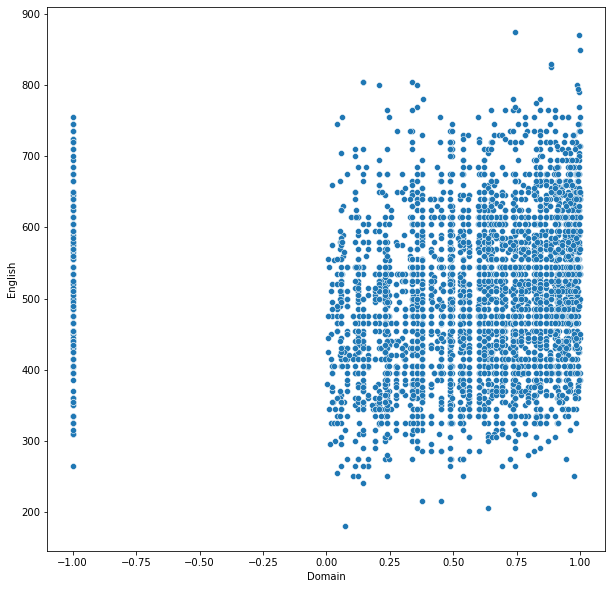

In [297]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=data['Domain'],y=data['English'])

<AxesSubplot:xlabel='Domain', ylabel='Quant'>

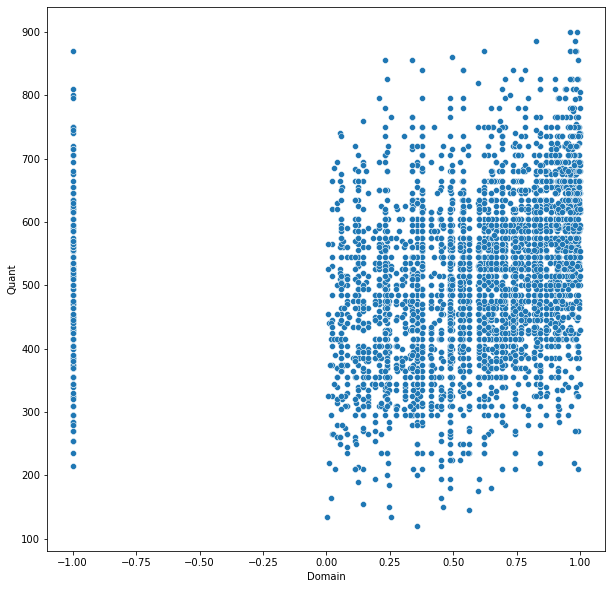

In [298]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=data['Domain'],y=data['Quant'])

# Conclusion after analysing Domain

1. Maximum students scored 0.9846
2. No co-relation beween domain and logical,english,quant

# Analysing ComputerProgramming

In [288]:
data['ComputerProgramming'].describe()

count    3998.000000
mean      353.102801
std       205.355519
min        -1.000000
25%       295.000000
50%       415.000000
75%       495.000000
max       840.000000
Name: ComputerProgramming, dtype: float64

In [289]:
data['ComputerProgramming'].head()

0    445
1     -1
2    395
3    615
4     -1
Name: ComputerProgramming, dtype: int64

In [292]:
data['ComputerProgramming'].unique().shape

(79,)

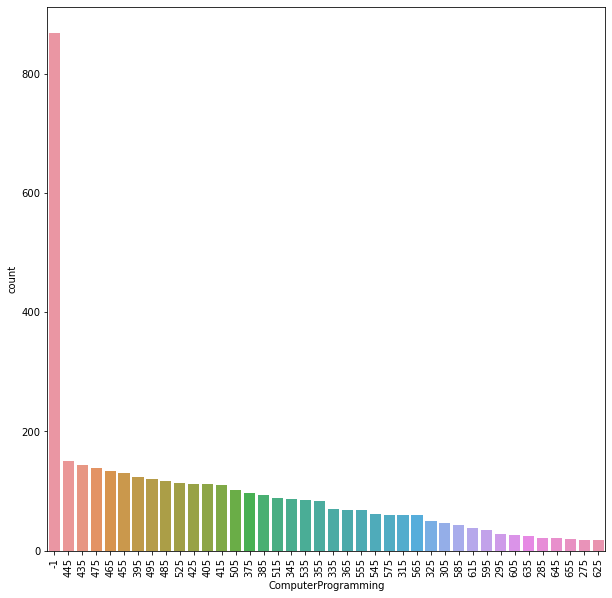

In [300]:
plt.figure(figsize=(10,10))
sns.countplot(x=data['ComputerProgramming'],order=data['ComputerProgramming'].value_counts().iloc[:40].index)
plt.xticks(rotation=90)
plt.show()

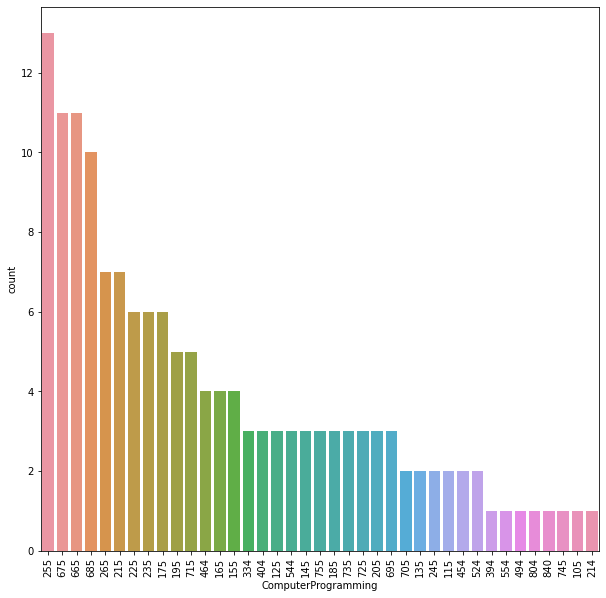

In [301]:
plt.figure(figsize=(10,10))
sns.countplot(x=data['ComputerProgramming'],order=data['ComputerProgramming'].value_counts().iloc[40:].index)
plt.xticks(rotation=90)
plt.show()

**Most students scored -1 marks and maximum marks scored is 840.**

# Bivariate Analysis

<AxesSubplot:xlabel='ComputerProgramming', ylabel='English'>

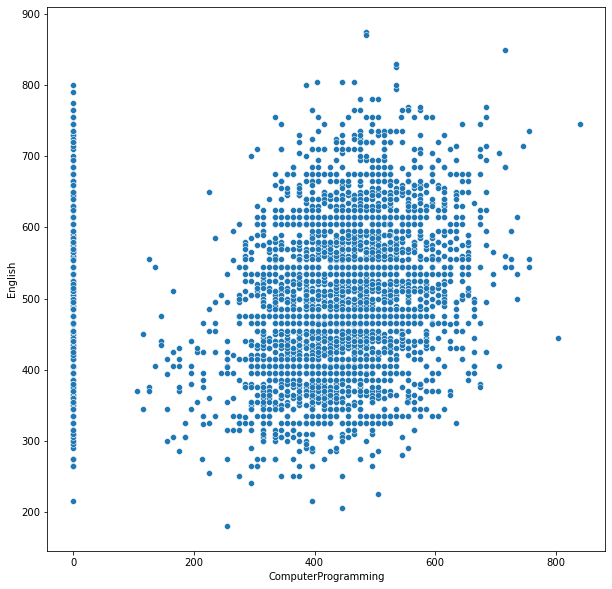

In [302]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=data['ComputerProgramming'],y=data['English'])

In [303]:
data['ComputerProgramming'].corr(data['English'])

0.12500519233673335

<AxesSubplot:xlabel='ComputerProgramming', ylabel='Logical'>

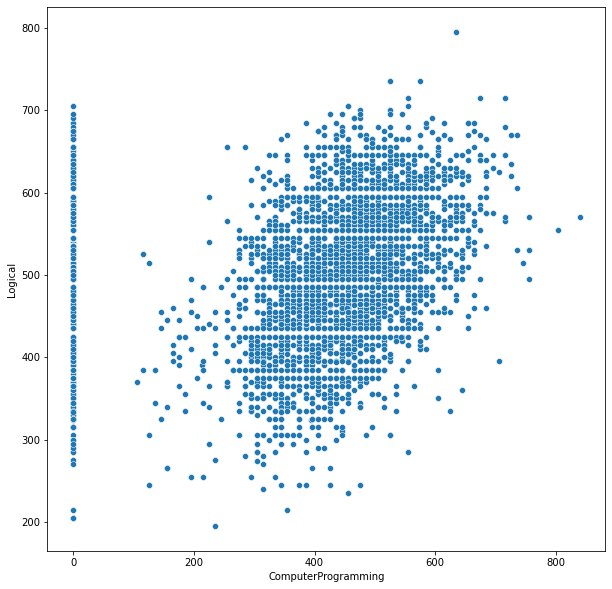

In [304]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=data['ComputerProgramming'],y=data['Logical'])

In [305]:
data['ComputerProgramming'].corr(data['Logical'])

0.1839049386651653

<AxesSubplot:xlabel='ComputerProgramming', ylabel='Domain'>

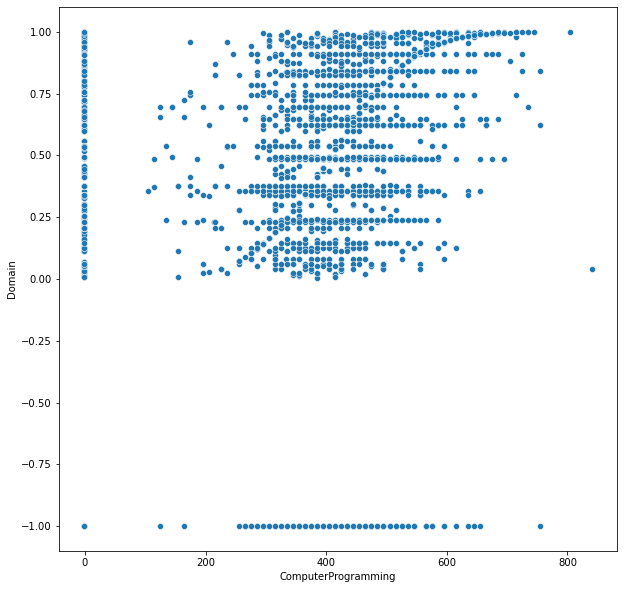

In [306]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=data['ComputerProgramming'],y=data['Domain'])

In [307]:
data['ComputerProgramming'].corr(data['Domain'])

0.3061603833314139

<AxesSubplot:xlabel='ComputerProgramming', ylabel='Quant'>

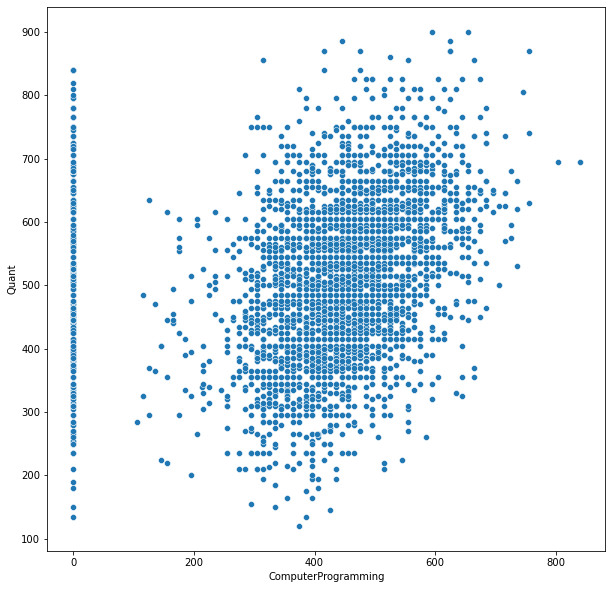

In [310]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=data['ComputerProgramming'],y=data['Quant'])

In [309]:
data['ComputerProgramming'].corr(data['Quant'])

0.14603484648663528

# Conclusion after analysing Computer Programming

1. Most students scored -1 marks.
2. maximum marks scored is 840.
3. There's no co-relation between Computer Programming and English, Logical, Quant, Domain

# Analysing Electrical and Semicon

In [311]:
data['ElectronicsAndSemicon'].describe()

count    3998.000000
mean       95.328414
std       158.241218
min        -1.000000
25%        -1.000000
50%        -1.000000
75%       233.000000
max       612.000000
Name: ElectronicsAndSemicon, dtype: float64

In [312]:
data['ElectronicsAndSemicon'].unique().shape

(29,)

In [313]:
data['ElectronicsAndSemicon'].head()

0     -1
1    466
2     -1
3     -1
4    233
Name: ElectronicsAndSemicon, dtype: int64

<AxesSubplot:ylabel='ElectronicsAndSemicon'>

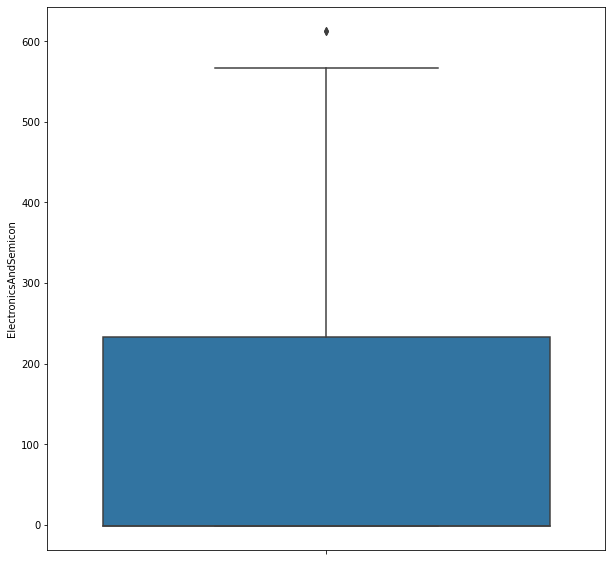

In [316]:
plt.figure(figsize=(10,10))
sns.boxplot(y=data['ElectronicsAndSemicon'])

<AxesSubplot:xlabel='ElectronicsAndSemicon', ylabel='count'>

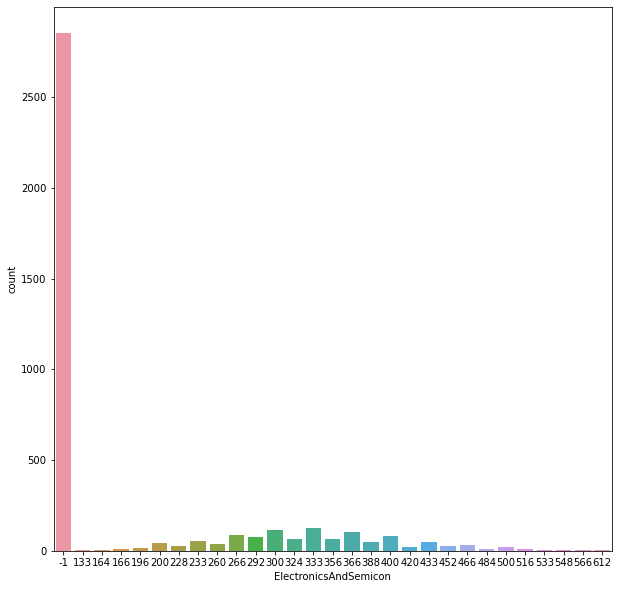

In [317]:
plt.figure(figsize=(10,10))
sns.countplot(x=data['ElectronicsAndSemicon'])

**Maximum students scored -1 and maximum maks is scored by 2 students i.e. 612**

In [321]:
(data['ElectronicsAndSemicon']==612).value_counts()

False    3996
True        2
Name: ElectronicsAndSemicon, dtype: int64

# Bivariate Analysis

<AxesSubplot:xlabel='ElectronicsAndSemicon', ylabel='English'>

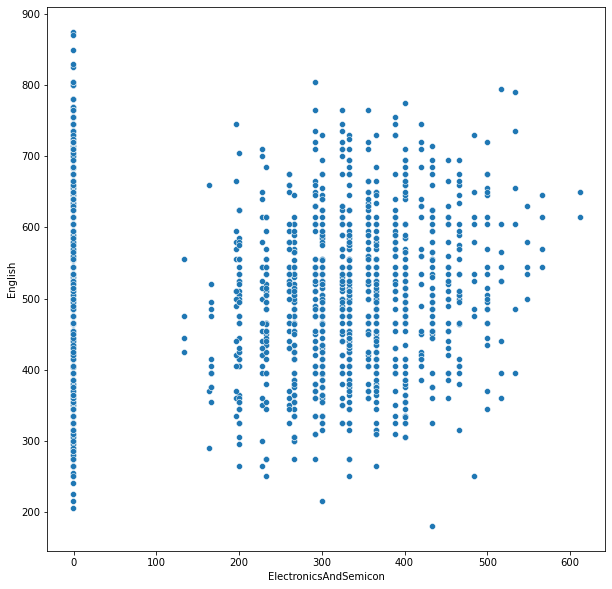

In [322]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=data['ElectronicsAndSemicon'],y=data['English'])

In [323]:
data['ElectronicsAndSemicon'].corr(data['English'])

0.018591278411741928

<AxesSubplot:xlabel='ElectronicsAndSemicon', ylabel='Logical'>

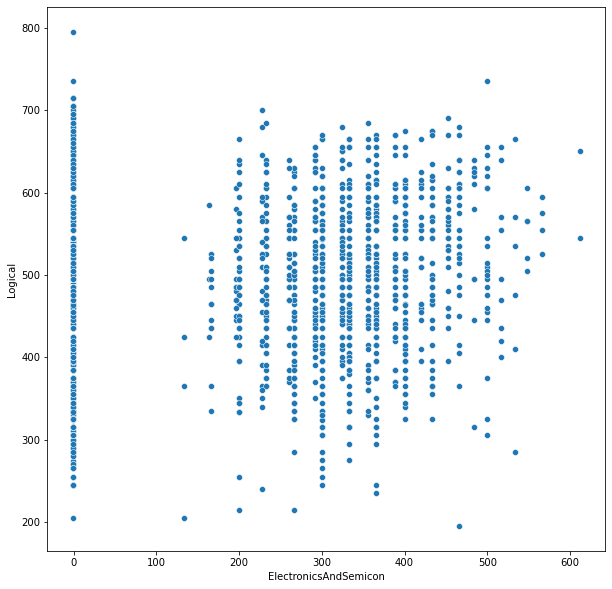

In [324]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=data['ElectronicsAndSemicon'],y=data['Logical'])

In [325]:
data['ElectronicsAndSemicon'].corr(data['Logical'])

-0.009994159533556741

<AxesSubplot:xlabel='ElectronicsAndSemicon', ylabel='Quant'>

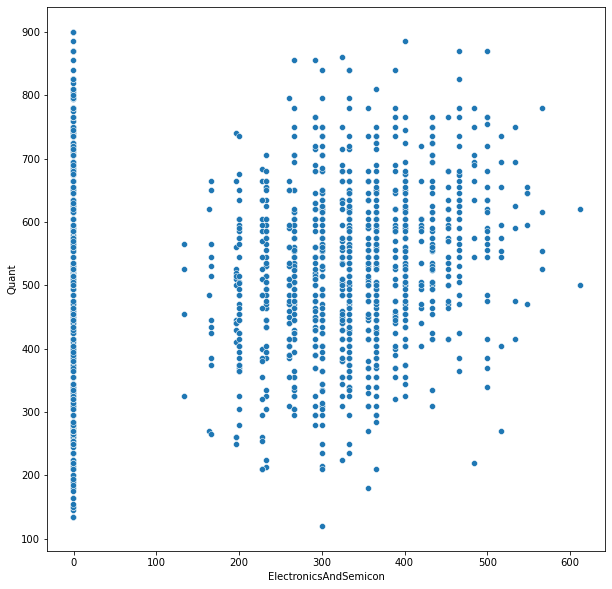

In [326]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=data['ElectronicsAndSemicon'],y=data['Quant'])

In [327]:
data['ElectronicsAndSemicon'].corr(data['Quant'])

0.10422070093263092

<AxesSubplot:xlabel='ElectronicsAndSemicon', ylabel='Domain'>

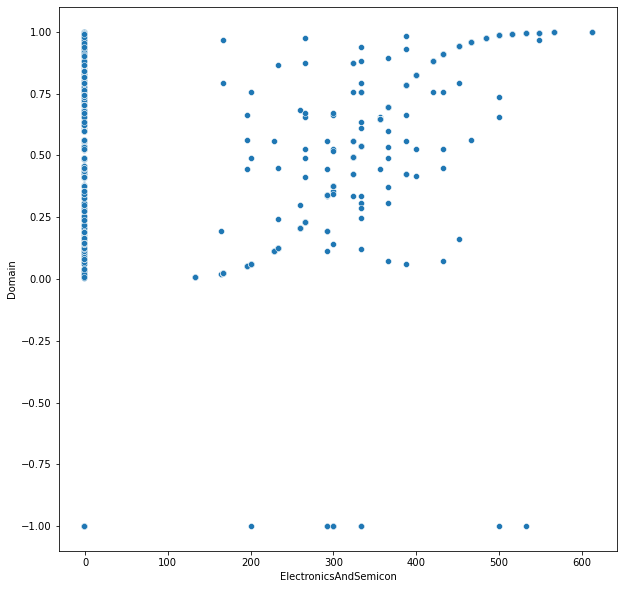

In [328]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=data['ElectronicsAndSemicon'],y=data['Domain'])

In [329]:
data['ElectronicsAndSemicon'].corr(data['Domain'])

0.09058733186836652

<AxesSubplot:xlabel='ElectronicsAndSemicon', ylabel='ComputerProgramming'>

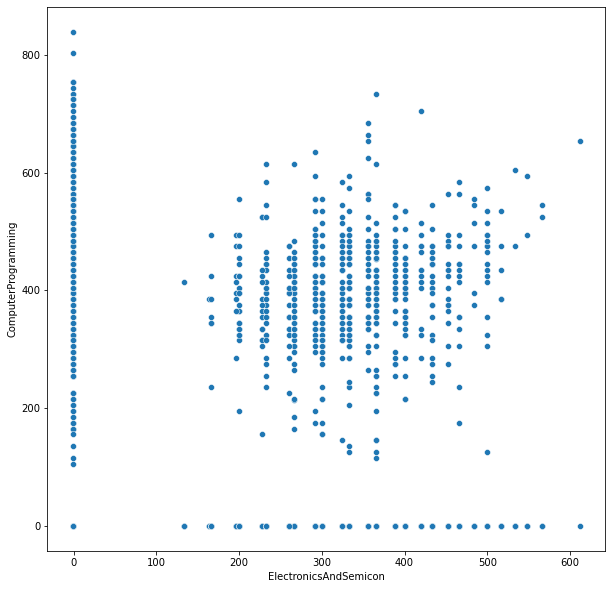

In [330]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=data['ElectronicsAndSemicon'],y=data['ComputerProgramming'])

In [331]:
data['ElectronicsAndSemicon'].corr(data['ComputerProgramming'])

-0.3695604893486694

# Conclusion after analysing Electronic and Semicon

1. Mean and median score is -1.
2. Maximum score is 612.
3. Maximum students scored -1.
4. 2 students scored maximim marks i.e. 612
5. No co-relation between ElectronicAndSemicon and english, logic, quant, domain, computerProgramming

# Analysing ComputerScience

In [332]:
data['ComputerScience'].describe()

count    3998.000000
mean       90.742371
std       175.273083
min        -1.000000
25%        -1.000000
50%        -1.000000
75%        -1.000000
max       715.000000
Name: ComputerScience, dtype: float64

In [333]:
data['ComputerScience'].unique().shape

(20,)

In [334]:
data['ComputerScience'].head()

0   -1
1   -1
2   -1
3   -1
4   -1
Name: ComputerScience, dtype: int64

<AxesSubplot:ylabel='ComputerScience'>

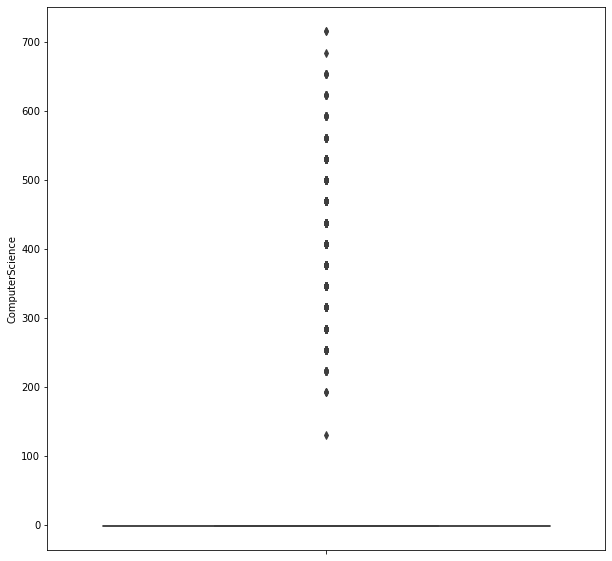

In [337]:
plt.figure(figsize=(10,10))
sns.boxplot(y=data['ComputerScience'])

**Mean and median marks are -1 and maximum marks scored is 715.**

<AxesSubplot:xlabel='ComputerScience', ylabel='count'>

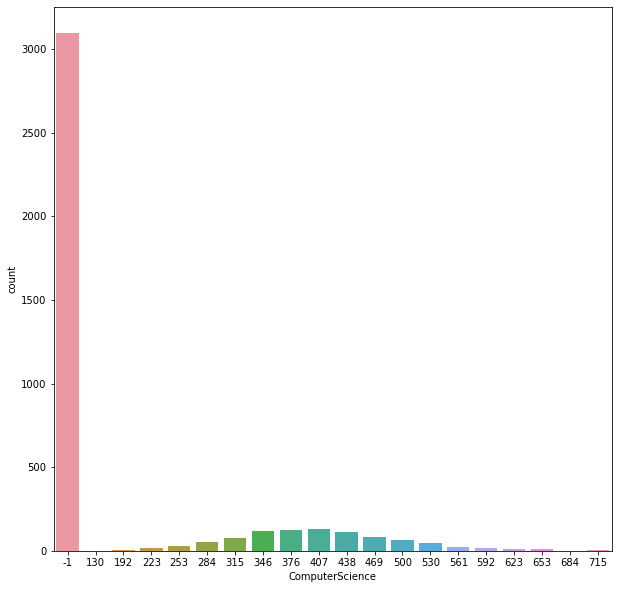

In [338]:
plt.figure(figsize=(10,10))
sns.countplot(x=data['ComputerScience'])

**Maximum marks i.e. 715 is scored by 2 students**

In [340]:
(data['ComputerScience']==715).value_counts()

False    3996
True        2
Name: ComputerScience, dtype: int64

# Bivariate Analysis

<AxesSubplot:xlabel='ComputerScience', ylabel='English'>

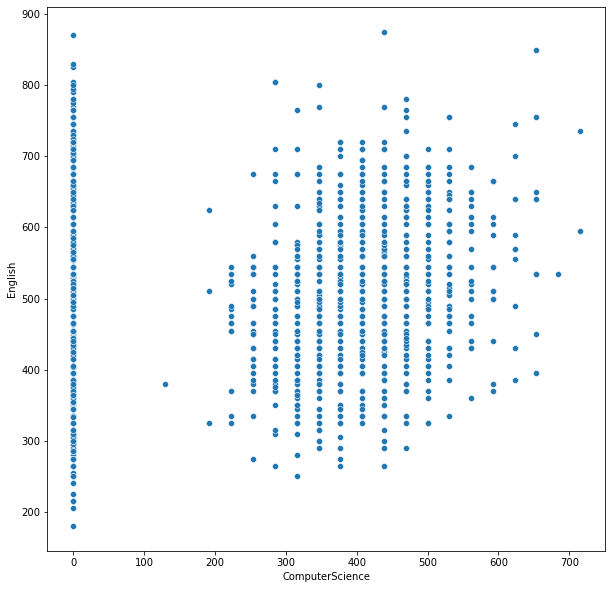

In [341]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=data['ComputerScience'],y=data['English'])

In [342]:
data['ComputerScience'].corr(data['English'])

0.059499706345097964

<AxesSubplot:xlabel='ComputerScience', ylabel='Logical'>

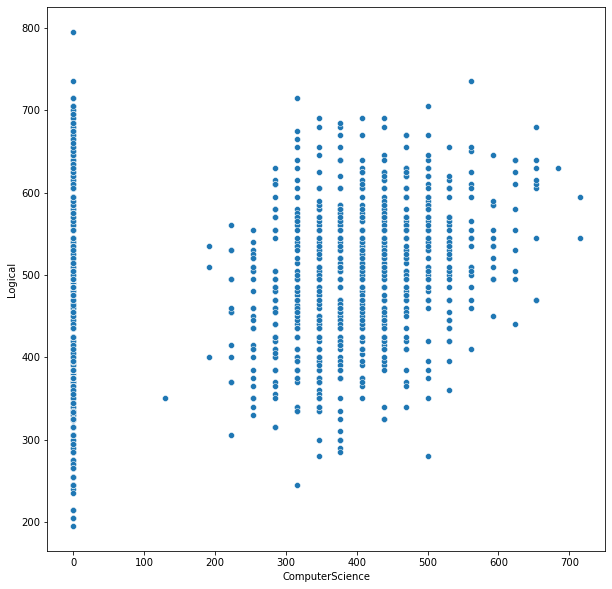

In [343]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=data['ComputerScience'],y=data['Logical'])

In [344]:
data['ComputerScience'].corr(data['Logical'])

0.04448128659249448

<AxesSubplot:xlabel='ComputerScience', ylabel='Quant'>

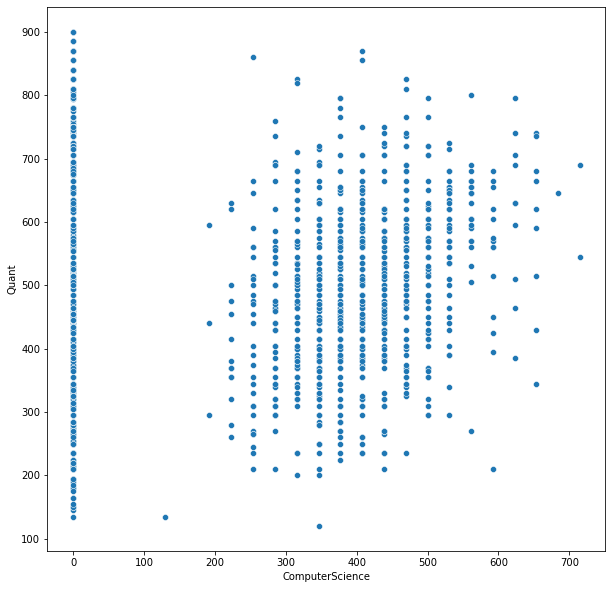

In [345]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=data['ComputerScience'],y=data['Quant'])

In [346]:
data['ComputerScience'].corr(data['Quant'])

-0.043378660464956004

<AxesSubplot:xlabel='ComputerScience', ylabel='Domain'>

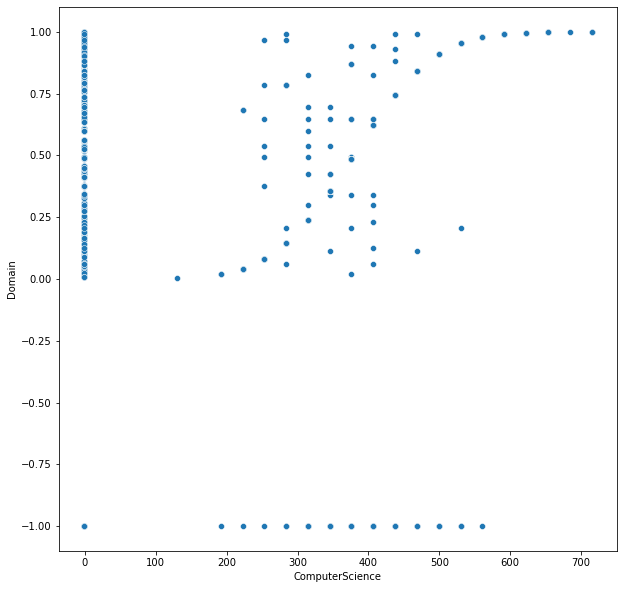

In [347]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=data['ComputerScience'],y=data['Domain'])

In [348]:
data['ComputerScience'].corr(data['Domain'])

0.05876215222397706

<AxesSubplot:xlabel='ComputerScience', ylabel='ComputerProgramming'>

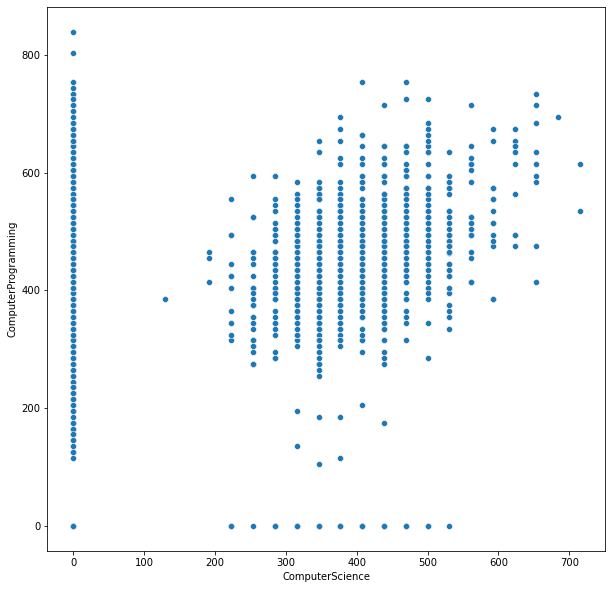

In [349]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=data['ComputerScience'],y=data['ComputerProgramming'])

<AxesSubplot:xlabel='ComputerScience', ylabel='ElectronicsAndSemicon'>

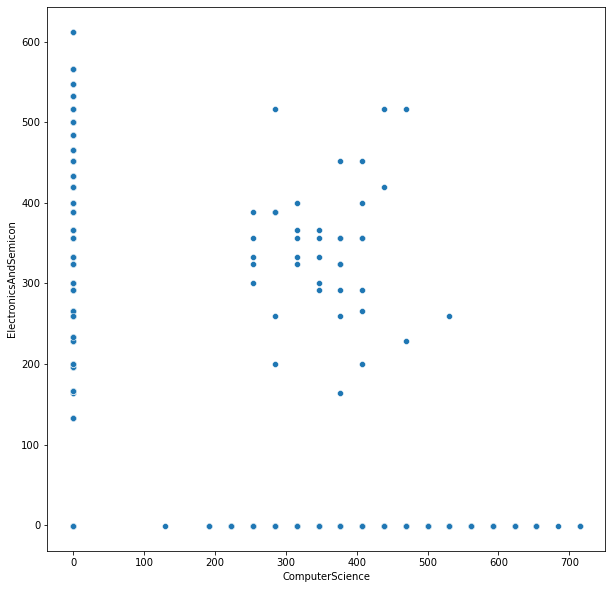

In [350]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=data['ComputerScience'],y=data['ElectronicsAndSemicon'])

In [351]:
data['ComputerScience'].corr(data['ElectronicsAndSemicon'])

-0.2737065280708213

# Conclusion after analysing ComputerScience

1. Mean and median marks are 90.742371 and -1.
2. Maximum marks scored is 715.
3. Maximum marks i.e. 715 is scored by 2 students
4. There's no co-relation between marks in any subjects of Amcat Test

# Analysing MechanicalEngg

In [353]:
data['MechanicalEngg'].describe()

count    3998.000000
mean       22.974737
std        98.123311
min        -1.000000
25%        -1.000000
50%        -1.000000
75%        -1.000000
max       623.000000
Name: MechanicalEngg, dtype: float64

In [354]:
data['MechanicalEngg'].unique().shape

(42,)

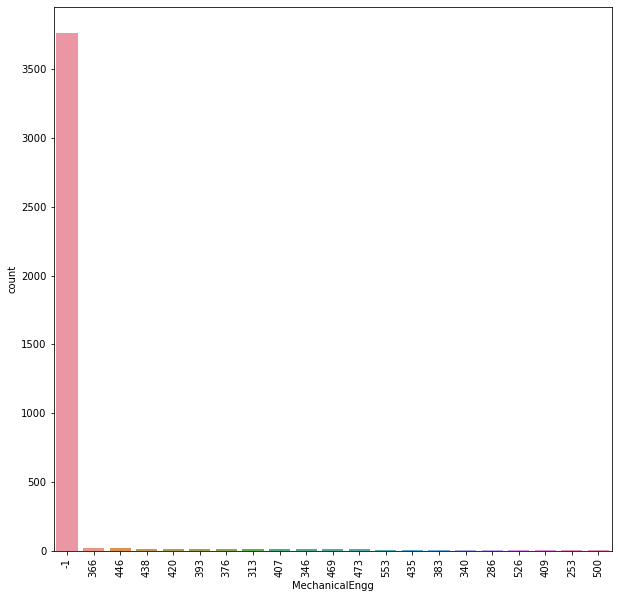

In [356]:
plt.figure(figsize=(10,10))
sns.countplot(x=data['MechanicalEngg'],order=data['MechanicalEngg'].value_counts().iloc[:21].index)
plt.xticks(rotation=90)
plt.show()

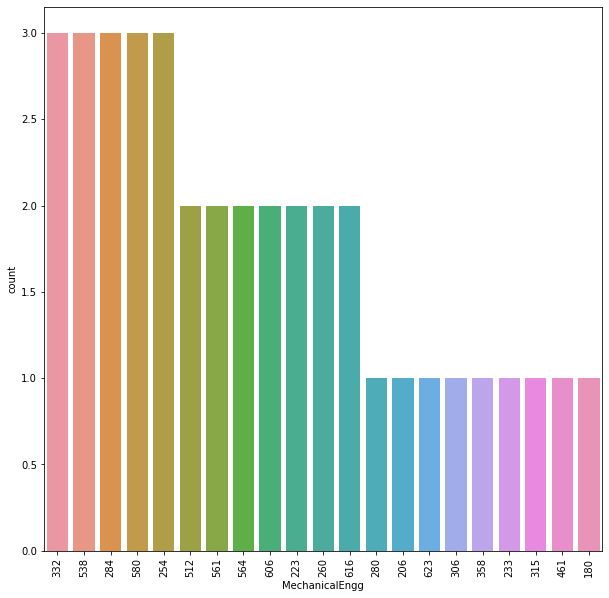

In [357]:
plt.figure(figsize=(10,10))
sns.countplot(x=data['MechanicalEngg'],order=data['MechanicalEngg'].value_counts().iloc[21:].index)
plt.xticks(rotation=90)
plt.show()

In [362]:
(data['MechanicalEngg'].max())

623

In [363]:
(data['MechanicalEngg']==623).value_counts()

False    3997
True        1
Name: MechanicalEngg, dtype: int64

# Conclusion after analysing MechanicalEngg

1. Mean and median marks are 22.97 and -1
2. Maximum marks i.e. 623 is scored by 1 student

# Analysing ElectricalEngg  

In [364]:
data['ElectricalEngg'].describe()

count    3998.000000
mean       16.478739
std        87.585634
min        -1.000000
25%        -1.000000
50%        -1.000000
75%        -1.000000
max       676.000000
Name: ElectricalEngg, dtype: float64

In [366]:
data['ElectricalEngg'].unique().shape

(31,)

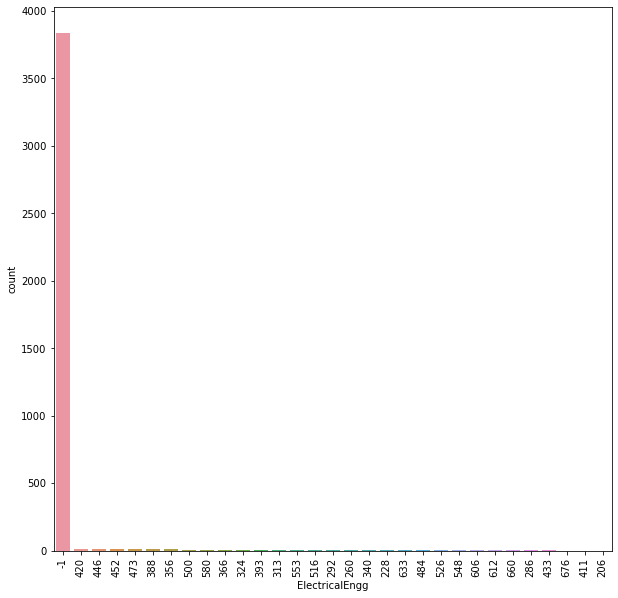

In [367]:
plt.figure(figsize=(10,10))
sns.countplot(x=data['ElectricalEngg'],order=data['ElectricalEngg'].value_counts().iloc[:].index)
plt.xticks(rotation=90)
plt.show()

In [369]:
data['ElectricalEngg'].max()

676

In [370]:
(data['ElectricalEngg']==676).value_counts()

False    3997
True        1
Name: ElectricalEngg, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='ElectricalEngg'>

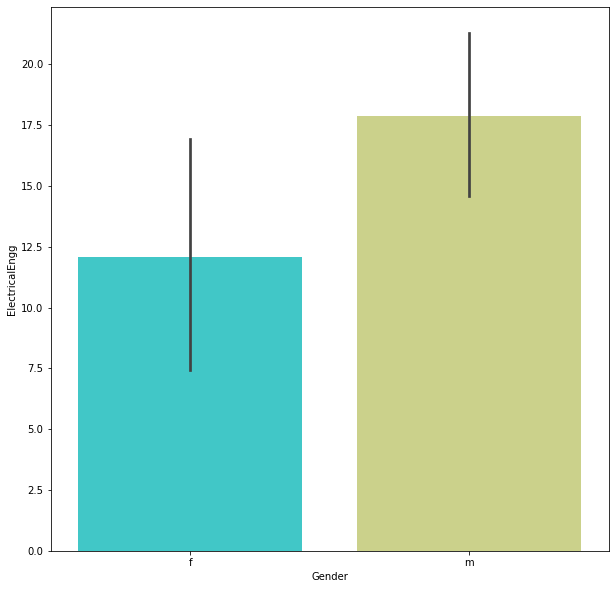

In [377]:
plt.figure(figsize=(10,10))
sns.barplot(x=data['Gender'],y=data['ElectricalEngg'],palette='rainbow')

# Conclusion after analysing ElectricalEngg

1. Mean and median score are 16.478739 and -1.
2. Maximum student scored -1.
3. Only one student scored maximum marks i.e. 676
4. Male scored better in examination.

# Analysing TelecomEngg

In [374]:
data['TelecomEngg'].describe()

count    3998.000000
mean       31.851176
std       104.852845
min        -1.000000
25%        -1.000000
50%        -1.000000
75%        -1.000000
max       548.000000
Name: TelecomEngg, dtype: float64

In [376]:
data['TelecomEngg'].unique().shape

(26,)

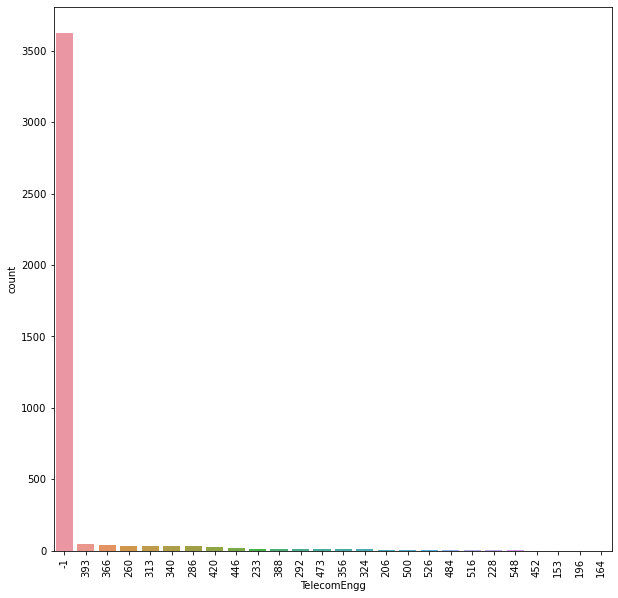

In [378]:
plt.figure(figsize=(10,10))
sns.countplot(x=data['TelecomEngg'],order=data['TelecomEngg'].value_counts().iloc[:].index)
plt.xticks(rotation=90)
plt.show()

In [379]:
data['TelecomEngg'].max()

548

In [380]:
(data['TelecomEngg']==548).value_counts()

False    3996
True        2
Name: TelecomEngg, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='TelecomEngg'>

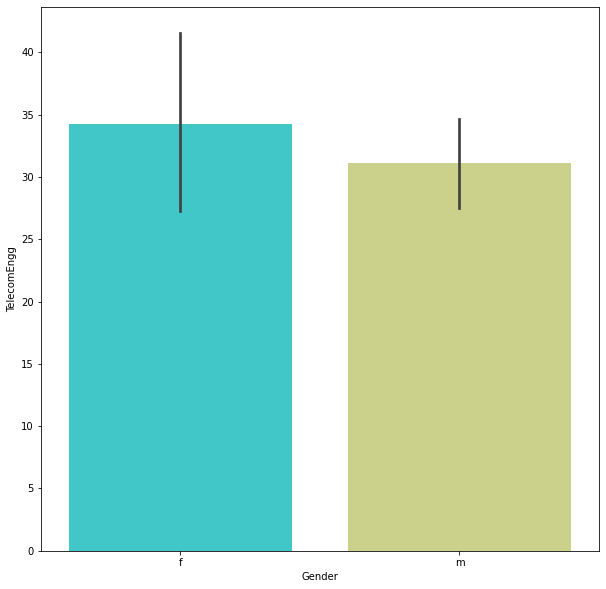

In [381]:
plt.figure(figsize=(10,10))
sns.barplot(x=data['Gender'],y=data['TelecomEngg'],palette='rainbow')

**Females scored better than males in TelecomEngg**

# Conclusion after analysing TelecomEngg

1. Mean and median marks are 31.851176 and -1
2. Maximum students scored -1.
3. Maximum marks is scored i.e. 548 is scored by 2 students.
4. Females scored better than males in TelecomEngg.

# Analysing CivilEngg

In [382]:
data['CivilEngg'].describe()

count    3998.000000
mean        2.683842
std        36.658505
min        -1.000000
25%        -1.000000
50%        -1.000000
75%        -1.000000
max       516.000000
Name: CivilEngg, dtype: float64

In [384]:
data['CivilEngg'].unique().shape

(23,)

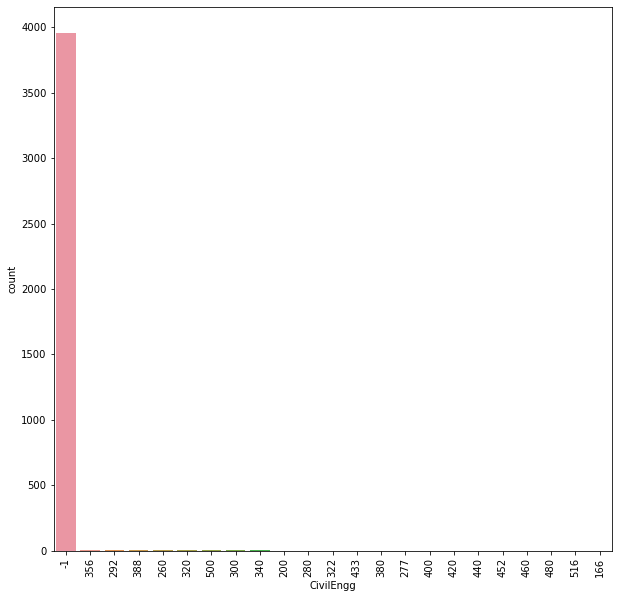

In [385]:
plt.figure(figsize=(10,10))
sns.countplot(x=data['CivilEngg'],order=data['CivilEngg'].value_counts().iloc[:].index)
plt.xticks(rotation=90)
plt.show()

**Maximum marks i.e. 516 is scored by 1 student**

In [386]:
data['CivilEngg'].max()

516

In [387]:
(data['CivilEngg']==516).value_counts()

False    3997
True        1
Name: CivilEngg, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='CivilEngg'>

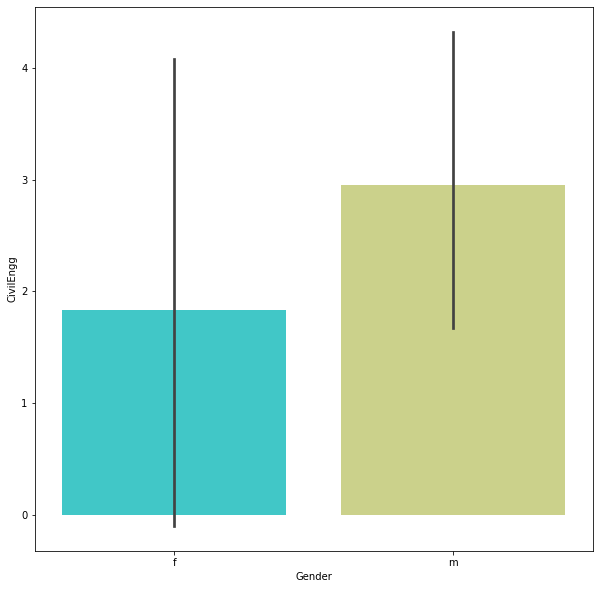

In [388]:
plt.figure(figsize=(10,10))
sns.barplot(x=data['Gender'],y=data['CivilEngg'],palette='rainbow')

# Conclusion after analysing CivilEngg

1. Mean and median marks are  2.683842 and -1.
2. Maximum students scored -1.
3. Maximum marks i.e. 516 is scored by 1 student.
4. Male scored better than female in CivilEngg

# Analysing conscientiousness

In [389]:
data['conscientiousness'].describe()

count    3998.000000
mean       -0.037831
std         1.028666
min        -4.126700
25%        -0.713525
50%         0.046400
75%         0.702700
max         1.995300
Name: conscientiousness, dtype: float64

In [390]:
data['conscientiousness'].unique().shape

(141,)

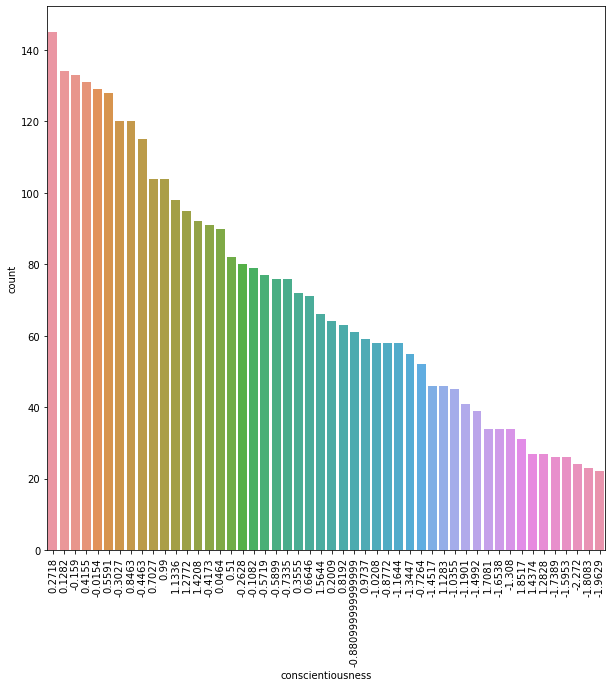

In [391]:
plt.figure(figsize=(10,10))
sns.countplot(x=data['conscientiousness'],order=data['conscientiousness'].value_counts().iloc[:50].index)
plt.xticks(rotation=90)
plt.show()

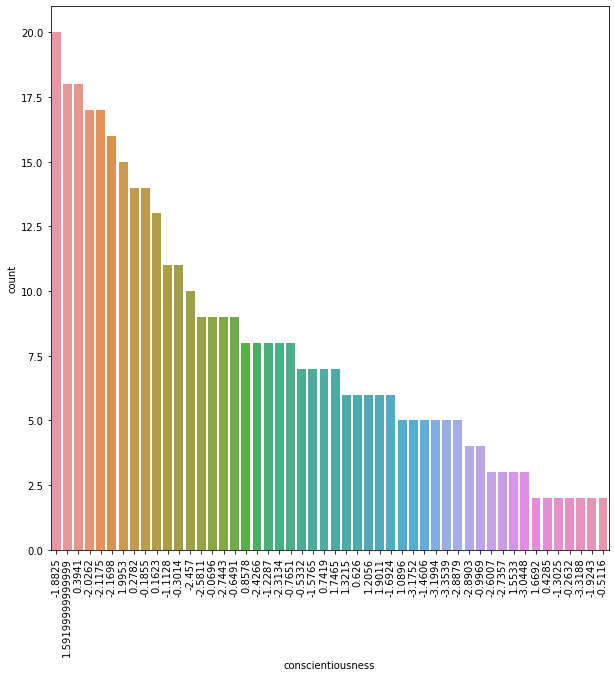

In [392]:
plt.figure(figsize=(10,10))
sns.countplot(x=data['conscientiousness'],order=data['conscientiousness'].value_counts().iloc[50:100].index)
plt.xticks(rotation=90)
plt.show()

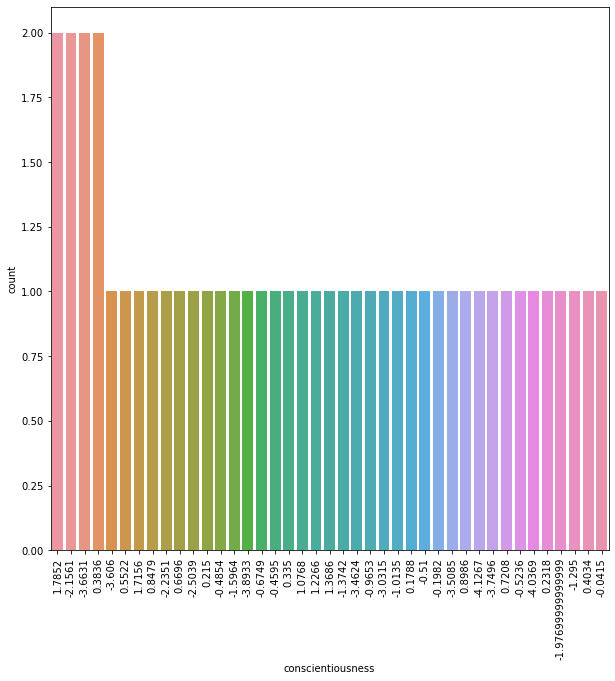

In [393]:
plt.figure(figsize=(10,10))
sns.countplot(x=data['conscientiousness'],order=data['conscientiousness'].value_counts().iloc[100:].index)
plt.xticks(rotation=90)
plt.show()

In [394]:
data['conscientiousness'].max()

1.9953

In [395]:
(data['conscientiousness']==1.9953).value_counts()

False    3983
True       15
Name: conscientiousness, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='conscientiousness'>

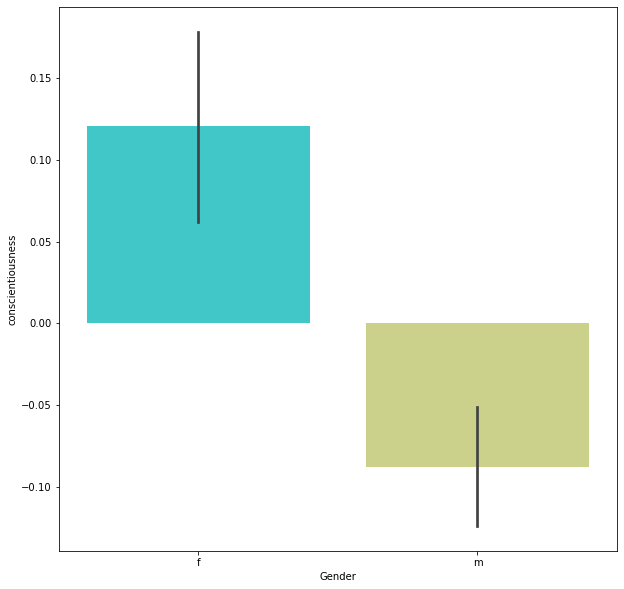

In [396]:
plt.figure(figsize=(10,10))
sns.barplot(x=data['Gender'],y=data['conscientiousness'],palette='rainbow')

# Conclusion after analysing conscientiousness

1. Mean and median marks are 0.037831 and  0.
2. Maximum marks i.e. 1.9553 is scored by 15 students.
3. Maximum students scored -1.8825.
4. Females scored better marks than male.

#  Analysing agreeableness

In [397]:
data['agreeableness'].describe()

count    3998.000000
mean        0.146496
std         0.941782
min        -5.781600
25%        -0.287100
50%         0.212400
75%         0.812800
max         1.904800
Name: agreeableness, dtype: float64

In [398]:
data['agreeableness'].unique().shape

(149,)

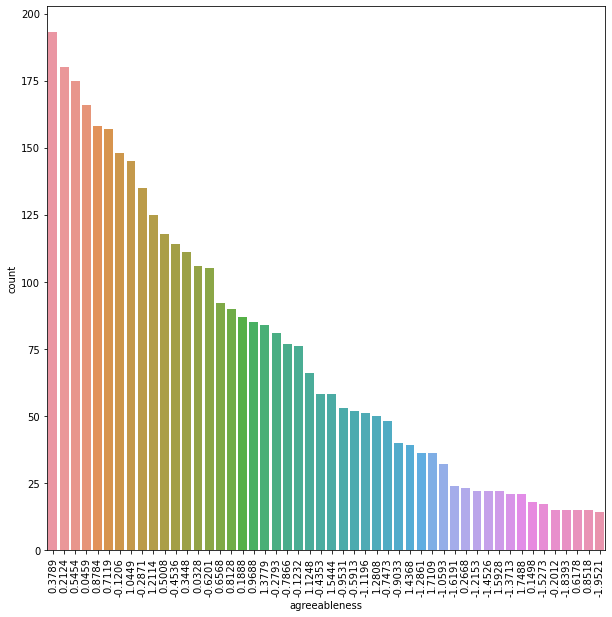

In [400]:
plt.figure(figsize=(10,10))
sns.countplot(x=data['agreeableness'],order=data['agreeableness'].value_counts().iloc[:50].index)
plt.xticks(rotation=90)
plt.show()

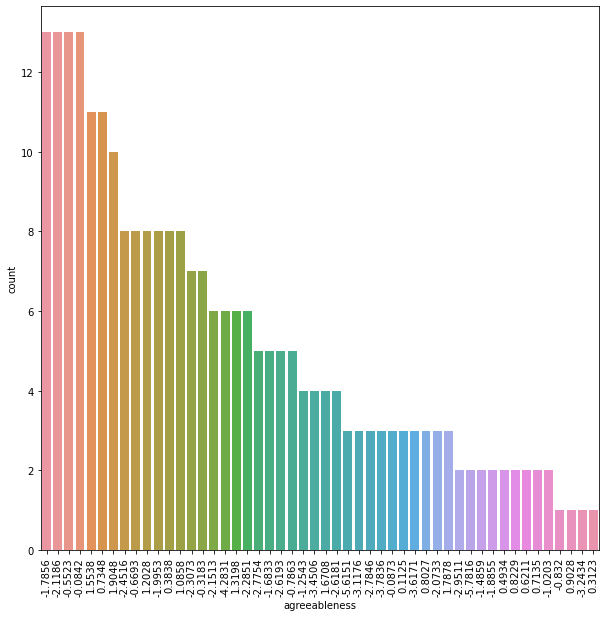

In [401]:
plt.figure(figsize=(10,10))
sns.countplot(x=data['agreeableness'],order=data['agreeableness'].value_counts().iloc[50:100].index)
plt.xticks(rotation=90)
plt.show()

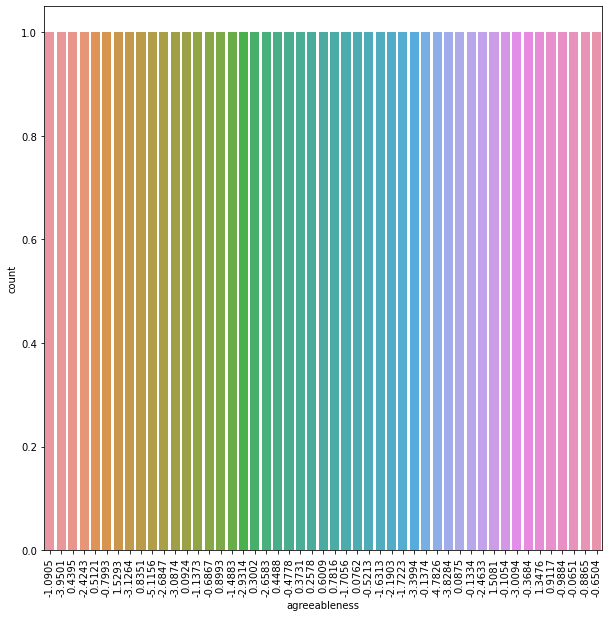

In [399]:
plt.figure(figsize=(10,10))
sns.countplot(x=data['agreeableness'],order=data['agreeableness'].value_counts().iloc[100:].index)
plt.xticks(rotation=90)
plt.show()

In [402]:
data['agreeableness'].max()

1.9048

In [403]:
(data['agreeableness']==1.9048).value_counts()

False    3988
True       10
Name: agreeableness, dtype: int64

<AxesSubplot:ylabel='agreeableness'>

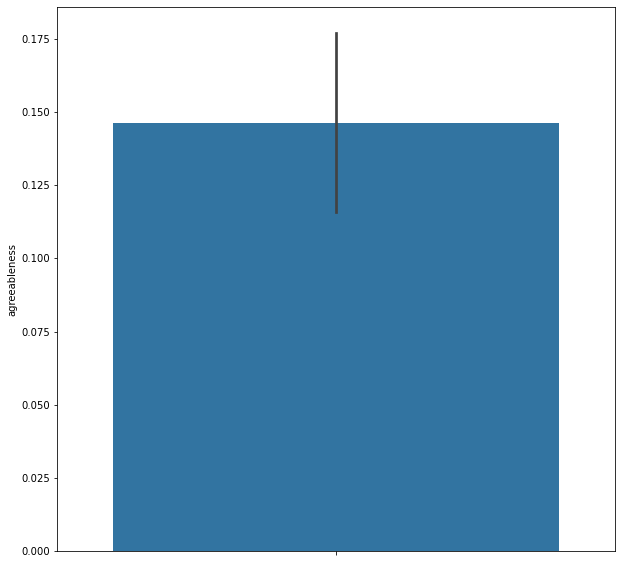

In [405]:
plt.figure(figsize=(10,10))
sns.barplot(y=data['agreeableness'])

<AxesSubplot:xlabel='Gender', ylabel='agreeableness'>

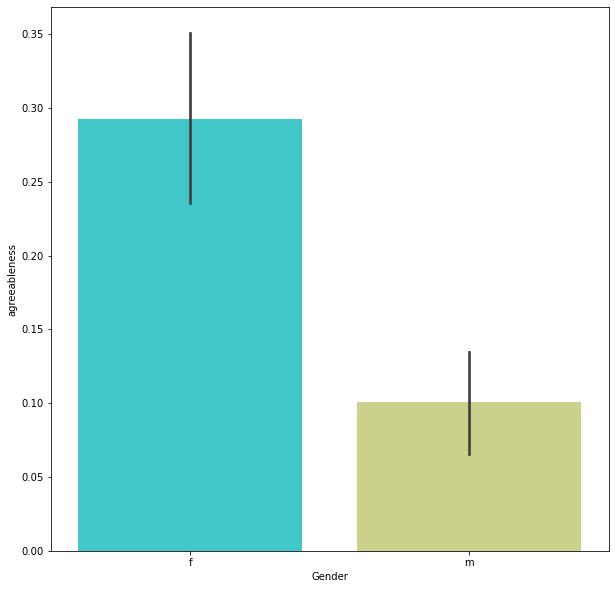

In [406]:
plt.figure(figsize=(10,10))
sns.barplot(x=data['Gender'],y=data['agreeableness'],palette='rainbow')

**Femaled scored far better than males in agreeableness**

# Conclusion after analysing agreeableness

1. Mean and median scores are 0.146496 and 0.212400.
2. Maximum students scored 0.3789.
3. Maximum marks i.e. 1.9048 is scored by 10 students.
4. Femaled scored far better than males in agreeableness

# Analysing extraversion 

In [407]:
data['extraversion'].describe()

count    3998.000000
mean        0.002763
std         0.951471
min        -4.600900
25%        -0.604800
50%         0.091400
75%         0.672000
max         2.535400
Name: extraversion, dtype: float64

In [408]:
data['extraversion'].unique().shape

(154,)

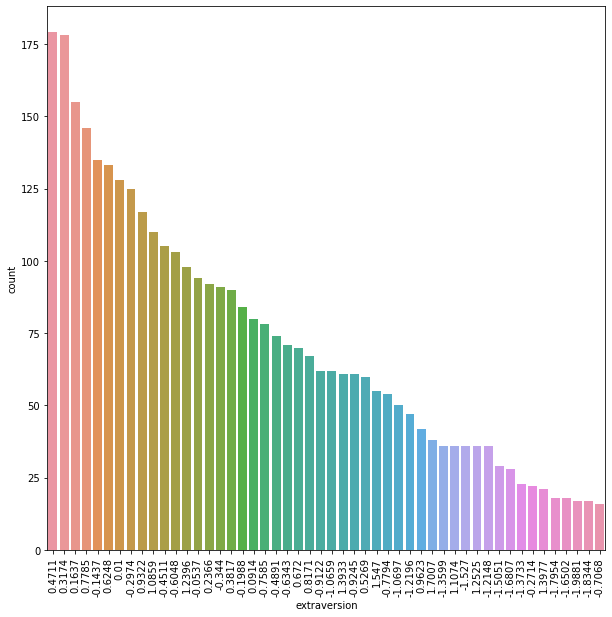

In [409]:
plt.figure(figsize=(10,10))
sns.countplot(x=data['extraversion'],order=data['extraversion'].value_counts().iloc[:50].index)
plt.xticks(rotation=90)
plt.show()

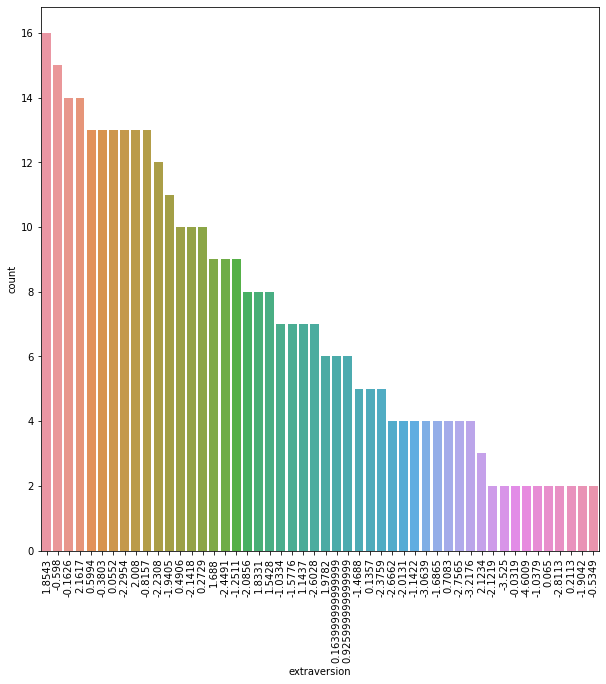

In [410]:
plt.figure(figsize=(10,10))
sns.countplot(x=data['extraversion'],order=data['extraversion'].value_counts().iloc[50:100].index)
plt.xticks(rotation=90)
plt.show()

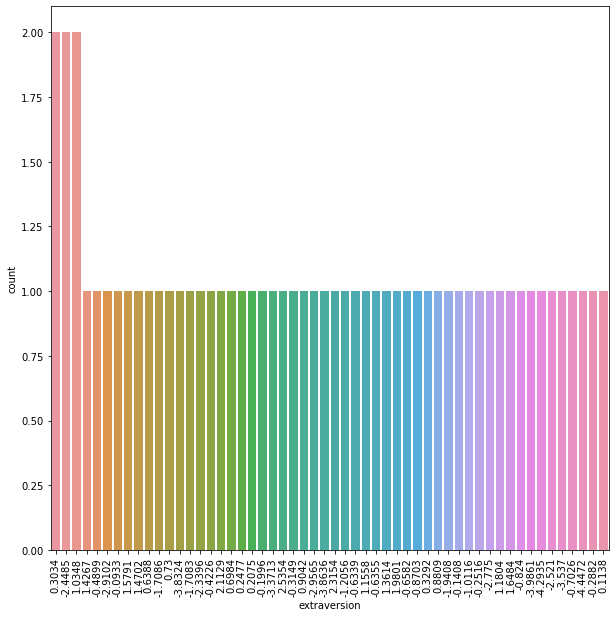

In [411]:
plt.figure(figsize=(10,10))
sns.countplot(x=data['extraversion'],order=data['extraversion'].value_counts().iloc[100:].index)
plt.xticks(rotation=90)
plt.show()

In [412]:
data['extraversion'].max()

2.5354

In [413]:
(data['extraversion']==2.5354).value_counts()

False    3997
True        1
Name: extraversion, dtype: int64

<AxesSubplot:ylabel='extraversion'>

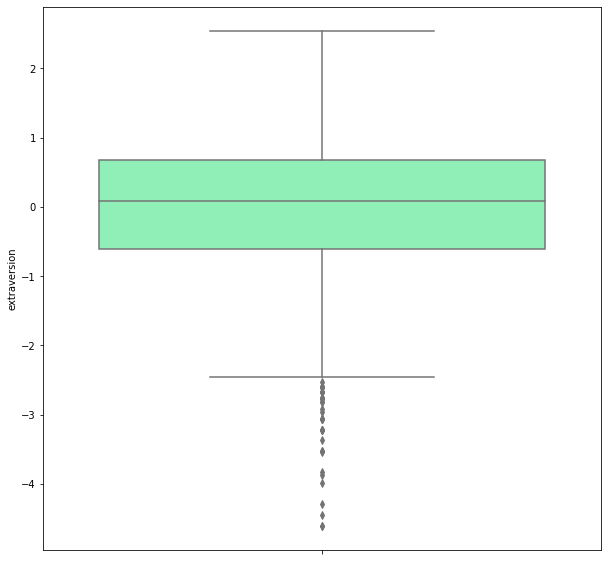

In [416]:
plt.figure(figsize=(10,10))
sns.boxplot(y=data['extraversion'],palette='rainbow')

<AxesSubplot:xlabel='Gender', ylabel='extraversion'>

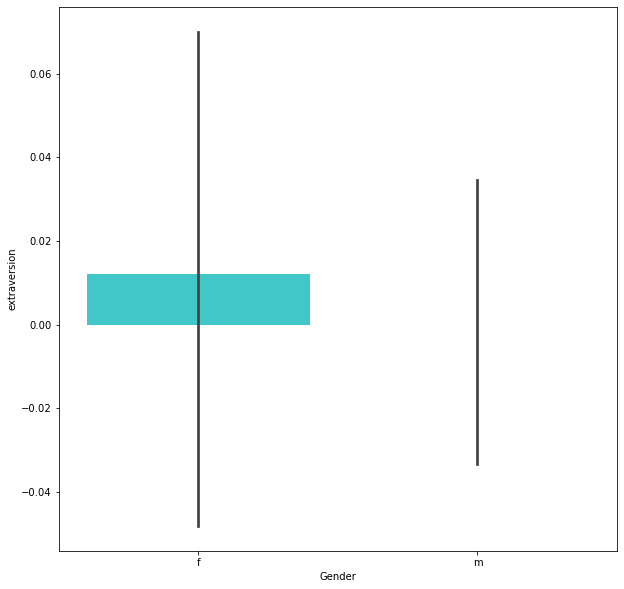

In [414]:
plt.figure(figsize=(10,10))
sns.barplot(x=data['Gender'],y=data['extraversion'],palette='rainbow')

# Conclusion after analysing extraversion 

1. Mean and median scores are 0.002763 and 0.091400
2. Maximum students scored 0.4711.
3. Maximum marks i.e. 2.5354 is scored by one student
4. Marks below -2.5 are outlires.

# Analysing nueroticism 

In [417]:
data['nueroticism'].describe()

count    3998.000000
mean       -0.169033
std         1.007580
min        -2.643000
25%        -0.868200
50%        -0.234400
75%         0.526200
max         3.352500
Name: nueroticism, dtype: float64

In [418]:
data['nueroticism'].unique().shape

(217,)

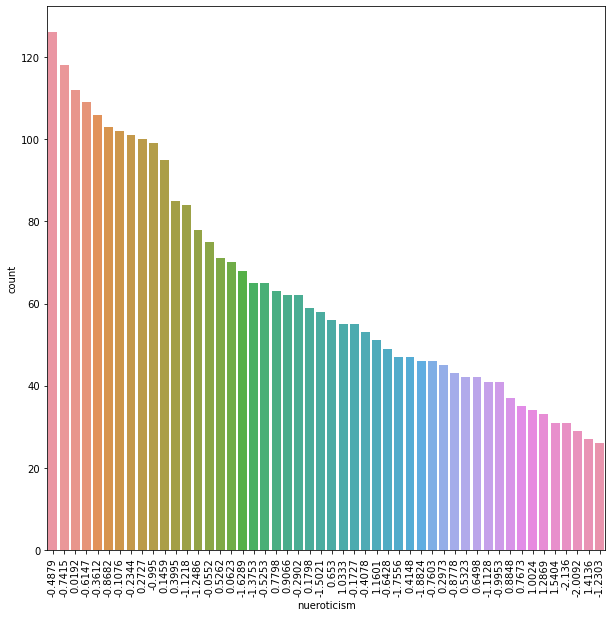

In [419]:
plt.figure(figsize=(10,10))
sns.countplot(x=data['nueroticism'],order=data['nueroticism'].value_counts().iloc[:50].index)
plt.xticks(rotation=90)
plt.show()

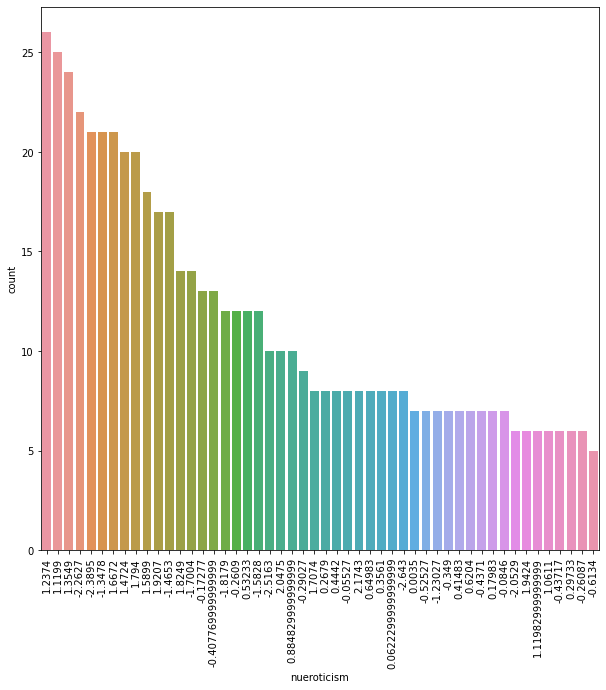

In [420]:
plt.figure(figsize=(10,10))
sns.countplot(x=data['nueroticism'],order=data['nueroticism'].value_counts().iloc[50:100].index)
plt.xticks(rotation=90)
plt.show()

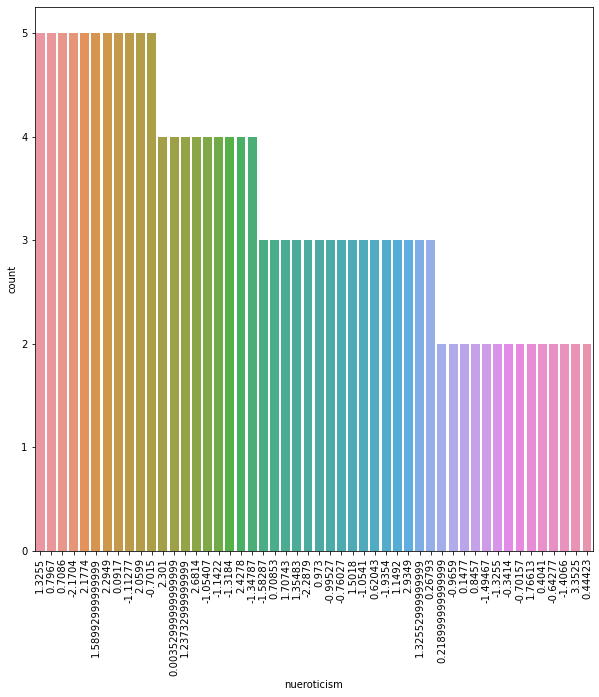

In [421]:
plt.figure(figsize=(10,10))
sns.countplot(x=data['nueroticism'],order=data['nueroticism'].value_counts().iloc[100:150].index)
plt.xticks(rotation=90)
plt.show()

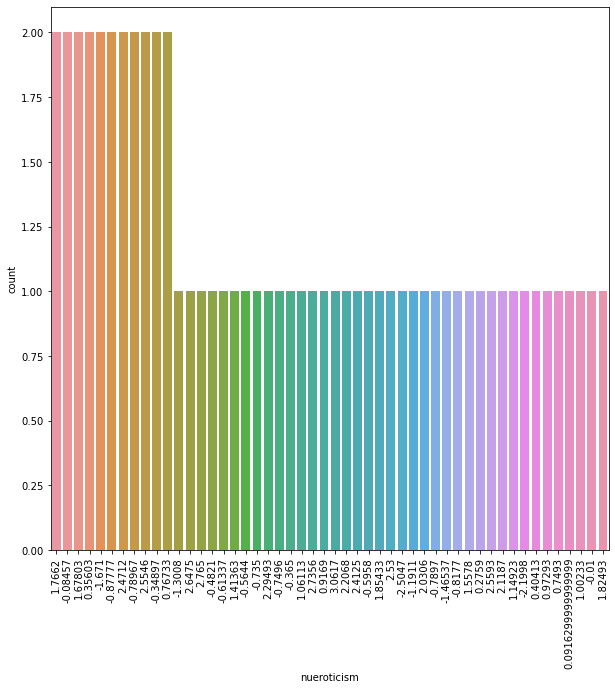

In [422]:
plt.figure(figsize=(10,10))
sns.countplot(x=data['nueroticism'],order=data['nueroticism'].value_counts().iloc[150:200].index)
plt.xticks(rotation=90)
plt.show()

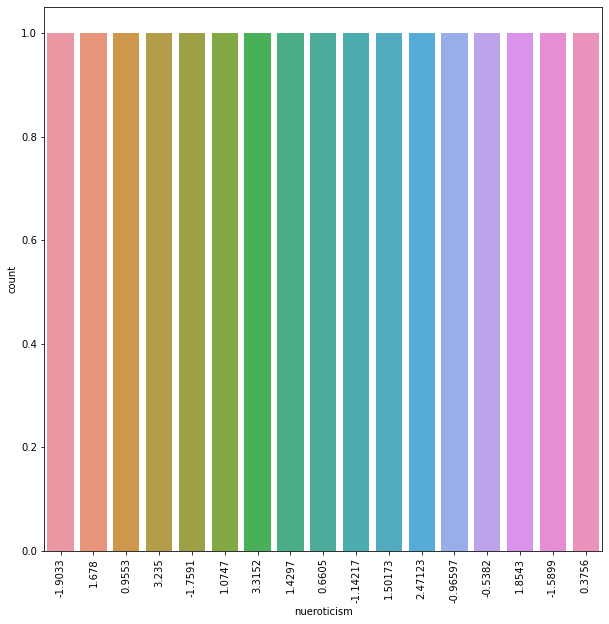

In [423]:
plt.figure(figsize=(10,10))
sns.countplot(x=data['nueroticism'],order=data['nueroticism'].value_counts().iloc[200:].index)
plt.xticks(rotation=90)
plt.show()

In [424]:
data['nueroticism'].max()

3.3525

In [425]:
(data['nueroticism']==3.3525).value_counts()

False    3996
True        2
Name: nueroticism, dtype: int64

<AxesSubplot:ylabel='nueroticism'>

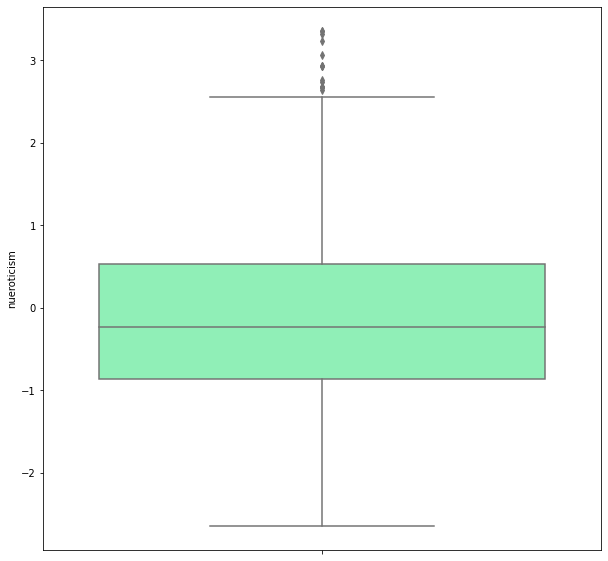

In [429]:
plt.figure(figsize=(10,10))
sns.boxplot(y=data['nueroticism'],palette='rainbow')

<AxesSubplot:xlabel='Gender', ylabel='nueroticism'>

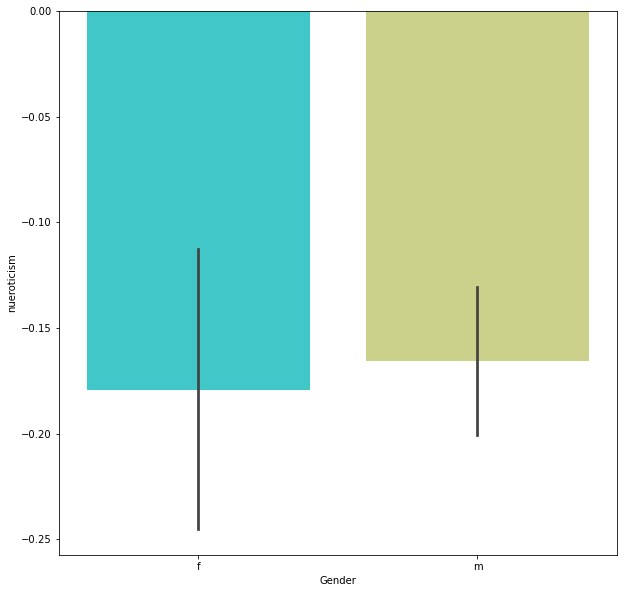

In [426]:
plt.figure(figsize=(10,10))
sns.barplot(x=data['Gender'],y=data['nueroticism'],palette='rainbow')

# Conclusion after analysing nueroticism 

1. Mean and median values are -0.169033 and -0.234400.
2. Maximun students scored -0.4879.
3. Maximum marks i.e. 3.3525 is scored by 2 students.
4. Values above 2.5 are outliers.

# Analysing openess_to_experience 

In [430]:
data['openess_to_experience'].describe()

count    3998.000000
mean       -0.138110
std         1.008075
min        -7.375700
25%        -0.669200
50%        -0.094300
75%         0.502400
max         1.822400
Name: openess_to_experience, dtype: float64

In [431]:
data['openess_to_experience'].unique().shape

(142,)

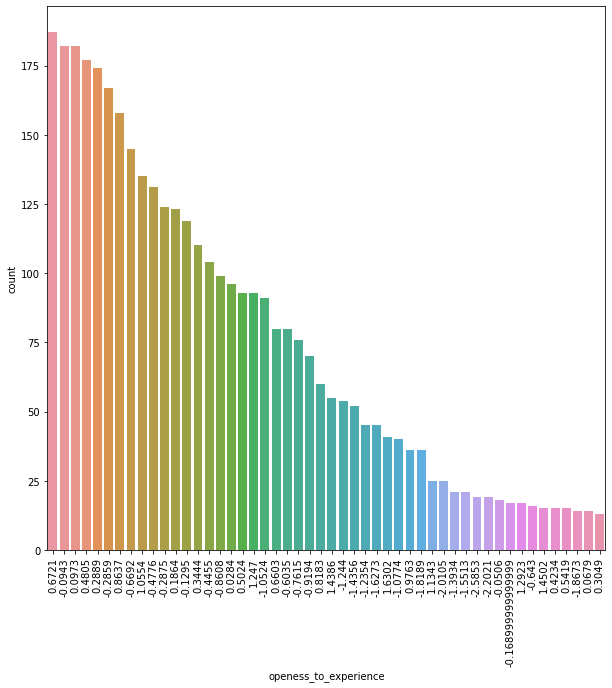

In [432]:
plt.figure(figsize=(10,10))
sns.countplot(x=data['openess_to_experience'],order=data['openess_to_experience'].value_counts().iloc[:50].index)
plt.xticks(rotation=90)
plt.show()

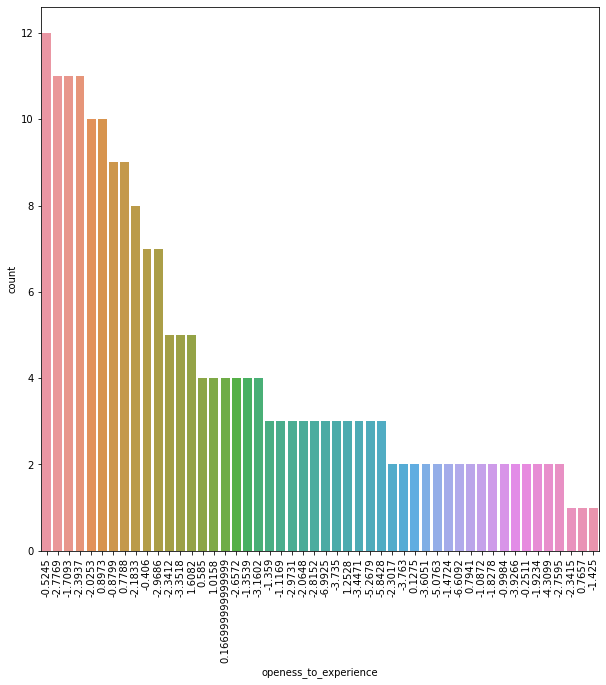

In [433]:
plt.figure(figsize=(10,10))
sns.countplot(x=data['openess_to_experience'],order=data['openess_to_experience'].value_counts().iloc[50:100].index)
plt.xticks(rotation=90)
plt.show()

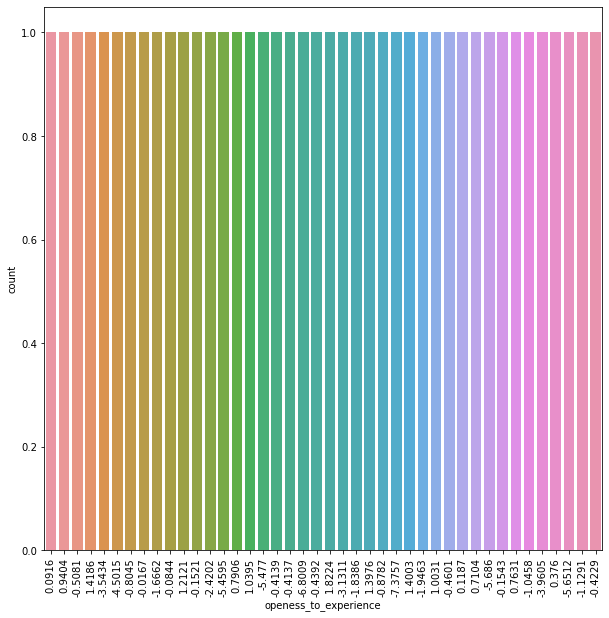

In [434]:
plt.figure(figsize=(10,10))
sns.countplot(x=data['openess_to_experience'],order=data['openess_to_experience'].value_counts().iloc[100:].index)
plt.xticks(rotation=90)
plt.show()

In [435]:
data['openess_to_experience'].max()

1.8224

In [436]:
(data['openess_to_experience']==1.8224).value_counts()

False    3997
True        1
Name: openess_to_experience, dtype: int64

In [437]:
(data['openess_to_experience']==-7.375700).value_counts()

False    3997
True        1
Name: openess_to_experience, dtype: int64

<AxesSubplot:ylabel='openess_to_experience'>

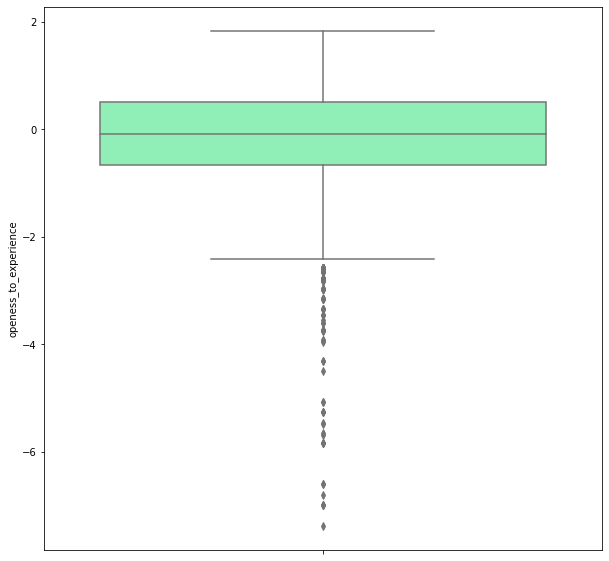

In [439]:
plt.figure(figsize=(10,10))
sns.boxplot(y=data['openess_to_experience'],palette='rainbow')

**Values below 2.5 are all outliers.**

<AxesSubplot:xlabel='Gender', ylabel='openess_to_experience'>

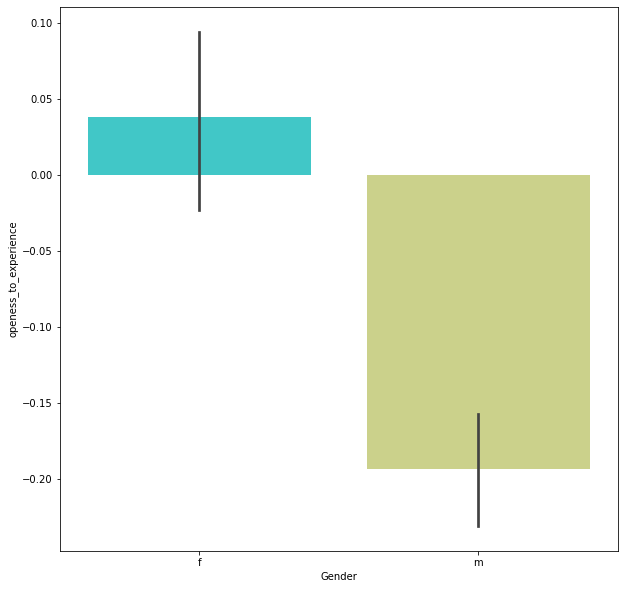

In [438]:
plt.figure(figsize=(10,10))
sns.barplot(x=data['Gender'],y=data['openess_to_experience'],palette='rainbow')

# Conclusion after analysing openess_to_experience 

1. Mean and median scores are -0.138110 and 0.094300.
2. Maximum number of student scored 0.6721.
3. Maximum marks i.e. 18224 is scored by 2 students.
4. Minimum marks i.e. -7.375700 is scored by 1 student.
5. Female scored bettern marks than male in openess_to_experience.
6. Values below 2.5 are all outliers.

**Research Questions**
-	Times of India article dated Jan 18, 2019 states that “After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.” Test this claim with the data given to you.
-	Is there a relationship between gender and specialisation? (i.e. Does the preference of Specialisation depend on the Gender?)


Step-1:\
Alternate Hypothesis (Bold Claim):
$$H_{1}: \mu< 2.75$$
Null Hypothesis (Status Quo):
$$H_{0}: \mu \geq 2.75$$

Step-2:
* Collect a sample size 
* Compute the sample mean

Step-3: Compute Test statistics
$$z=\frac{\overline{x}-\mu}{\sigma/\sqrt{n}}$$

Step-4: Decide $\alpha$ or significance level= $0.95$

Step-5.1:Two tailed t-statistics
$$reject \ H_{0} \ if \\ |z|>z_{\frac{\alpha}{2}}$$

Step-5.2: Compute p-value

In [454]:
# Given mean

mean=(2.5+3)/2
print(mean)

2.75


In [464]:
(data['Specialization']=='computer science & engineering').count()

3998

# Performing Chi square Test between gender and Specialisation


Alternate Hypothesis (Bold Claim):
$$H_{1}: They \ are\ dependent$$
Null Hypothesis (Status Quo):
$$H_{0}: They\ are \ independent$$

In [444]:
pd.crosstab(data['Specialization'],data['Gender'],margins=True)

Gender                                         f     m   All
Specialization                                              
aeronautical engineering                       1     2     3
applied electronics and instrumentation        2     7     9
automobile/automotive engineering              0     5     5
biomedical engineering                         2     0     2
biotechnology                                  9     6    15
ceramic engineering                            0     1     1
chemical engineering                           1     8     9
civil engineering                              6    23    29
computer and communication engineering         0     1     1
computer application                          59   185   244
computer engineering                         175   425   600
computer networking                            0     1     1
computer science                               1     1     2
computer science & engineering               183   561   744
computer science and technology                2     4     6
control and instrumentation engineering        0     1     1
electrical and power engineering               0     2     2
electrical engineering                        17    65    82
electronics                                    0     1     1
electronics & instrumentation eng             10    22    32
electronics & telecommunications              28    93   121
electronics and communication engineering    212   668   880
electronics and computer engineering           0     3     3
electronics and electrical engineering        34   162   196
electronics and instrumentation engineering    5    22    27
electronics engineering                        3    16    19
embedded systems technology                    0     1     1
industrial & management engineering            0     1     1
industrial & production engineering            2     8    10
industrial engineering                         1     1     2
information & communication technology         2     0     2
information science                            0     1     1
information science engineering                8    19    27
information technology                       173   487   660
instrumentation and control engineering        9    11    20
instrumentation engineering                    0     4     4
internal combustion engine                     0     1     1
mechanical & production engineering            0     1     1
mechanical and automation                      0     5     5
mechanical engineering                        10   191   201
mechatronics                                   1     3     4
metallurgical engineering                      0     2     2
other                                          0    13    13
polymer technology                             0     1     1
power systems and automation                   0     1     1
telecommunication engineering                  1     5     6
All                                          957  3041  3998

In [445]:
observed=pd.crosstab(data['Specialization'],data['Gender'])
observed

Gender                                         f    m
Specialization                                       
aeronautical engineering                       1    2
applied electronics and instrumentation        2    7
automobile/automotive engineering              0    5
biomedical engineering                         2    0
biotechnology                                  9    6
ceramic engineering                            0    1
chemical engineering                           1    8
civil engineering                              6   23
computer and communication engineering         0    1
computer application                          59  185
computer engineering                         175  425
computer networking                            0    1
computer science                               1    1
computer science & engineering               183  561
computer science and technology                2    4
control and instrumentation engineering        0    1
electrical and power engineering               0    2
electrical engineering                        17   65
electronics                                    0    1
electronics & instrumentation eng             10   22
electronics & telecommunications              28   93
electronics and communication engineering    212  668
electronics and computer engineering           0    3
electronics and electrical engineering        34  162
electronics and instrumentation engineering    5   22
electronics engineering                        3   16
embedded systems technology                    0    1
industrial & management engineering            0    1
industrial & production engineering            2    8
industrial engineering                         1    1
information & communication technology         2    0
information science                            0    1
information science engineering                8   19
information technology                       173  487
instrumentation and control engineering        9   11
instrumentation engineering                    0    4
internal combustion engine                     0    1
mechanical & production engineering            0    1
mechanical and automation                      0    5
mechanical engineering                        10  191
mechatronics                                   1    3
metallurgical engineering                      0    2
other                                          0   13
polymer technology                             0    1
power systems and automation                   0    1
telecommunication engineering                  1    5

In [447]:
# chi2_contigency returns chi2 test statistic, p-value, degree of freedoms, expected frequencies

from scipy.stats import chi2
from scipy.stats import chi2_contingency
chi2_contingency(observed)

(104.46891913608454,
 1.2453868176977011e-06,
 45,
 array([[7.18109055e-01, 2.28189095e+00],
        [2.15432716e+00, 6.84567284e+00],
        [1.19684842e+00, 3.80315158e+00],
        [4.78739370e-01, 1.52126063e+00],
        [3.59054527e+00, 1.14094547e+01],
        [2.39369685e-01, 7.60630315e-01],
        [2.15432716e+00, 6.84567284e+00],
        [6.94172086e+00, 2.20582791e+01],
        [2.39369685e-01, 7.60630315e-01],
        [5.84062031e+01, 1.85593797e+02],
        [1.43621811e+02, 4.56378189e+02],
        [2.39369685e-01, 7.60630315e-01],
        [4.78739370e-01, 1.52126063e+00],
        [1.78091046e+02, 5.65908954e+02],
        [1.43621811e+00, 4.56378189e+00],
        [2.39369685e-01, 7.60630315e-01],
        [4.78739370e-01, 1.52126063e+00],
        [1.96283142e+01, 6.23716858e+01],
        [2.39369685e-01, 7.60630315e-01],
        [7.65982991e+00, 2.43401701e+01],
        [2.89637319e+01, 9.20362681e+01],
        [2.10645323e+02, 6.69354677e+02],
        [7.18109055e-01, 

In [448]:
chi2_test_stat = chi2_contingency(observed)[0]
pval = chi2_contingency(observed)[1]
df = chi2_contingency(observed)[2]

In [449]:
confidence_level = 0.90

alpha = 1 - confidence_level

chi2_critical = chi2.ppf(1 - alpha, df)

chi2_critical

57.50530474499599

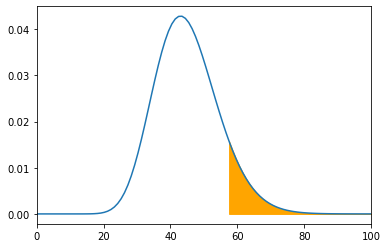

In [450]:
# Ploting the chi2 distribution to visualise

# Defining the x minimum and x maximum
x_min = 0
x_max = 100

# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = chi2.pdf(x, df)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Setting Chi2 Critical value 
chi2_critical_right = chi2_critical

# Shading the right rejection region
x1 = np.linspace(chi2_critical_right, x_max, 100)
y1 = chi2.pdf(x1, df)
plt.fill_between(x1, y1, color='orange')

In [451]:
if(chi2_test_stat > chi2_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")

Reject Null Hypothesis


In [452]:
if(pval < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")

Reject Null Hypothesis
